In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pylab import mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
mpl.rcParams['axes.unicode_minus'] = False 

## 问题一

### 1  删除重复发票

In [3]:
data_buy = pd.read_excel("附件1：123家有信贷记录企业的相关数据.xlsx", sheet_name = "进项发票信息")
data_sell = pd.read_excel("附件1：123家有信贷记录企业的相关数据.xlsx", sheet_name = "销项发票信息")

In [4]:
# 进项发票信息
data_buy

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票
...,...,...,...,...,...,...,...,...
210942,E122,54706234,2019-04-17,A08967,223.30,6.70,230.00,有效发票
210943,E122,55721344,2020-01-10,A09184,264.15,15.85,280.00,有效发票
210944,E123,38493295,2017-12-15,A03624,264.15,15.85,280.00,有效发票
210945,E123,95472001,2018-12-29,A03626,264.15,15.85,280.00,有效发票


In [5]:
data_buy.dropna()

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票
...,...,...,...,...,...,...,...,...
210942,E122,54706234,2019-04-17,A08967,223.30,6.70,230.00,有效发票
210943,E122,55721344,2020-01-10,A09184,264.15,15.85,280.00,有效发票
210944,E123,38493295,2017-12-15,A03624,264.15,15.85,280.00,有效发票
210945,E123,95472001,2018-12-29,A03626,264.15,15.85,280.00,有效发票


In [6]:
data_sell

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
...,...,...,...,...,...,...,...,...
162479,E123,8887701,2019-12-17,B10944,4827.67,144.83,4972.5,有效发票
162480,E123,8887702,2019-12-17,B10944,7412.62,222.38,7635.0,有效发票
162481,E123,34173085,2019-12-17,B13093,1917.47,57.53,1975.0,有效发票
162482,E123,8887703,2019-12-25,B13093,7252.42,217.58,7470.0,有效发票


In [7]:
data_sell.dropna()

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
...,...,...,...,...,...,...,...,...
162479,E123,8887701,2019-12-17,B10944,4827.67,144.83,4972.5,有效发票
162480,E123,8887702,2019-12-17,B10944,7412.62,222.38,7635.0,有效发票
162481,E123,34173085,2019-12-17,B13093,1917.47,57.53,1975.0,有效发票
162482,E123,8887703,2019-12-25,B13093,7252.42,217.58,7470.0,有效发票


In [8]:
# 相同发票号码计数
count_same = data_buy.value_counts('发票号码').reset_index()
count_same.columns = ['发票号码', 'count']
count_same

,发票号码,count
0,7945456,3
1,2906004,3
2,7713369,3
3,7713368,3
4,7713367,3
...,...,...
209670,33217315,1
209671,33217129,1
209672,33217124,1
209673,33216640,1


In [9]:
# 数据合并
data_buy_merge = pd.merge(data_buy, count_same, on = '发票号码')
data_buy_merge

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态,count
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票,1
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票,1
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票,1
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票,1
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票,1
...,...,...,...,...,...,...,...,...,...
210942,E122,54706234,2019-04-17,A08967,223.30,6.70,230.00,有效发票,1
210943,E122,55721344,2020-01-10,A09184,264.15,15.85,280.00,有效发票,1
210944,E123,38493295,2017-12-15,A03624,264.15,15.85,280.00,有效发票,1
210945,E123,95472001,2018-12-29,A03626,264.15,15.85,280.00,有效发票,1


In [10]:
# 删除重复发票号码
data_buy_merge_drop = data_buy_merge[data_buy_merge['count']==1].reset_index()
data_buy_merge_drop

,index,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态,count
0,0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票,1
1,1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票,1
2,2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票,1
3,3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票,1
4,4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票,1
...,...,...,...,...,...,...,...,...,...,...
208409,210942,E122,54706234,2019-04-17,A08967,223.30,6.70,230.00,有效发票,1
208410,210943,E122,55721344,2020-01-10,A09184,264.15,15.85,280.00,有效发票,1
208411,210944,E123,38493295,2017-12-15,A03624,264.15,15.85,280.00,有效发票,1
208412,210945,E123,95472001,2018-12-29,A03626,264.15,15.85,280.00,有效发票,1


In [46]:
208414/210947

0.9879922444974331

In [11]:
# 删去重复发票销项信息
count1_same = data_sell.value_counts('发票号码').reset_index()
count1_same.columns = ['发票号码', 'count']
count1_same

data_sell_merge = pd.merge(data_sell, count1_same, on = '发票号码')
data_sell_merge

data_sell_merge_drop = data_sell_merge[data_sell_merge['count']==1].reset_index()
data_sell_merge_drop

,index,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,count
0,0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票,1
1,1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,1
2,2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,1
3,3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,1
4,4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,1
...,...,...,...,...,...,...,...,...,...,...
152690,162479,E123,8887701,2019-12-17,B10944,4827.67,144.83,4972.5,有效发票,1
152691,162480,E123,8887702,2019-12-17,B10944,7412.62,222.38,7635.0,有效发票,1
152692,162481,E123,34173085,2019-12-17,B13093,1917.47,57.53,1975.0,有效发票,1
152693,162482,E123,8887703,2019-12-25,B13093,7252.42,217.58,7470.0,有效发票,1


In [53]:
152695/162484 

0.9397540680928583

### 2 删除异常值

In [12]:
# 提取有效/正值发票数据再作异常值检验——进项
data_buy_merge_drop1 = data_buy_merge_drop[(data_buy_merge_drop['发票状态'] =='有效发票')& (data_buy_merge_drop['价税合计'] >= 0)]
data_buy_merge_drop1
mean1 = data_buy_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data_buy_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data_buy_merge_drop_outlier = data_buy_merge_drop1[(data_buy_merge_drop1['价税合计']<=topnum2) & (data_buy_merge_drop1['价税合计']>=bottomnum2)].drop(columns = 'index')
data_buy_merge_drop_outlier

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态,count
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票,1
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票,1
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票,1
5,E1,40826107,2017-08-08,A05991,170.94,29.06,200.00,有效发票,1
7,E1,4420532,2017-08-09,A03142,4716.98,283.02,5000.00,有效发票,1
...,...,...,...,...,...,...,...,...,...
208409,E122,54706234,2019-04-17,A08967,223.30,6.70,230.00,有效发票,1
208410,E122,55721344,2020-01-10,A09184,264.15,15.85,280.00,有效发票,1
208411,E123,38493295,2017-12-15,A03624,264.15,15.85,280.00,有效发票,1
208412,E123,95472001,2018-12-29,A03626,264.15,15.85,280.00,有效发票,1


In [13]:
# 提取有效/正值发票数据再作异常值检验——销项
data_sell_merge_drop1 = data_sell_merge_drop[(data_sell_merge_drop['发票状态'] =='有效发票')& (data_sell_merge_drop['价税合计'] >= 0)]
data_sell_merge_drop1
mean1 = data_sell_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data_sell_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data_sell_merge_drop_outlier = data_sell_merge_drop1[(data_sell_merge_drop1['价税合计']<=topnum2) & (data_sell_merge_drop1['价税合计']>=bottomnum2)].drop(columns = 'index')

data_sell_merge_drop_outlier

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,count
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票,1
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,1
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,1
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,1
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,1
...,...,...,...,...,...,...,...,...,...
152690,E123,8887701,2019-12-17,B10944,4827.67,144.83,4972.5,有效发票,1
152691,E123,8887702,2019-12-17,B10944,7412.62,222.38,7635.0,有效发票,1
152692,E123,34173085,2019-12-17,B13093,1917.47,57.53,1975.0,有效发票,1
152693,E123,8887703,2019-12-25,B13093,7252.42,217.58,7470.0,有效发票,1


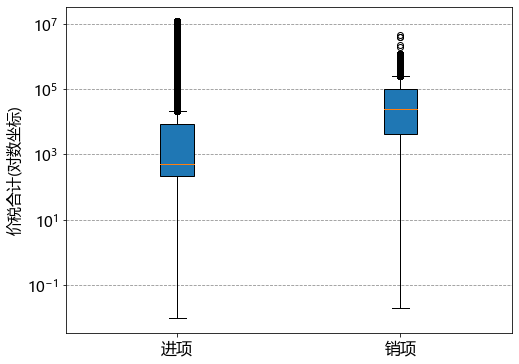

In [16]:
# import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(8, 6)) #得到画板、轴
all_data = [data_buy_merge_drop1['价税合计'], data_sell_merge_drop1['价税合计']]
ax.boxplot(all_data,patch_artist=True, labels = ['进项', '销项']) #描点上色

plt.yscale('log')
plt.xticks(size = 16)
plt.yticks(size = 15)
ax.set_ylabel('价税合计(对数坐标)', fontsize = 15)

ax.grid(axis = 'y',linestyle = '--', color =  '#909090')

#plt.savefig(r"D:\c_\大三下\建模——水\bighmk\boxplot.jpg")
plt.show() #展示


# data_sell_merge_drop1
# data_buy_merge_drop1


### 3 逻辑斯蒂回归

### 3.1 指标构建

In [17]:
# 所需指标构建
## 购入情况
data_buy_merge_drop_outlier #删掉无效发票、负数发票、异常值后数据
data_buy_merge_drop_rest = data_buy_merge_drop[(data_buy_merge_drop['发票状态'] == '作废发票') | (data_buy_merge_drop['价税合计'] <0)].drop(columns = 'index') #作废发票+负数发票数据
data_buy_new = pd.concat([data_buy_merge_drop_outlier, data_buy_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data_buy_new

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态,count
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票,1
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票,1
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票,1
5,E1,40826107,2017-08-08,A05991,170.94,29.06,200.00,有效发票,1
7,E1,4420532,2017-08-09,A03142,4716.98,283.02,5000.00,有效发票,1
...,...,...,...,...,...,...,...,...,...
208173,E119,51946044,2019-07-23,A12815,-34.51,-4.49,-39.00,有效发票,1
208277,E120,22613364,2018-05-02,A09140,10141.51,608.49,10750.00,作废发票,1
208360,E121,5316479,2019-05-24,A07145,-2264.15,-135.85,-2400.00,有效发票,1
208389,E122,13158121,2018-04-11,A03889,907.55,54.45,962.00,作废发票,1


In [18]:
## 销售情况
data_sell_merge_drop_outlier #删掉无效发票、负数发票、异常值后数据
data_sell_merge_drop_rest = data_sell_merge_drop[(data_sell_merge_drop['发票状态'] == '作废发票') | (data_sell_merge_drop['价税合计'] <0)].drop(columns = 'index') #作废发票+负数发票数据
data_sell_new = pd.concat([data_sell_merge_drop_outlier, data_sell_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data_sell_new

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,count
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票,1
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,1
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,1
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,1
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,1
...,...,...,...,...,...,...,...,...,...
152679,E123,3468707,2018-11-27,B00003,0.00,0.00,0.0,作废发票,1
152686,E123,8887697,2019-12-10,B10944,4827.67,144.83,4972.5,作废发票,1
152687,E123,8887698,2019-12-10,B10944,7412.62,222.38,7635.0,作废发票,1
152688,E123,8887699,2019-12-10,B10944,4827.67,144.83,4972.5,作废发票,1


In [19]:
a = list(data_sell_merge['企业代号'].unique())   # 列出该列的唯一值
len(a) 

123

### 3.2

In [20]:
### 进项发票作废率、进项交易满意率
company_buy_voidrate = data_buy_new.groupby('企业代号')
buy_voidrate = pd.DataFrame({'企业代号':[], '进项发票作废率':[], '进项交易满意率':[]})
for comp, lis in company_buy_voidrate:
    rate = sum(lis['发票状态'] =='作废发票')/lis.value_counts('企业代号').values
    rate1 = sum((lis['发票状态'] =='有效发票')& (lis['价税合计'] >=0))/sum(lis['发票状态'] =='有效发票')
#     print(lis)
#     print(rate.values)
    buy_voidrate = buy_voidrate.append(pd.DataFrame({'企业代号':comp,'进项发票作废率':rate, '进项交易满意率':rate1}, index = [0]))
buy_voidrate

,企业代号,进项发票作废率,进项交易满意率
0,E1,0.081485,0.967023
0,E10,0.057171,0.991113
0,E100,0.000000,1.000000
0,E101,0.000000,1.000000
0,E102,0.029070,0.989521
...,...,...,...
0,E95,0.000000,1.000000
0,E96,0.000000,1.000000
0,E97,0.000000,1.000000
0,E98,0.020000,0.979592


In [21]:
### 销项发票作废率、销项交易满意率
company_sell_voidrate = data_sell_new.groupby('企业代号')
sell_voidrate = pd.DataFrame({'企业代号':[], '销项发票作废率':[], '销项交易满意率':[]})
for comp, lis in company_sell_voidrate:
    rate = sum(lis['发票状态'] =='作废发票')/lis.value_counts('企业代号').values
    rate1 = sum((lis['发票状态'] =='有效发票')& (lis['价税合计'] >=0))/sum(lis['发票状态'] =='有效发票')
#     print(lis)
#     print(rate.values)
    sell_voidrate = sell_voidrate.append(pd.DataFrame({'企业代号':comp,'销项发票作废率':rate, '销项交易满意率':rate1}, index = [0]))
sell_voidrate

,企业代号,销项发票作废率,销项交易满意率
0,E1,0.079461,0.912139
0,E10,0.346667,0.979592
0,E100,0.010101,0.846939
0,E101,0.492063,1.000000
0,E102,0.146893,0.980132
...,...,...,...
0,E95,0.053669,1.000000
0,E96,0.100000,1.000000
0,E97,0.034091,0.984314
0,E98,0.130719,0.954887


### 3.3

In [22]:
###信誉状况
company_ = pd.read_excel("附件1：123家有信贷记录企业的相关数据.xlsx", sheet_name = "企业信息")
company_

,企业代号,企业名称,信誉评级,是否违约
0,E1,***电器销售有限公司,A,否
1,E2,***技术有限责任公司,A,否
2,E3,***电子(中国)有限公司***分公司,C,否
3,E4,***发展有限责任公司,C,否
4,E5,***供应链管理有限公司,B,否
...,...,...,...,...
118,E119,***药房,D,是
119,E120,***陈列广告有限公司,D,是
120,E121,***药业连锁有限公司***药店,D,是
121,E122,***商贸有限责任公司,D,是


### 3.4

In [24]:
### 净利润
buy_group = data_buy_merge_drop_outlier.groupby('企业代号', as_index = True).agg({'价税合计':['sum', 'median'], '企业代号':'count'})
buy_group = buy_group.reset_index()
buy_group.columns = ['企业代号', '进项价税合计','进项价税中位数', '进项交易数']
buy_group

sell_group = data_sell_merge_drop_outlier.groupby('企业代号', as_index = True).agg({'价税合计':['sum', 'median'], '企业代号':'count'})
sell_group = sell_group.reset_index()
sell_group.columns = ['企业代号', '销项价税合计','销项价税中位数', '销项交易数']
sell_group

buy_sell = pd.merge(sell_group, buy_group, on = '企业代号')
buy_sell['净利润'] = buy_sell['销项价税合计']-buy_sell['进项价税合计']
buy_sell['单笔净利润'] = buy_sell['销项价税合计']/buy_sell['销项交易数']-buy_sell['进项价税合计']/buy_sell['进项交易数'] 
buy_sell['资金周转率'] = buy_sell['销项价税合计']/buy_sell['进项价税合计']
buy_sell

,企业代号,销项价税合计,销项价税中位数,销项交易数,进项价税合计,进项价税中位数,进项交易数,净利润,单笔净利润,资金周转率
0,E1,2.160112e+08,86960.00,2367,3593298.49,390.000,2082,2.124179e+08,89533.613382,60.115028
1,E10,1.410278e+07,158792.19,96,4632471.73,375.000,3792,9.470309e+06,145682.325882,3.044332
2,E100,8.199213e+05,7180.03,83,23323.02,217.500,58,7.965983e+05,9476.448966,35.155023
3,E101,3.923780e+05,11074.00,32,12693.00,243.000,15,3.796850e+05,11415.612500,30.912944
4,E102,4.703337e+05,1107.25,148,2365688.99,920.000,661,-1.895355e+06,-401.024194,0.198815
...,...,...,...,...,...,...,...,...,...,...
117,E95,2.380080e+06,1200.00,864,1138.00,280.000,4,2.378942e+06,2470.222743,2091.459095
118,E96,1.481350e+06,93175.00,18,9043.96,325.000,10,1.472306e+06,81392.826222,163.794400
119,E97,1.012353e+06,2810.00,251,19880.00,3000.000,9,9.924729e+05,1824.389597,50.923184
120,E98,1.537773e+06,7000.00,127,111279.98,933.600,48,1.426493e+06,9790.114327,13.818953


### 3.5 汇总

In [25]:
### 数据汇总
temp1 = pd.merge(buy_voidrate, sell_voidrate, on = '企业代号')
temp2 = pd.merge(temp1, company_, on = '企业代号')
temp3 = pd.merge(temp2, buy_sell, on = '企业代号')
item = temp3.drop(columns = ['企业名称', '销项价税合计', '进项价税合计'])
item['交易总数'] = item['销项交易数']+item['进项交易数']
x_ = item.drop(columns = ['销项交易数', '进项交易数'])
x_

,企业代号,进项发票作废率,进项交易满意率,销项发票作废率,销项交易满意率,信誉评级,是否违约,销项价税中位数,进项价税中位数,净利润,单笔净利润,资金周转率,交易总数
0,E1,0.081485,0.967023,0.079461,0.912139,A,否,86960.00,390.000,2.124179e+08,89533.613382,60.115028,4449
1,E10,0.057171,0.991113,0.346667,0.979592,B,否,158792.19,375.000,9.470309e+06,145682.325882,3.044332,3888
2,E100,0.000000,1.000000,0.010101,0.846939,D,是,7180.03,217.500,7.965983e+05,9476.448966,35.155023,141
3,E101,0.000000,1.000000,0.492063,1.000000,D,是,11074.00,243.000,3.796850e+05,11415.612500,30.912944,47
4,E102,0.029070,0.989521,0.146893,0.980132,D,是,1107.25,920.000,-1.895355e+06,-401.024194,0.198815,809
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,E95,0.000000,1.000000,0.053669,1.000000,B,否,1200.00,280.000,2.378942e+06,2470.222743,2091.459095,868
118,E96,0.000000,1.000000,0.100000,1.000000,C,否,93175.00,325.000,1.472306e+06,81392.826222,163.794400,28
119,E97,0.000000,1.000000,0.034091,0.984314,B,否,2810.00,3000.000,9.924729e+05,1824.389597,50.923184,260
120,E98,0.020000,0.979592,0.130719,0.954887,B,否,7000.00,933.600,1.426493e+06,9790.114327,13.818953,175


In [26]:
def trans(x):
    if x=='A':
        return 4
    elif x=='B':
        return 3
    elif x=='C':
        return 2
    elif x=='D':
        return 1
    
def trans1(x):
    if x=='是':
        return 1
    elif x=='否':
        return 0

x_['评级'] = x_['信誉评级'].apply(trans)
x_['违约'] = x_['是否违约'].apply(trans1)
x_ = x_.drop(columns = ['信誉评级',  '是否违约'])
x_

,企业代号,进项发票作废率,进项交易满意率,销项发票作废率,销项交易满意率,销项价税中位数,进项价税中位数,净利润,单笔净利润,资金周转率,交易总数,评级,违约
0,E1,0.081485,0.967023,0.079461,0.912139,86960.00,390.000,2.124179e+08,89533.613382,60.115028,4449,4,0
1,E10,0.057171,0.991113,0.346667,0.979592,158792.19,375.000,9.470309e+06,145682.325882,3.044332,3888,3,0
2,E100,0.000000,1.000000,0.010101,0.846939,7180.03,217.500,7.965983e+05,9476.448966,35.155023,141,1,1
3,E101,0.000000,1.000000,0.492063,1.000000,11074.00,243.000,3.796850e+05,11415.612500,30.912944,47,1,1
4,E102,0.029070,0.989521,0.146893,0.980132,1107.25,920.000,-1.895355e+06,-401.024194,0.198815,809,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,E95,0.000000,1.000000,0.053669,1.000000,1200.00,280.000,2.378942e+06,2470.222743,2091.459095,868,3,0
118,E96,0.000000,1.000000,0.100000,1.000000,93175.00,325.000,1.472306e+06,81392.826222,163.794400,28,2,0
119,E97,0.000000,1.000000,0.034091,0.984314,2810.00,3000.000,9.924729e+05,1824.389597,50.923184,260,3,0
120,E98,0.020000,0.979592,0.130719,0.954887,7000.00,933.600,1.426493e+06,9790.114327,13.818953,175,3,0


### 3.6逻辑斯蒂回归

In [27]:
## 构建训练集
features = x_[:][:].drop(columns = ['企业代号', '违约'])
target = x_['违约'][:]

features

,进项发票作废率,进项交易满意率,销项发票作废率,销项交易满意率,销项价税中位数,进项价税中位数,净利润,单笔净利润,资金周转率,交易总数,评级
0,0.081485,0.967023,0.079461,0.912139,86960.00,390.000,2.124179e+08,89533.613382,60.115028,4449,4
1,0.057171,0.991113,0.346667,0.979592,158792.19,375.000,9.470309e+06,145682.325882,3.044332,3888,3
2,0.000000,1.000000,0.010101,0.846939,7180.03,217.500,7.965983e+05,9476.448966,35.155023,141,1
3,0.000000,1.000000,0.492063,1.000000,11074.00,243.000,3.796850e+05,11415.612500,30.912944,47,1
4,0.029070,0.989521,0.146893,0.980132,1107.25,920.000,-1.895355e+06,-401.024194,0.198815,809,1
...,...,...,...,...,...,...,...,...,...,...,...
117,0.000000,1.000000,0.053669,1.000000,1200.00,280.000,2.378942e+06,2470.222743,2091.459095,868,3
118,0.000000,1.000000,0.100000,1.000000,93175.00,325.000,1.472306e+06,81392.826222,163.794400,28,2
119,0.000000,1.000000,0.034091,0.984314,2810.00,3000.000,9.924729e+05,1824.389597,50.923184,260,3
120,0.020000,0.979592,0.130719,0.954887,7000.00,933.600,1.426493e+06,9790.114327,13.818953,175,3


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(features.values, features.columns.get_loc(i)) for i in features.columns]
vif

[2.1106510026594565,
 331.27920951577744,
 3.010094076526901,
 336.7524882623423,
 49.341889056245705,
 1.5205896599668984,
 4.221298974899323,
 59.79929501814992,
 1.1787895207527137,
 3.8045619483681694,
 10.214072697809582]

In [470]:
features

,进项发票作废率,进项交易满意率,销项发票作废率,销项交易满意率,销项价税中位数,进项价税中位数,净利润,单笔净利润,资金周转率,交易总数,评级
0,0.081485,0.967023,0.079461,0.912139,86960.00,390.000,2.124179e+08,89533.613382,60.115028,4449,4
1,0.057171,0.991113,0.346667,0.979592,158792.19,375.000,9.470309e+06,145682.325882,3.044332,3888,3
2,0.000000,1.000000,0.010101,0.846939,7180.03,217.500,7.965983e+05,9476.448966,35.155023,141,1
3,0.000000,1.000000,0.492063,1.000000,11074.00,243.000,3.796850e+05,11415.612500,30.912944,47,1
4,0.029070,0.989521,0.146893,0.980132,1107.25,920.000,-1.895355e+06,-401.024194,0.198815,809,1
...,...,...,...,...,...,...,...,...,...,...,...
117,0.000000,1.000000,0.053669,1.000000,1200.00,280.000,2.378942e+06,2470.222743,2091.459095,868,3
118,0.000000,1.000000,0.100000,1.000000,93175.00,325.000,1.472306e+06,81392.826222,163.794400,28,2
119,0.000000,1.000000,0.034091,0.984314,2810.00,3000.000,9.924729e+05,1824.389597,50.923184,260,3
120,0.020000,0.979592,0.130719,0.954887,7000.00,933.600,1.426493e+06,9790.114327,13.818953,175,3


In [29]:
features1 = features.drop(columns = ['进项交易满意率', '销项交易满意率', '销项价税中位数', '资金周转率'])
features1['平均作废率'] = (features1['进项发票作废率']+features1['销项发票作废率'])/2
features1 = features1.drop(columns = [ '进项发票作废率', '销项发票作废率'])
features1
vif = [variance_inflation_factor(features1.values, features1.columns.get_loc(i)) for i in features1.columns]
vif

[1.4022608163673034,
 3.9318507537630416,
 3.301196152322793,
 3.5613671146634056,
 3.4858376382068497,
 2.5742937088760907]

In [30]:
features1

,进项价税中位数,净利润,单笔净利润,交易总数,评级,平均作废率
0,390.000,2.124179e+08,89533.613382,4449,4,0.080473
1,375.000,9.470309e+06,145682.325882,3888,3,0.201919
2,217.500,7.965983e+05,9476.448966,141,1,0.005051
3,243.000,3.796850e+05,11415.612500,47,1,0.246032
4,920.000,-1.895355e+06,-401.024194,809,1,0.087981
...,...,...,...,...,...,...
117,280.000,2.378942e+06,2470.222743,868,3,0.026835
118,325.000,1.472306e+06,81392.826222,28,2,0.050000
119,3000.000,9.924729e+05,1824.389597,260,3,0.017045
120,933.600,1.426493e+06,9790.114327,175,3,0.075359


In [441]:
target

0      0
1      0
2      1
3      1
4      1
      ..
117    0
118    0
119    0
120    0
121    1
Name: 违约, Length: 122, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features1, target, test_size = 0.2, random_state = 1234)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features1, target, test_size = 0.2, random_state = 1234)
from sklearn.linear_model import LogisticRegression
## 定义逻辑回归模型
clf = LogisticRegression(max_iter=1000)
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)
## 查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)
## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)
## 在训练集和测试集上分布利用训练好的模型进行预测

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics
print('The accuracy of the Logistic Regression for Traning Set is: %d%%' % (metrics.accuracy_score(y_train,train_predict)*100))
print('The accuracy of the Logistic Regression for Test Set is: %d%%' % (metrics.accuracy_score(y_test,test_predict)*100))

the weight of Logistic Regression: [[-5.88476392e-06 -3.66961852e-08 -9.58126498e-06 -5.28736801e-06
  -1.01332049e-08  9.99502788e-11]]
the intercept(w0) of Logistic Regression: [-7.20078729e-10]
The accuracy of the Logistic Regression for Traning Set is: 75%
The accuracy of the Logistic Regression for Test Set is: 92%


In [451]:
features1

,进项价税中位数,净利润,单笔净利润,交易总数,评级,平均作废率
0,390.000,2.124179e+08,89533.613382,4449,4,0.080473
1,375.000,9.470309e+06,145682.325882,3888,3,0.201919
2,217.500,7.965983e+05,9476.448966,141,1,0.005051
3,243.000,3.796850e+05,11415.612500,47,1,0.246032
4,920.000,-1.895355e+06,-401.024194,809,1,0.087981
...,...,...,...,...,...,...
117,280.000,2.378942e+06,2470.222743,868,3,0.026835
118,325.000,1.472306e+06,81392.826222,28,2,0.050000
119,3000.000,9.924729e+05,1824.389597,260,3,0.017045
120,933.600,1.426493e+06,9790.114327,175,3,0.075359


In [452]:
features1

,进项价税中位数,净利润,单笔净利润,交易总数,评级,平均作废率
0,390.000,2.124179e+08,89533.613382,4449,4,0.080473
1,375.000,9.470309e+06,145682.325882,3888,3,0.201919
2,217.500,7.965983e+05,9476.448966,141,1,0.005051
3,243.000,3.796850e+05,11415.612500,47,1,0.246032
4,920.000,-1.895355e+06,-401.024194,809,1,0.087981
...,...,...,...,...,...,...
117,280.000,2.378942e+06,2470.222743,868,3,0.026835
118,325.000,1.472306e+06,81392.826222,28,2,0.050000
119,3000.000,9.924729e+05,1824.389597,260,3,0.017045
120,933.600,1.426493e+06,9790.114327,175,3,0.075359


### 3.7输出预测概率

In [33]:
x_

,企业代号,进项发票作废率,进项交易满意率,销项发票作废率,销项交易满意率,销项价税中位数,进项价税中位数,净利润,单笔净利润,资金周转率,交易总数,评级,违约
0,E1,0.081485,0.967023,0.079461,0.912139,86960.00,390.000,2.124179e+08,89533.613382,60.115028,4449,4,0
1,E10,0.057171,0.991113,0.346667,0.979592,158792.19,375.000,9.470309e+06,145682.325882,3.044332,3888,3,0
2,E100,0.000000,1.000000,0.010101,0.846939,7180.03,217.500,7.965983e+05,9476.448966,35.155023,141,1,1
3,E101,0.000000,1.000000,0.492063,1.000000,11074.00,243.000,3.796850e+05,11415.612500,30.912944,47,1,1
4,E102,0.029070,0.989521,0.146893,0.980132,1107.25,920.000,-1.895355e+06,-401.024194,0.198815,809,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,E95,0.000000,1.000000,0.053669,1.000000,1200.00,280.000,2.378942e+06,2470.222743,2091.459095,868,3,0
118,E96,0.000000,1.000000,0.100000,1.000000,93175.00,325.000,1.472306e+06,81392.826222,163.794400,28,2,0
119,E97,0.000000,1.000000,0.034091,0.984314,2810.00,3000.000,9.924729e+05,1824.389597,50.923184,260,3,0
120,E98,0.020000,0.979592,0.130719,0.954887,7000.00,933.600,1.426493e+06,9790.114327,13.818953,175,3,0


In [34]:
features1

,进项价税中位数,净利润,单笔净利润,交易总数,评级,平均作废率
0,390.000,2.124179e+08,89533.613382,4449,4,0.080473
1,375.000,9.470309e+06,145682.325882,3888,3,0.201919
2,217.500,7.965983e+05,9476.448966,141,1,0.005051
3,243.000,3.796850e+05,11415.612500,47,1,0.246032
4,920.000,-1.895355e+06,-401.024194,809,1,0.087981
...,...,...,...,...,...,...
117,280.000,2.378942e+06,2470.222743,868,3,0.026835
118,325.000,1.472306e+06,81392.826222,28,2,0.050000
119,3000.000,9.924729e+05,1824.389597,260,3,0.017045
120,933.600,1.426493e+06,9790.114327,175,3,0.075359


In [35]:
prob = pd.DataFrame(clf.predict_proba(features1))
features1['proba'] =  prob[1]
features1

,进项价税中位数,净利润,单笔净利润,交易总数,评级,平均作废率,proba
0,390.000,2.124179e+08,89533.613382,4449,4,0.080473,0.000170
1,375.000,9.470309e+06,145682.325882,3888,3,0.201919,0.146027
2,217.500,7.965983e+05,9476.448966,141,1,0.005051,0.469524
3,243.000,3.796850e+05,11415.612500,47,1,0.246032,0.468794
4,920.000,-1.895355e+06,-401.024194,809,1,0.087981,0.515920
...,...,...,...,...,...,...,...
117,280.000,2.378942e+06,2470.222743,868,3,0.026835,0.470733
118,325.000,1.472306e+06,81392.826222,28,2,0.050000,0.302392
119,3000.000,9.924729e+05,1824.389597,260,3,0.017045,0.481776
120,933.600,1.426493e+06,9790.114327,175,3,0.075359,0.461932


In [100]:
prob

,0,1
0,0.999830,0.000170
1,0.853973,0.146027
2,0.530476,0.469524
3,0.531206,0.468794
4,0.484080,0.515920
...,...,...
117,0.529267,0.470733
118,0.697608,0.302392
119,0.518224,0.481776
120,0.538068,0.461932


In [104]:
clf.predict(features1.drop(columns = 'proba'))

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [470]:
company_prob = pd.merge(x_, features1, on = [ '进项价税中位数', '净利润', '单笔净利润', '交易总数', '评级'])
company_prob

# company_prob.to_excel(r'D:\c_\大三下\建模——水\bighmk\违约概率.xlsx',index = False)

,企业代号,进项发票作废率,进项交易满意率,销项发票作废率,销项交易满意率,销项价税中位数,进项价税中位数,净利润,单笔净利润,资金周转率,交易总数,评级,违约,平均作废率,proba
0,E1,0.081485,0.967023,0.079461,0.912139,86960.00,390.000,2.124179e+08,89533.613382,60.115028,4449,4,0,0.080473,0.000170
1,E10,0.057171,0.991113,0.346667,0.979592,158792.19,375.000,9.470309e+06,145682.325882,3.044332,3888,3,0,0.201919,0.146027
2,E100,0.000000,1.000000,0.010101,0.846939,7180.03,217.500,7.965983e+05,9476.448966,35.155023,141,1,1,0.005051,0.469524
3,E101,0.000000,1.000000,0.492063,1.000000,11074.00,243.000,3.796850e+05,11415.612500,30.912944,47,1,1,0.246032,0.468794
4,E102,0.029070,0.989521,0.146893,0.980132,1107.25,920.000,-1.895355e+06,-401.024194,0.198815,809,1,1,0.087981,0.515920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,E95,0.000000,1.000000,0.053669,1.000000,1200.00,280.000,2.378942e+06,2470.222743,2091.459095,868,3,0,0.026835,0.470733
118,E96,0.000000,1.000000,0.100000,1.000000,93175.00,325.000,1.472306e+06,81392.826222,163.794400,28,2,0,0.050000,0.302392
119,E97,0.000000,1.000000,0.034091,0.984314,2810.00,3000.000,9.924729e+05,1824.389597,50.923184,260,3,0,0.017045,0.481776
120,E98,0.020000,0.979592,0.130719,0.954887,7000.00,933.600,1.426493e+06,9790.114327,13.818953,175,3,0,0.075359,0.461932


In [ ]:
# to_excel函数使用方法：

# to_excel(参数1，参数2，参数3，参数4，参数5，参数6)

# 参数1:导出文件的路径，和定义好的文件名

# 参数2：sheet_name = 表格名

# 参数3：index = False :导出的数据有索引值

# index = True :导出的数据无索引值

# 参数4：na_rep = 0 ：将空值填充为0

# 参数5：inf_rep = 0 :将不符合数学规律和定律的填充为0

## 4 分配问题

### 4.1 约束条件

In [37]:
dat = pd.read_excel("附件3：银行贷款年利率与客户流失率关系的统计数据.xlsx", sheet_name = 'Sheet1')[1:]
dat.columns = ['贷款年利率', 'A', 'B', 'C']
dat

,贷款年利率,A,B,C
1,0.0400,0,0,0
2,0.0425,0.0945741,0.0667996,0.0687253
3,0.0465,0.135727,0.135052,0.122099
4,0.0505,0.224603,0.20658,0.181252
5,0.0545,0.302038,0.276812,0.263303
6,0.0585,0.347316,0.302883,0.290189
7,0.0625,0.413472,0.370216,0.349716
8,0.0665,0.447891,0.406297,0.390772
9,0.0705,0.497634,0.458295,0.457238
10,0.0745,0.511097,0.508719,0.49266


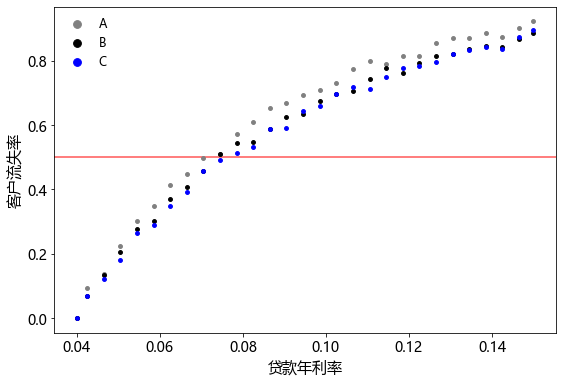

In [38]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.scatter(dat['贷款年利率'], dat['A'], s=15, c='gray', label = 'A') # 调整大小和颜色
ax.scatter(dat['贷款年利率'], dat['B'], s=15, c='black', label = 'B')
ax.scatter(dat['贷款年利率'], dat['C'], s=15, c='blue', label = 'C')
ax.set_xlabel('贷款年利率', fontsize = 15)  
ax.set_ylabel('客户流失率', fontsize = 15) 
ax.set_title(label = '', size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14)
ax.axhline(y=0.5, c='red', ls='-', lw=2, zorder=0, alpha = 0.5)   #水平线
# ax.grid(axis = 'y',linestyle = '--', color =  '#909090')
ax.legend(fontsize = 12, frameon = False, markerscale=2)
plt.savefig(r"D:\c_\大三下\建模——水\bighmk\scatter.jpg")
plt.show()

### 4.4 遗传算法

In [46]:

plo = company_prob.groupby("评级").agg({'评级':'count'})
plo.columns = ['个数']
plo = plo.reset_index()
plo

,评级,个数
0,1,24
1,2,34
2,3,38
3,4,26


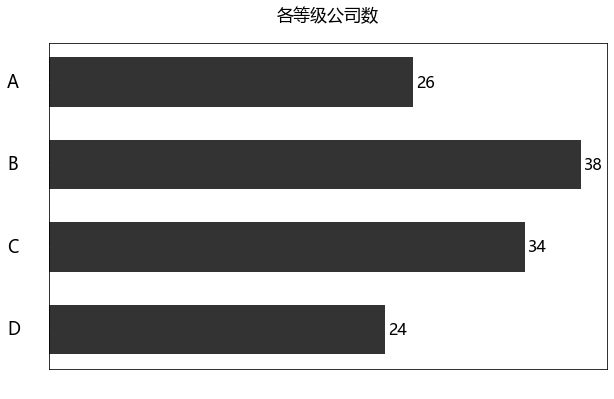

In [77]:
fig, ax = plt.subplots(figsize = (10, 6))
barh = ax.barh(y=plo['评级'], width=plo['个数'], color = 'black', height = 0.6, alpha = 0.8) 

# 刻度
plt.xticks(size = 14, color = 'white')
ax.tick_params(axis='x', color='white')
ax.tick_params(axis='y', color='white')
plt.yticks(size = 14, color = 'white')

labels = ['D', 'C', 'B', 'A']
for i, yi in enumerate(labels):
      ax.text(-3, i+1, labels[i], horizontalalignment='left', verticalalignment='center', fontdict={'size':17})



ax.set_title(label = '各等级公司数', fontdict={'size':17}, x=0.5, y=1.05)

# plt.text(130, 10.5, '占全球排放量比例', fontdict={'family':'STKaiti','size':17})
# plt.text(142, 8.8, '31%', size = 16)
# plt.text(142, 7.8, '14%', size = 16)
# plt.text(143, 6.8, '7%', size = 16)
# plt.text(143, 5.8, '5%', size = 16)
# plt.text(143, 4.8, '3%', size = 16)
# plt.text(143, 3.8, '2%', size = 16)
# plt.text(143, 2.8, '2%', size = 16)
# plt.text(143, 1.8, '2%', size = 16)
# plt.text(143, 0.8, '2%', size = 16)
# plt.text(143, -0.2, '2%', size = 16)


ax.bar_label(container = barh, size = 16, padding = 3 )


# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
plt.savefig(r"D:\c_\大三下\建模——水\bighmk\bar.jpg")

plt.show()

In [107]:
lend_company = pd.read_excel('违约概率.xlsx', sheet_name = 'Sheet3')
lend_company

,企业代号,评级,proba,企业代号1
0,E1,4,1.701616e-04,1
1,E2,4,1.323853e-07,2
2,E3,2,3.225515e-08,3
3,E4,2,2.167636e-01,4
4,E5,3,1.580533e-02,5
...,...,...,...,...
117,E119,1,4.977224e-01,119
118,E120,1,4.472824e-01,120
119,E121,1,4.993379e-01,121
120,E122,1,5.008609e-01,122


In [113]:
lend_company1 = lend_company[lend_company['评级']!=1].set_index('企业代号').drop(columns = [ '企业代号1'])
lend_company1

,评级,proba
企业代号,,
E1,4,1.701616e-04
E2,4,1.323853e-07
E3,2,3.225515e-08
E4,2,2.167636e-01
E5,3,1.580533e-02
...,...,...
E98,3,4.619318e-01
E104,2,4.533271e-01
E105,2,4.734014e-01


In [121]:
risk = lend_company1['proba'].values
print(len(risk))
risk

98


array([1.70161571e-04, 1.32385260e-07, 3.22551533e-08, 2.16763598e-01,
       1.58053256e-02, 4.45576327e-01, 2.73478712e-05, 7.01011751e-07,
       6.64486647e-07, 1.46026844e-01, 1.26379560e-02, 1.82540633e-01,
       3.27848027e-02, 1.95723641e-02, 1.25061773e-04, 1.78020299e-01,
       3.98207452e-01, 4.10539239e-01, 2.11177879e-04, 3.65231752e-02,
       3.64504545e-03, 3.17102878e-04, 1.71601188e-03, 2.77996359e-01,
       8.48923429e-02, 1.26699030e-01, 5.98074020e-02, 6.59752372e-02,
       2.10359003e-02, 1.01953978e-01, 7.25112997e-02, 3.30966468e-02,
       6.76566417e-02, 1.40425611e-01, 9.63247971e-02, 6.61420873e-02,
       2.18003068e-01, 1.48668155e-01, 1.56375182e-01, 1.32814608e-01,
       1.68381674e-01, 1.94313306e-01, 1.23821938e-01, 5.59176303e-02,
       1.26826402e-01, 3.69837680e-01, 1.09555595e-01, 1.61600912e-01,
       1.97743261e-01, 1.21061866e-01, 1.98949453e-01, 1.23533173e-01,
       1.55272537e-01, 9.03877305e-02, 1.54379381e-01, 2.24876647e-01,
      

In [148]:
# rang = np.zeros((magnit, pop), float)
# rang[1, :] = [1.22, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# rang

In [150]:
for i in range(5):
    select = []
    for j in range(pop):
        select.append(random.uniform(0.04, 0.08))
    rang[i, :] = select

rang

array([[0.070314  , 0.05321279, 0.05254276, 0.06569435, 0.05397363,
        0.0560358 , 0.06086921, 0.07428362, 0.05949057, 0.06200287],
       [0.07945026, 0.05020883, 0.06216842, 0.0434448 , 0.06263873,
        0.07365609, 0.04319392, 0.07474263, 0.07424159, 0.04731232],
       [0.05273134, 0.06769282, 0.04808423, 0.04873159, 0.06559356,
        0.05222752, 0.07152843, 0.05778322, 0.0522278 , 0.06349969],
       [0.04943481, 0.05277892, 0.06661075, 0.05542452, 0.0757536 ,
        0.05209444, 0.07465151, 0.06679169, 0.06316805, 0.05712639],
       [0.04923984, 0.07976734, 0.06310257, 0.05876238, 0.06102176,
        0.06196708, 0.04625812, 0.04602594, 0.05130458, 0.0459225 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [207]:
rang1

array([[54.92553862, 37.2021007 , 38.02840204, ..., 76.96961991,
        61.74579494, 87.97459121],
       [20.141743  , 84.98061365, 76.00882337, ..., 66.38662683,
        30.55235131, 48.48145149],
       [90.21391204, 52.61601083, 27.72730156, ..., 61.66232784,
        52.05727396, 35.80295765],
       ...,
       [50.37634757, 20.82479789, 58.0037234 , ..., 50.3371409 ,
        59.28991822, 62.95250465],
       [60.84446567, 59.78186756, 87.50623003, ..., 10.25275645,
        56.54270514, 19.05859763],
       [46.77235714, 72.68501734, 40.79387049, ..., 14.96453507,
        16.99225884, 52.11327133]])

In [242]:
# rang = np.zeros((5, pop), int)
rang
print(len(rang1))
pop

100


98

In [209]:
for num, choice in enumerate(rang):
        single_array_sum_money = 0  # 某行贷款额度策略、某行贷款利率策略下预计利率
        for i in range(pop):
            lend_rate = choice[i]  # 对第一家公司借款利率
            lend_money = rang1[num][i] # 对第一家公司借款额度

for num, choice in enumerate(rang):
    for i in range(pop):
        print(choice[i])
        print(rang1[num][i])
        print("****************************")

0.06723019670239753
54.92553862158707
****************************
0.06989040616725713
37.20210069838496
****************************
0.06500724025158722
38.02840203717011
****************************
0.043575377983381215
18.916751689894525
****************************
0.054297603700317484
93.77795296729128
****************************
0.07670633102033889
40.11245313865174
****************************
0.05198160677576983
63.93721426999171
****************************
0.04710035396429474
84.83153644313808
****************************
0.05647019716922087
27.681061381598678
****************************
0.07670373970191238
54.62374964769884
****************************
0.0554422326245719
20.945459040090398
****************************
0.04381126365002982
37.59628668812806
****************************
0.0576355043972874
69.12061680831361
****************************
0.05520573858965153
26.68520457448031
****************************
0.06340940633252354
80.6754581541418
**********************

****************************
0.04390973900907226
81.81597726474587
****************************
0.07444824087607635
50.302645376552
****************************
0.07270782086483421
28.9323550565482
****************************
0.06517524927921994
61.49648410803239
****************************
0.0491424956711542
27.72350386508142
****************************
0.05200861117718038
53.56468994625699
****************************
0.0557904723190399
41.16146349615633
****************************
0.07082571869385654
90.39207740297124
****************************
0.07689310835564883
48.1481714439827
****************************
0.056253769135993864
46.32031588839948
****************************
0.06756320589946013
77.52414269045333
****************************
0.07782323989949191
86.29345982447006
****************************
0.06806910624091611
25.4425555121407
****************************
0.071172527730592
88.63172983254076
****************************
0.07439836163780743
87.13829049295559
***

42.270473728837324
****************************
0.05626240810852934
22.142625006184268
****************************
0.07118646402956882
34.58239824174942
****************************
0.05624982492178983
42.22088313127659
****************************
0.0783222647576703
60.79797571015683
****************************
0.06049228061999906
37.062444735199506
****************************
0.04003482571214599
17.63091567761369
****************************
0.06188901067272984
22.44211407978928
****************************
0.06955770290244637
76.57512166055294
****************************
0.07534531687327076
49.35585260558165
****************************
0.045151373509383974
51.45397221287188
****************************
0.05709856840459586
54.74699317917185
****************************
0.07505835275159259
30.858905670092128
****************************
0.0656272506625694
55.10701603653401
****************************
0.06029580689976084
79.1191719005405
****************************
0.06011872528

****************************
0.04033291341792196
57.53606199526291
****************************
0.06061924819771883
21.826996102810742
****************************
0.06287308987155397
95.67329315756318
****************************
0.07579860558323152
93.83169141060505
****************************
0.06708372032830107
42.48968878679945
****************************
0.07437397556534171
92.10989131763743
****************************
0.07881496843633637
93.6965012391757
****************************
0.06318560551259772
47.57373494876493
****************************
0.0667543637754636
92.57272296019661
****************************
0.05876726364795261
17.70017234302251
****************************
0.06330963731936758
63.117098900681285
****************************
0.06098832652201286
62.66951707113096
****************************
0.05576118993126934
72.0717445253893
****************************
0.07793177824389921
19.040136788411637
****************************
0.0754982425828416
89.71199976333

16.655345169583427
****************************
0.06309384877955221
19.196731104738824
****************************
0.05206580776111218
10.908268487017253
****************************
0.07057166130927683
72.35593667582933
****************************
0.04148063772861467
27.144192923396282
****************************
0.07390348501717994
13.676914920773484
****************************
0.04233594879761027
76.29070579891707
****************************
0.07589143756002932
95.02873514126449
****************************
0.05873435811159018
86.64260959285299
****************************
0.0515002081372018
83.3454929488774
****************************
0.046770441595652024
79.28440802448722
****************************
0.05703766548268756
47.065259328686906
****************************
0.05467918264245206
25.448206670191134
****************************
0.0774762490338666
87.72250852120528
****************************
0.057590428950186304
11.424070128534606
****************************
0.048253

****************************
0.05958059982318459
61.774795066906805
****************************
0.05327801829732105
10.789803600837297
****************************
0.07828561986132107
24.230538282194537
****************************
0.05435330046980152
22.884867259310568
****************************
0.049745177521937425
98.03694813644776
****************************
0.05321567512195077
83.36755355017304
****************************
0.06926899539996864
67.57232173856991
****************************
0.06181816094624613
97.25991511297438
****************************
0.04216489216686889
52.47859203991232
****************************
0.06590758029362191
24.479024256389927
****************************
0.04067771941917005
54.7066725886403
****************************
0.044152696427499874
47.92860024009815
****************************
0.06770736434554446
71.34240416784527
****************************
0.0411701783395856
64.31891431417992
****************************
0.04976500711390199
12.66514

18.804682461388573
****************************
0.045325809911532206
80.28855193618948
****************************
0.07788075971987732
65.0849036336686
****************************
0.06883615759896455
41.3044253915571
****************************
0.06570187494597007
75.80483210032867
****************************
0.06790299558975135
25.934165535777105
****************************
0.04446125670082142
41.11259568232535
****************************
0.055714327684943554
80.43797731240458
****************************
0.06848506511028607
92.42595095634451
****************************
0.054539644026142156
77.63757482970674
****************************
0.052737609806423225
89.6666541394925
****************************
0.07099542086757563
81.37024985752177
****************************
0.044205140890885536
94.12351074924149
****************************
0.04811139426909215
36.74532037092266
****************************
0.051025664481392084
44.061254389170045
****************************
0.0762935

****************************
0.079340282128178
76.16041403557001
****************************
0.06867221134005046
69.17913085404251
****************************
0.05309783274109156
27.8235933137819
****************************
0.0606799675462522
49.512642946238294
****************************
0.07238533765558886
83.3419749045689
****************************
0.05907704102635885
68.628043648898
****************************
0.04903219869898811
98.35704710658595
****************************
0.05607930275051447
57.524637836322356
****************************
0.044244521359097025
71.56989677189463
****************************
0.0663174265605052
64.28553099553187
****************************
0.07391226583677911
40.57074041756049
****************************
0.06856295508067634
14.39589043243469
****************************
0.058783418582025355
17.18743765872884
****************************
0.049714595386018696
62.046905821868506
****************************
0.0628675911944341
90.0012923188137

46.930071389398854
****************************
0.056930828174639646
59.74102487985229
****************************
0.056077787452898833
71.5986127605099
****************************
0.051129810788173344
89.4832348530903
****************************
0.06838677417536913
55.462522039116806
****************************
0.04042472862663454
38.576005817148115
****************************
0.07380174668130134
71.8505448278872
****************************
0.05119520832934685
60.3049503096965
****************************
0.06274105387537747
99.08861239111039
****************************
0.06302508995645309
38.178064054348084
****************************
0.05430073882130043
69.06371354470608
****************************
0.0565788859182542
79.0070456300991
****************************
0.05476295332824154
75.79920107374889
****************************
0.06105241442092893
17.783284990437927
****************************
0.04328599221525845
95.88417613723796
****************************
0.04885867110

****************************
0.04525735898990648
42.065457640602794
****************************
0.06091958033862356
83.32295620923207
****************************
0.0714651717493078
75.37620182709735
****************************
0.06912244758564286
73.48740607778623
****************************
0.05237966392172815
12.61906583931577
****************************
0.07544377278932238
62.578261704947835
****************************
0.05162119678475904
62.4546545126153
****************************
0.07041990105188967
51.12822689019667
****************************
0.060664021244364964
25.63300279988799
****************************
0.061864119136776814
38.19237717937486
****************************
0.05610388485147119
36.54052180170375
****************************
0.0660040530444444
85.44766009995078
****************************
0.07622041938293034
63.78999895189835
****************************
0.07948491819714038
64.7283999828141
****************************
0.04170839610824078
82.3459022786

62.239424698596835
****************************
0.04938150404900773
47.29925667018038
****************************
0.052534311691852555
30.964796531198697
****************************
0.04343496380014112
18.747394957751595
****************************
0.05506205709893878
72.24196306615613
****************************
0.06945506090566643
80.88638867220263
****************************
0.0535496420349895
84.94472812942867
****************************
0.07611721898014334
72.40966759337189
****************************
0.05538816818889546
25.560096629367088
****************************
0.056000102575215094
37.26446523253567
****************************
0.04546776943320539
76.09096588915176
****************************
0.04213738861049949
91.75819764476819
****************************
0.053584115120720505
62.04866971157085
****************************
0.07443127116413117
29.59899003792774
****************************
0.05379150489530233
86.7887682919516
****************************
0.04455171

****************************
0.07707183196404202
78.3003925287689
****************************
0.07688449316589677
15.102445855711942
****************************
0.07400628467310215
59.293310363705395
****************************
0.07350220795677992
97.97624492258451
****************************
0.06445424433426117
20.663096374294547
****************************
0.0622629001770372
45.07941400409528
****************************
0.04088690291753652
68.4160438234403
****************************
0.05920796875160424
42.50341817315213
****************************
0.04277210140901883
92.1333747928404
****************************
0.04719126146761152
96.85891013808737
****************************
0.0789187636262131
19.76612806689598
****************************
0.046887934550783425
26.46007823026963
****************************
0.05973730779657006
75.050987067751
****************************
0.0613584192449632
34.296055996142755
****************************
0.06232435020325418
77.5614985946285

58.820167688883785
****************************
0.05548402287938554
61.294846217547594
****************************
0.04413876175972606
95.38410927556608
****************************
0.058676059820131896
86.48691252344618
****************************
0.07117343448608981
15.678872122225535
****************************
0.06587757139584621
12.895797974255775
****************************
0.05750293704534193
58.73258887350105
****************************
0.07144850887720591
82.60055472670558
****************************
0.05030164638126511
94.1803231629486
****************************
0.06842820285610454
21.713262826407554
****************************
0.04451727567073573
67.56861472022098
****************************
0.06967303120616493
79.92209308345879
****************************
0.07325087623479608
18.25112720513675
****************************
0.07568338570661388
33.717422735507455
****************************
0.07831923613054989
38.18732434613442
****************************
0.0748437

****************************
0.05708390673718207
88.16427028369934
****************************
0.042309271293750284
52.19158664282136
****************************
0.0757276495566516
36.536669521272074
****************************
0.06010990890965583
94.24603891087824
****************************
0.061042670449935624
70.96005788451268
****************************
0.0489985156409468
51.44424241888292
****************************
0.053003254082348406
28.963570203769002
****************************
0.07761681197209055
90.35976591564591
****************************
0.07180734802454813
96.36406651015817
****************************
0.052595725755322294
17.962501015389847
****************************
0.07876432373473888
65.76656847676728
****************************
0.06200294010066812
12.128822736616147
****************************
0.05172071556570569
85.354101195043
****************************
0.05293326964391058
28.85155379546419
****************************
0.060892309529156155
86.76886

83.29654031324624
****************************
0.051834040119713494
82.54127767612424
****************************
0.052170382927394086
58.19242718621733
****************************
0.04723060545792978
36.32203218368754
****************************
0.06630029408613525
74.92095083358026
****************************
0.05910982596948163
55.62837431645445
****************************
0.04641376050873154
63.42790568755188
****************************
0.07646863464700535
35.9720854440247
****************************
0.06562172583995052
15.924409642072844
****************************
0.04023414063830911
53.6087992410818
****************************
0.057933671762179215
57.55106991860562
****************************
0.06636805011987251
68.94625403690432
****************************
0.05213962753630241
55.066710056580675
****************************
0.04267978579817628
40.839597140403285
****************************
0.050689935722136495
84.48096729485584
****************************
0.05323342

****************************
0.045272311549922124
78.19631484579624
****************************
0.05642806371513709
99.39639041847829
****************************
0.05957343612015073
98.27917082892813
****************************
0.061828097054882555
99.7328617398528
****************************
0.0723144771120181
72.34627870908864
****************************
0.040458018226763474
84.50043767176962
****************************
0.04750726610787768
38.08824337410819
****************************
0.05614531279638697
86.70905727523763
****************************
0.07012246651015569
84.7340498126493
****************************
0.04795789539063863
25.787479783040833
****************************
0.07697411504403638
97.11993780215118
****************************
0.06527245571198818
69.7359787918082
****************************
0.07136682985681775
26.945354821105266
****************************
0.06678999937059645
97.67117648879501
****************************
0.06352460328594606
80.903537134

68.18953201399174
****************************
0.04447844623578309
67.04351449955595
****************************
0.061304304490029826
11.824096348237997
****************************
0.06553265952662346
34.29758396556292
****************************
0.06409584227518014
32.550376816913555
****************************
0.0686595002396097
93.99714621722167
****************************
0.07849354885379264
56.46074188444306
****************************
0.05008613715080697
29.267198067936164
****************************
0.040721579040107085
88.52631283997304
****************************
0.044777873087475405
80.36434689588555
****************************
0.07271060694731152
56.58620966512064
****************************
0.05241885164844592
82.07814872139843
****************************
0.0780927212546452
33.42821999222725
****************************
0.051072054232663935
70.81677341643103
****************************
0.041841286810987824
32.60722654937709
****************************
0.0559682

****************************
0.06088881809966604
24.13861634296435
****************************
0.07849107567104519
19.583820598469796
****************************
0.06420075765426532
35.49491749796741
****************************
0.06500463768882211
78.46829336241993
****************************
0.04910305928142088
15.865222050591298
****************************
0.07017880196733384
99.40818478108743
****************************
0.05672750980442996
34.22824899957742
****************************
0.04852731231146903
78.57059681810388
****************************
0.055102620228401886
44.18093133946062
****************************
0.04483973975885184
45.144442686505755
****************************
0.06252849440187219
99.69966486806373
****************************
0.06091668098935128
92.03004845829031
****************************
0.07671773224846745
21.893493976370355
****************************
0.04937523848988078
15.446773390226737
****************************
0.048602623726708254
52.076

62.80629656300718
****************************
0.04384797353233205
86.27184704246625
****************************
0.044100807710453035
62.1479968295164
****************************
0.055120121882668974
60.07355105842955
****************************
0.05036469501516498
23.36735779922563
****************************
0.0624711175558009
23.181494523402137
****************************
0.05795934250240575
44.792922215826614
****************************
0.050527070812587026
13.434073275697195
****************************
0.07940469564249893
40.19365255409309
****************************
0.06482008040228808
33.27047664983524
****************************
0.07794659000613816
32.41256159538827
****************************
0.07069876528981767
30.772063529894677
****************************
0.07504404258548314
99.34022240097165
****************************
0.07297465955579216
88.8727335076593
****************************
0.058699396241892146
32.70539369544021
****************************
0.05005937

****************************
0.043422336936503166
52.647385419800116
****************************
0.07213123061218696
43.7135684783329
****************************
0.06690877688569957
99.29631556101414
****************************
0.06840555414508065
38.250081761650634
****************************
0.05415306282060043
52.88049730994909
****************************
0.0781096246321009
67.38558563894568
****************************
0.04711135134661397
79.1657589202001
****************************
0.07461113562050042
57.96933092612978
****************************
0.05437219806362796
52.49651352266884
****************************
0.06160586415783609
50.12345219992445
****************************
0.04525746466163876
16.75616844529317
****************************
0.04781129036248687
13.843420175932863
****************************
0.07413332335725259
49.45263752764375
****************************
0.07595096601772039
73.86700545382918
****************************
0.06552453923653181
28.182966281

45.727169520743495
****************************
0.048128679443784225
88.75342063163585
****************************
0.04273229284813117
31.791262777591946
****************************
0.07492149708481531
52.51702483548358
****************************
0.07428255497420161
27.102495974579305
****************************
0.045805583071996094
45.09063734254004
****************************
0.07015357191144375
69.02016557261915
****************************
0.06501726483276435
20.781494798225346
****************************
0.045634075504084645
42.90217094681941
****************************
0.06021015499762279
29.362819034900326
****************************
0.04684218720300241
92.61000453695323
****************************
0.06295387182328001
84.03996176016132
****************************
0.06734558893607609
97.50479747316777
****************************
0.059993146981900995
94.66726300422367
****************************
0.06009515931132566
28.897872984086465
****************************
0.070

****************************
0.0693826173377793
61.763366531919125
****************************
0.07147737713408983
99.88825283170895
****************************
0.06044340524989948
63.53330722599518
****************************
0.04922051679731975
90.54560313530146
****************************
0.049005989748704626
99.64345807504056
****************************
0.06961386233884771
78.22959745674169
****************************
0.06589116216970141
51.86380205834139
****************************
0.04011295909528895
45.527934540740496
****************************
0.07106216603756459
59.96271321605427
****************************
0.05884467287205182
66.3021959972258
****************************
0.04244986805284235
31.904815852774142
****************************
0.05397898384489812
58.57861651200544
****************************
0.05145992542246225
92.3493051951818
****************************
0.04769699334811747
13.135603894732995
****************************
0.04650236978077734
86.15861925

15.74646500299856
****************************
0.07052555442665914
79.63457710673543
****************************
0.05794371073769255
84.76980711638005
****************************
0.07155160295218646
21.811514474978207
****************************
0.07493117148500407
75.09401953351089
****************************
0.05965832882091865
77.08285145162881
****************************
0.07131442025371587
86.70242165325928
****************************
0.045165096721779374
53.938920303260254
****************************
0.06601911463035752
80.35682211014893
****************************
0.07525870590253256
54.34751100332121
****************************
0.060324256227397004
40.111187990560296
****************************
0.07970688297559132
13.462285216143123
****************************
0.06328080487052223
25.78630940039602
****************************
0.0764197197260443
27.088405965272315
****************************
0.059559954616520194
12.67866138391964
****************************
0.056482

****************************
0.05109664720795328
20.799964063959706
****************************
0.050263226599295927
74.22697145022082
****************************
0.047794563949751845
78.95125408530261
****************************
0.05173199868543195
75.82459915315538
****************************
0.04937322987028697
35.39468807249365
****************************
0.05786477607954989
23.38293022354454
****************************
0.05933019183473853
16.461758779018158
****************************
0.07761661297274815
67.73262970236088
****************************
0.054553165120771026
45.400411874222215
****************************
0.0401622805015492
94.40694424759371
****************************
0.07558463925559375
33.406345323420155
****************************
0.057149942433010206
36.307581158084645
****************************
0.0620244409355547
35.91134482917852
****************************
0.04081427993888671
89.35951690813098
****************************
0.07235136358712989
94.762

60.743286456458925
****************************
0.042231948238694195
75.36065940631107
****************************
0.0641190233639925
51.716945278152664
****************************
0.0539436544352096
57.42627244780304
****************************
0.07664747649128764
39.028801211700184
****************************
0.05208255793586999
11.074830028181967
****************************
0.06507889935291084
58.517525176978786
****************************
0.061524718214942764
35.58819970386703
****************************
0.04500396095704585
26.187293373875022
****************************
0.06694932597692296
52.13625124693759
****************************
0.07973609036172472
68.86130030963129
****************************
0.04531300362699022
62.54549294246099
****************************
0.07342047529514675
73.57541969484615
****************************
0.06834093967624102
65.02179040505855
****************************
0.04311801811904731
28.718729045577202
****************************
0.079802

****************************
0.06090912268464663
94.57390413196494
****************************
0.06477685434375685
82.70637296171694
****************************
0.045338500139690784
10.97250224072684
****************************
0.041281814254945426
56.49908619749888
****************************
0.047835610779914293
37.94817713960268
****************************
0.0533783152486456
85.56751731432706
****************************
0.07751344401288424
22.14263663838416
****************************
0.05540721486392731
81.95717876314446
****************************
0.06177044199819626
93.07878953973193
****************************
0.04749253724069202
85.50783859870212
****************************
0.0682033364827535
31.88615967024227
****************************
0.07905625301188363
72.00513079151607
****************************
0.05633067520303293
98.74347241619569
****************************
0.04335787126668306
56.62579037604475
****************************
0.06449350260828521
95.092541814

89.03921158157108
****************************
0.07251861721396388
41.46531809708654
****************************
0.058303269290117546
20.257920643472847
****************************
0.07672187479742815
21.504076121448442
****************************
0.06763503295197841
87.23353430046096
****************************
0.06696770846014169
90.75097315232476
****************************
0.07295484791178497
63.47568338593847
****************************
0.07931094881407574
72.52127080039364
****************************
0.0645354001451578
28.70136860238267
****************************
0.0770002789265578
15.531148635049242
****************************
0.07116902645351424
49.56143844675636
****************************
0.0546445898262814
31.44632172876231
****************************
0.05153400644556675
99.81249088216228
****************************
0.07954549020486146
60.464651124908464
****************************
0.0662152438523454
15.305427274994118
****************************
0.04367147058

****************************
0.045915480274536076
50.972649630712574
****************************
0.07403607045577906
53.37464827952165
****************************
0.07895993467386223
12.263405395885398
****************************
0.050224726307760925
49.54335792771095
****************************
0.057166548442972136
25.347064188803806
****************************
0.06694277359580311
19.718594737787022
****************************
0.05823325470486536
54.70057773863358
****************************
0.04909016272066343
64.99583038978312
****************************
0.056733219901328416
54.463051738356526
****************************
0.07046085034271637
82.37679365677147
****************************
0.048963570788161534
58.53851250390573
****************************
0.0633575445767963
83.27310932688091
****************************
0.07675883305896913
97.58663020993107
****************************
0.04113332260168844
88.0101952562548
****************************
0.07173445064133246
51.73

95.27163958956078
****************************
0.056414046774464016
61.50476845902087
****************************
0.06593987932219048
17.09578022451707
****************************
0.05819041648440523
95.07754256354515
****************************
0.05253073231368874
71.48189514648777
****************************
0.04409129117579336
18.99944095501936
****************************
0.07720960867935532
36.69587687143483
****************************
0.07524779327876255
75.1953347265866
****************************
0.07525740698469482
60.39188621464358
****************************
0.04011804409788002
31.351787668032536
****************************
0.06664369690787704
56.835889701257045
****************************
0.05634750779848705
43.90179635026957
****************************
0.043072066265555896
27.659797072334335
****************************
0.04525110842978612
12.096277975444316
****************************
0.07316245451253536
90.22515324873574
****************************
0.06970990

****************************
0.07738284252169583
99.42746731002103
****************************
0.06488299189782701
72.55903909321222
****************************
0.04839448408043538
27.448585609102906
****************************
0.0745180043014608
76.45719945437506
****************************
0.04126266415436323
26.683872012904814
****************************
0.042464699521786095
64.60929074520752
****************************
0.05081129809994539
63.50261871391294
****************************
0.07569234032579802
63.50187415951116
****************************
0.040640752080716894
62.99508402105723
****************************
0.04018844850259885
42.689343210623925
****************************
0.0480776987496592
17.28602586885371
****************************
0.06574597375225405
66.71252730190238
****************************
0.04236765919753871
19.973849853158654
****************************
0.040252771351446
31.841801322709465
****************************
0.0734147098789419
24.93066998

13.804042799866222
****************************
0.07150196965089645
74.15694789977432
****************************
0.07061780694844769
94.04350393868371
****************************
0.0672706004829935
26.48236633590063
****************************
0.07045465652414656
40.98865982521269
****************************
0.06695210015602064
55.69034225670647
****************************
0.06836656541299277
54.20690802526197
****************************
0.05360693030599366
58.640915585182114
****************************
0.04738862219139182
33.56791151495115
****************************
0.058115691165247216
90.62602202706009
****************************
0.046727494528511854
46.818469818754714
****************************
0.057787694014177646
49.682863187196865
****************************
0.07416240773879787
16.474182770001597
****************************
0.04950858248647975
98.15465491616591
****************************
0.05038862619852327
94.23665994051302
****************************
0.040313

****************************
0.057478402435426165
57.29720611365086
****************************
0.050998092778147354
56.975145120052325
****************************
0.05016301195707379
59.02314254342026
****************************
0.041386318832313335
56.68826563862056
****************************
0.06595439829815603
74.96149073061186
****************************
0.06494681070932351
85.68822178360108
****************************
0.07687174487819709
51.909340247705984
****************************
0.04580193468495636
97.1917454922426
****************************
0.0754662534162522
20.77318194354903
****************************
0.0758006401615375
50.16579971243089
****************************
0.04256116272188154
24.19988546492271
****************************
0.07594512389583366
65.30526211943501
****************************
0.04075198096560181
42.236192125724216
****************************
0.06640922617943748
57.60158638789763
****************************
0.06720020809908542
26.3014500

29.924401031721683
****************************
0.0737055920245416
98.15866887805858
****************************
0.042818012743360986
41.934459915599476
****************************
0.05314985208490294
65.45603649590579
****************************
0.059624418297216375
56.69791865441056
****************************
0.07646227075037007
10.047835156671708
****************************
0.059653746446074234
91.314019616685
****************************
0.057452959193948466
63.23762735826377
****************************
0.05275109563577085
88.65214596281946
****************************
0.07615031976615223
65.2860213915339
****************************
0.04415897330288956
71.50155057693962
****************************
0.06398927134446518
23.564043400973308
****************************
0.05434694719178414
33.69266929130296
****************************
0.048664898933489964
19.581866203745587
****************************
0.06544263514585782
60.26444981841594
****************************
0.0444964

****************************
0.05036680070668073
98.93112663086282
****************************
0.04876748798503575
13.405571203212485
****************************
0.05366002471154537
49.768141572867336
****************************
0.05298726986183846
84.77317713557701
****************************
0.0490524297570015
48.34778797136649
****************************
0.05894147015657509
81.0150548479114
****************************
0.05521331609363798
98.99248008239806
****************************
0.05654578343187544
74.08729679924197
****************************
0.04191424755771205
32.189115376625516
****************************
0.0711828394640069
51.59795726372299
****************************
0.05297268329960188
85.84484316151256
****************************
0.045587677868866305
22.65580565390761
****************************
0.06427493700360279
81.65553014404225
****************************
0.05175790956545529
53.476154959783315
****************************
0.05558875233438898
49.77696608

60.49776814721518
****************************
0.051188938277497945
20.743726601746424
****************************
0.05826728733459095
86.28551431160453
****************************
0.04466496633928774
15.249908887055671
****************************
0.06229534863402564
46.66554560873207
****************************
0.045037151426455216
57.54133411192364
****************************
0.04087356531242296
78.50020186930912
****************************
0.051476737674714224
71.27374726831388
****************************
0.07716241154376748
13.042980368514485
****************************
0.06598680561307031
67.06756461693271
****************************
0.043532430780947796
68.60963058668702
****************************
0.04220310469271764
66.73337432315563
****************************
0.05560769139270809
30.68010146627647
****************************
0.07627092773369104
94.23681770348885
****************************
0.05697897283901704
15.593423866214348
****************************
0.05779

****************************
0.041388613046967906
91.67918225346456
****************************
0.07838723414291143
54.95869121835534
****************************
0.044241622629645976
10.100071350356028
****************************
0.06556930620438547
28.18967577531862
****************************
0.07788154387664446
66.97794158367677
****************************
0.07085594582523835
82.77432788897863
****************************
0.0678791280662647
75.39642013659696
****************************
0.06859054405436275
64.86072458069644
****************************
0.045089789154461365
77.37103897912625
****************************
0.07945183119634616
87.39452669672599
****************************
0.05918318892861691
26.114285356203748
****************************
0.04786542924406103
30.77658374725957
****************************
0.07496313766420101
22.862100076929934
****************************
0.07781502083044191
78.26275111525663
****************************
0.04978244913991296
52.50724

82.69337905116991
****************************
0.07762938626262801
75.73626112719118
****************************
0.07440416756114876
64.73281285620186
****************************
0.057851777953323996
22.415436885062196
****************************
0.05153339750929451
61.298704509004324
****************************
0.07416675615549487
24.259797131811567
****************************
0.07468118019653741
15.598067655459769
****************************
0.05719443036008655
14.69508994717432
****************************
0.07529722829543269
49.352397941885876
****************************
0.05604103271290797
38.66212515042776
****************************
0.04490715291559743
94.10244686821906
****************************
0.07632228915827935
95.07768478226764
****************************
0.07547063047008634
87.10394928910293
****************************
0.041159854591393645
18.671229286766664
****************************
0.06003008098501745
65.50308967096156
****************************
0.07993

****************************
0.0795615018719238
76.30551780328808
****************************
0.051528803116764055
92.46311602329715
****************************
0.07647440624875379
43.07525771868747
****************************
0.07852058327494776
94.45374779644477
****************************
0.05098423527300811
85.8604504431759
****************************
0.042439962502363565
41.45926837693379
****************************
0.0721907446528211
73.10269291725643
****************************
0.04739172545202723
96.83747199569808
****************************
0.04666123044894528
55.48254116685305
****************************
0.06672293677290017
24.72015212972061
****************************
0.07039316549881686
63.61749814259934
****************************
0.07319799988407982
29.10994441397398
****************************
0.06249238485446996
79.88554476285742
****************************
0.07310853572088777
67.60735047900295
****************************
0.06600038226377711
11.47710544551

76.03070976689233
****************************
0.055819456143746504
53.51586219075723
****************************
0.06023061077198221
87.40436470670984
****************************
0.06447160169128291
94.8244604978843
****************************
0.06617745841896955
55.92064339339938
****************************
0.06067777371896843
62.61493760916416
****************************
0.04039967446522136
63.70492357966447
****************************
0.05596464779191731
87.29136275837045
****************************
0.06419680501563203
62.93765002468325
****************************
0.07259803115002253
10.239874377741948
****************************
0.05258934280561804
45.925698873704945
****************************
0.04679466496609626
32.98975886059177
****************************
0.05009883489918587
71.86011528356607
****************************
0.05433951729993555
26.000978989767248
****************************
0.04931730682998915
99.76517934022397
****************************
0.0443329629

****************************
0.0787127545048442
81.41522615001993
****************************
0.04746692545225074
72.71344504257871
****************************
0.045657759598676725
51.0781067387616
****************************
0.07475360960145486
87.31597419161875
****************************
0.06570820400434947
19.869406113513584
****************************
0.05993784361073205
10.497959905814923
****************************
0.07712710193834701
68.678638598932
****************************
0.05041443569383269
29.828796087512952
****************************
0.05505079980164788
39.253421943505415
****************************
0.07027516722562405
37.9519810775176
****************************
0.07215546207345008
64.80882787896306
****************************
0.05595093001051296
67.43815848678827
****************************
0.04135672864700304
38.148506387115205
****************************
0.062409167782018785
48.12305055801232
****************************
0.06334641625586629
71.35268685

17.49467320390032
****************************
0.050463721770362444
18.24039036873883
****************************
0.06759079834384348
12.78822720474017
****************************
0.06619248110888397
62.84659087532738
****************************
0.06995800830825663
33.61114317151933
****************************
0.04536920957535121
21.795479864393386
****************************
0.0405188142891265
34.80110764092597
****************************
0.0675933099668897
28.313381462240844
****************************
0.05981106314718397
95.03621933648841
****************************
0.07250010849241184
93.27617313366858
****************************
0.04882400237388065
27.83139543516532
****************************
0.07216563207387168
94.46496970839202
****************************
0.07955883359343698
97.30131429709594
****************************
0.04746614978405309
54.56743202107953
****************************
0.05454048503027991
20.06700960009827
****************************
0.079564297337

****************************
0.058823426771099765
95.9698631374713
****************************
0.05931524703277345
19.138845504135578
****************************
0.06177775202374663
49.07690997213166
****************************
0.07651077248501406
27.410543279360738
****************************
0.072598757223271
48.6248592475338
****************************
0.0604614513050938
41.783808153404095
****************************
0.07938531340587188
72.5615552065066
****************************
0.04996270021289483
47.31562214621367
****************************
0.07834024006997187
11.84118723588033
****************************
0.07298824943219973
77.42579196117259
****************************
0.071118112425239
83.88198134695713
****************************
0.055285650025684065
22.65106639259408
****************************
0.07499665001760311
19.058006049614587
****************************
0.052412361883186806
71.58021299956422
****************************
0.068640859041864
37.1678245840220

57.22702155283309
****************************
0.06241368766894756
62.73659044218513
****************************
0.05076234650484982
39.20828429186521
****************************
0.041375891697444
98.27432043823796
****************************
0.04925552111715031
15.206235814521364
****************************
0.06283682552129499
59.80100713411212
****************************
0.06306058505648388
73.21623618180362
****************************
0.07407238867782781
43.712477323762414
****************************
0.06255717732079022
33.69466011586427
****************************
0.07475732692300542
37.94778417994537
****************************
0.07397683431296226
83.0739359605009
****************************
0.05016736963183033
18.50673026749145
****************************
0.06115017944543627
84.47947745781161
****************************
0.04510245152353338
97.50003240729508
****************************
0.0665969092893832
98.54141933307135
****************************
0.049739358049697

****************************
0.04740329462389675
98.97763229660943
****************************
0.05624985641774463
14.09561286359828
****************************
0.05491024782013952
13.105994336717101
****************************
0.06265546940483735
60.35139967885621
****************************
0.045179273044504364
42.02099027871284
****************************
0.040414254391337216
91.33342271214315
****************************
0.05638929205042806
32.779347161878945
****************************
0.07273747284687918
51.50267787885764
****************************
0.053714186276034005
81.47739789969347
****************************
0.043288174153838475
63.263970754093506
****************************
0.041640117566663304
84.63330296412119
****************************
0.07115960696163101
98.0725946404667
****************************
0.05599094458598561
11.556705439106782
****************************
0.043081800620333434
17.592888668883475
****************************
0.0727132853166999
24.0

50.20742280068167
****************************
0.04586682376346282
14.848765823419235
****************************
0.04884202824758256
89.61784805132478
****************************
0.07911248982428583
11.036107567217416
****************************
0.07950389785404363
50.66906850763504
****************************
0.04313218348805277
17.745290030184407
****************************
0.04015803640283382
50.3772098022635
****************************
0.0764199327839499
77.25247591727873
****************************
0.06674278433198567
97.44411626705396
****************************
0.06599234466502782
20.54904900031386
****************************
0.05317389961703779
83.33479657078395
****************************
0.04693788715694057
27.483249382737387
****************************
0.07376873252414176
74.33252535426386
****************************
0.048856716414627896
80.79240647981133
****************************
0.07413669853963276
18.69024573236446
****************************
0.0747976897

****************************
0.050890401385832465
44.082310083474944
****************************
0.06303953002590292
36.873373444170994
****************************
0.05630495426617281
38.17087775490983
****************************
0.05620968601040524
13.899529935349307
****************************
0.07323733866176495
44.54706725787369
****************************
0.04172630373084672
90.46045986246293
****************************
0.05761907307424531
19.365111629338553
****************************
0.05520081533474462
31.651336647117546
****************************
0.06521603319271893
70.16732691226585
****************************
0.04892258551669844
88.45570090118548
****************************
0.04270184318283816
58.57578610876982
****************************
0.06342513369734443
32.94151810459136
****************************
0.04420637481674162
75.70741312879385
****************************
0.05534502647510872
20.3417842351601
****************************
0.040371342681164775
46.1199

89.08163739452291
****************************
0.05578078256536912
42.72380460672564
****************************
0.07426213985024024
38.356445586983114
****************************
0.06408551836750252
46.69697046593708
****************************
0.04829840052661866
86.96964714881848
****************************
0.06609432585546252
78.37906608148003
****************************
0.04808163269454991
69.54589019799536
****************************
0.04395545465750661
67.86764055374535
****************************
0.07022827957437898
45.22771628876347
****************************
0.04263927128364723
66.97221181216212
****************************
0.054292867626556746
41.41785694072136
****************************
0.07334869056492085
53.58758554849157
****************************
0.07152508580651448
56.67388987371762
****************************
0.0570673140655195
49.54630475017888
****************************
0.0578256718348026
25.511029778349624
****************************
0.053052219609

****************************
0.06145129763363373
97.54240525550908
****************************
0.0741450234306244
41.032078319124174
****************************
0.040913715643114024
70.73114423238452
****************************
0.04779364168732169
74.87690557217564
****************************
0.07688052675143445
34.4857831619598
****************************
0.06673992265367001
58.00511161546724
****************************
0.07401283176874265
55.0490872935337
****************************
0.05120109988113562
26.347230825270955
****************************
0.06326137681361688
34.1867524906964
****************************
0.06365991150663276
18.961350104935647
****************************
0.0702692924697063
88.78908461167376
****************************
0.04041889931727617
71.49013766315991
****************************
0.0674788343180152
20.000177104732302
****************************
0.07561714007269241
42.40513431400342
****************************
0.06542160773792975
17.78041370037

68.55475598629397
****************************
0.059684187718775365
38.59951737036836
****************************
0.056316586997066126
62.08069582282672
****************************
0.048399495648231344
94.65024239036768
****************************
0.04588012731921241
37.50554719206667
****************************
0.054677240069821706
28.690030957538752
****************************
0.06497026045402736
85.08558785775912
****************************
0.06578192883071843
95.22382856335037
****************************
0.07508543578652055
58.977999437353745
****************************
0.0454890958583461
91.4611475439346
****************************
0.044353726822719694
82.1381052649885
****************************
0.06287172605552827
35.65730875817731
****************************
0.05077785761564161
27.11747831103222
****************************
0.06809584486310605
69.48024051818034
****************************
0.04367914880540449
58.698163923858274
****************************
0.05560473

****************************
0.05660279290645845
72.01745612229165
****************************
0.044336365627549945
52.634948774010745
****************************
0.058752806667950366
70.20295873369425
****************************
0.06960589770214032
33.62143235587004
****************************
0.07920923794383916
29.477442590642866
****************************
0.07813347191156453
36.96451184413819
****************************
0.0755711378212943
33.894101153828174
****************************
0.07590581948196883
85.4364632947438
****************************
0.07449655099781025
50.18333856633377
****************************
0.053666524258842385
64.3623841868384
****************************
0.06938715748070318
57.23954294920401
****************************
0.05750411200512696
87.7550665043678
****************************
0.04350830391812619
99.37603771847215
****************************
0.04052027466441098
60.43401898225451
****************************
0.0601527255526268
13.719852417

24.740150016276594
****************************
0.05646361407221662
23.103713646720827
****************************
0.04355338354571471
87.42945879504771
****************************
0.04000346059095544
52.397918642668586
****************************
0.07019372274342676
48.9208859550176
****************************
0.05560012585502925
87.13870676281736
****************************
0.06189257034513146
93.59228284131369
****************************
0.0612538435513771
80.88176102004307
****************************
0.06547996893276761
90.93400070715893
****************************
0.060241182187674755
74.62220858249867
****************************
0.045360006676592776
15.977608855725295
****************************
0.04957924693151829
90.68283130754841
****************************
0.05273731728120208
59.36688751717064
****************************
0.05250755058076906
76.16137777211608
****************************
0.07877493350830803
25.52130718431337
****************************
0.051961859

****************************
0.07342936733623909
62.36204013257551
****************************
0.07494226897978548
46.0957598618762
****************************
0.04733468000965143
16.066436542552108
****************************
0.06378079412453387
27.53318040517967
****************************
0.07787454038779341
25.875551862280307
****************************
0.0786154209064961
76.44788684977372
****************************
0.06018579961248816
66.05728130118776
****************************
0.07021508668266854
89.92189397960007
****************************
0.04768375191995296
98.47805219734599
****************************
0.04572646816771597
22.08024730280278
****************************
0.07328519170513917
44.06060355072291
****************************
0.07232613879180935
83.59291200068058
****************************
0.05899186746890817
71.51533391115962
****************************
0.07573019324645133
40.30614746572541
****************************
0.0620085149807421
49.36300178020

33.29369500661028
****************************
0.07013733960199109
88.44478490319294
****************************
0.07645203518507138
76.56459355089572
****************************
0.04577554884612039
12.537203003445887
****************************
0.04273804470221854
81.7944352024182
****************************
0.051004862971374375
68.45957454616783
****************************
0.04027419721760202
45.19911619661019
****************************
0.05073060470433192
34.44289949286997
****************************
0.053684688472044016
48.8586667726971
****************************
0.052857074984196326
36.298373599823535
****************************
0.05476816537128691
66.35366670791842
****************************
0.05744828733261302
97.6696502484721
****************************
0.07106964867928599
34.84763403052031
****************************
0.04750163582286689
60.11437210911676
****************************
0.07139910066381389
45.77488975478063
****************************
0.07971962720

****************************
0.05406006592471588
77.31810609576938
****************************
0.052666761548564256
90.95905799280368
****************************
0.0623258526289104
53.481303732896464
****************************
0.047831278579559953
89.93817919444953
****************************
0.07943997676416954
33.52379117010703
****************************
0.06354382130246444
63.44705822900734
****************************
0.051171871046919
42.08285246936715
****************************
0.05085564691196694
41.22378454948304
****************************
0.0740141354707422
48.315406674151504
****************************
0.045347518221722435
63.09567949638628
****************************
0.06790712375172597
47.96155111409054
****************************
0.05489055937600892
51.79861604572726
****************************
0.05339707898655705
22.250615259385036
****************************
0.04928312419237846
95.65419154380416
****************************
0.04624039157365798
20.09398918

69.34009035701735
****************************
0.07823920412136381
33.521668013593754
****************************
0.06195778906227513
27.975412470501155
****************************
0.05659538106377095
79.74398032243548
****************************
0.0725436179098923
32.9124958551577
****************************
0.054693795743243984
44.11741219766361
****************************
0.05651366191640092
73.59522667052435
****************************
0.07199682645245865
81.52176826680939
****************************
0.07497074051383276
68.83471268851744
****************************
0.07970440680844199
23.553579442417817
****************************
0.053539246168660876
96.45693586585995
****************************
0.04266329362270191
34.55853266312354
****************************
0.07594531311098993
16.73224910729433
****************************
0.062256964165571874
74.89858734535136
****************************
0.053407502529065225
21.56433295177302
****************************
0.04538806

****************************
0.05262397863320968
59.79305068202716
****************************
0.042802628302043705
79.95790581835226
****************************
0.06170348616955318
21.834754011566332
****************************
0.07818734794349459
31.334148453944252
****************************
0.0413831528473096
39.30517015403851
****************************
0.073873809678785
78.06556445457632
****************************
0.046766485512012596
92.26474787634638
****************************
0.04436419098729169
35.80982940857144
****************************
0.051053813010561055
99.89925094031805
****************************
0.07882092438105226
37.49889238341021
****************************
0.049138758896883655
55.12565519400424
****************************
0.051266774385176156
98.05163889753966
****************************
0.06349265668184606
31.03422900098544
****************************
0.06897832560139205
42.501208094605225
****************************
0.04522735693520234
26.60151

40.46286152618417
****************************
0.07044975590738792
37.10573050347739
****************************
0.05879743461978025
18.4855763412847
****************************
0.05283494757582512
22.116679799154007
****************************
0.043959636595823075
77.79812443537098
****************************
0.07221241456323678
44.89826748520964
****************************
0.041196754658208275
43.30517741917712
****************************
0.07551310805313946
92.14473152199527
****************************
0.056330625869927264
71.76386350793199
****************************
0.04005843746429382
17.938830865264414
****************************
0.06796961292596503
93.3346260032126
****************************
0.05514293313338973
62.095084797090486
****************************
0.04289664297065638
77.370917766747
****************************
0.04898491952520498
54.055060214733594
****************************
0.04251183930614522
62.10665974947561
****************************
0.0627973297

****************************
0.07528337109440277
29.16469719351401
****************************
0.05832217301572714
66.4388795521796
****************************
0.05971958538790026
42.5971604720392
****************************
0.04111098623784037
57.65413838545927
****************************
0.04768912861252102
17.60087676330423
****************************
0.06781469709852246
15.393868322193416
****************************
0.054592765599617676
54.711786141786604
****************************
0.04892871092737266
83.62300205089623
****************************
0.059716450608094954
36.22038370211892
****************************
0.04695279776885324
71.99040862093418
****************************
0.06190875496936124
58.10542549551995
****************************
0.06011282595426935
66.87176249032727
****************************
0.07291274844275245
15.538911667857285
****************************
0.07627519507589886
78.7899475676865
****************************
0.06223060905274307
52.03031160

In [250]:
import numpy as np
import random
import matplotlib.pyplot as plt


def get_rand():
    select = [x for x in range(10)]
    random.shuffle(select)
    return select


# time = np.array([[82, 16, 66, 71, 44, 28, 76, 85, 36, 8],
#                  [91, 98, 4, 4, 39, 68, 26, 26, 84, 6],
#                  [13, 96, 85, 28, 77, 66, 51, 82, 59, 54],
#                  [92, 49, 94, 5, 80, 17, 70, 25, 55, 78],
#                  [64, 81, 68, 10, 19, 12, 90, 93, 92, 94],
#                  [10, 15, 76, 83, 49, 50, 96, 35, 29, 13],
#                  [28, 43, 75, 70, 45, 96, 55, 20, 76, 57],
#                  [55, 92, 40, 32, 65, 35, 14, 26, 76, 47],
#                  [96, 80, 66, 96, 71, 59, 15, 62, 39, 2],
#                  [97, 96, 18, 4, 76, 23, 26, 48, 57, 34]])
'''种群数量'''
magnit = 100
'''公司数量'''
pop = len(risk)
'''初始化群体'''
# print(pop) pop=10
rang = np.zeros((magnit, pop), float)
rang1 = np.zeros((magnit, pop), float)
# print(rang)
# print(type(rang[1][1]))

##################################################################################################################
### 随机分配形成祖先群落

#### 生成贷款利率祖先群落
for i in range(magnit):
    select = []
    for j in range(pop):
        select.append(random.uniform(0.04, 0.08))
    rang[i, :] = select

#### 生成贷款额度祖先群落
for i in range(magnit):
    select = []
    for j in range(pop):
        select.append(random.uniform(10, 100))
    rang1[i, :] = select
len(rang)

100

In [315]:

risk

array([1.70161571e-04, 1.32385260e-07, 3.22551533e-08, 2.16763598e-01,
       1.58053256e-02, 4.45576327e-01, 2.73478712e-05, 7.01011751e-07,
       6.64486647e-07, 1.46026844e-01, 1.26379560e-02, 1.82540633e-01,
       3.27848027e-02, 1.95723641e-02, 1.25061773e-04, 1.78020299e-01,
       3.98207452e-01, 4.10539239e-01, 2.11177879e-04, 3.65231752e-02,
       3.64504545e-03, 3.17102878e-04, 1.71601188e-03, 2.77996359e-01,
       8.48923429e-02, 1.26699030e-01, 5.98074020e-02, 6.59752372e-02,
       2.10359003e-02, 1.01953978e-01, 7.25112997e-02, 3.30966468e-02,
       6.76566417e-02, 1.40425611e-01, 9.63247971e-02, 6.61420873e-02,
       2.18003068e-01, 1.48668155e-01, 1.56375182e-01, 1.32814608e-01,
       1.68381674e-01, 1.94313306e-01, 1.23821938e-01, 5.59176303e-02,
       1.26826402e-01, 3.69837680e-01, 1.09555595e-01, 1.61600912e-01,
       1.97743261e-01, 1.21061866e-01, 1.98949453e-01, 1.23533173e-01,
       1.55272537e-01, 9.03877305e-02, 1.54379381e-01, 2.24876647e-01,
      

[4138.34771388]
[0.07570739 0.06070782 0.05640807 0.04823289 0.06814534 0.06100783
 0.05229241 0.07417094 0.05213876 0.04855721 0.06070782 0.06100783
 0.05511702 0.06680113 0.04655073 0.07369595 0.07750198 0.07547678
 0.06586347 0.04433587 0.05511702 0.07763723 0.05894351 0.07009229
 0.06658753 0.06814534 0.07897353 0.05343616 0.05213876 0.07790604
 0.06586347 0.06290068 0.07897353 0.07806139 0.06527792 0.07763723
 0.07369595 0.05165979 0.05530841 0.0753675  0.05343616 0.05541128
 0.07763723 0.05213876 0.05894351 0.06532072 0.05822384 0.04655073
 0.07897353 0.06902395 0.05524969 0.0696385  0.06658753 0.06658753
 0.06532072 0.0753675  0.07417094 0.07627092 0.07897353 0.05778454
 0.07897544 0.07437163 0.05894351 0.05213876 0.07790604 0.04761832
 0.07746138 0.06100783 0.05343616 0.06827584 0.04334828 0.06070782
 0.05229241 0.06902395 0.07763723 0.04855721 0.06499698 0.07750198
 0.065556   0.0753675  0.07897353 0.07437163 0.07437163 0.05640807
 0.07790604 0.07806139 0.05229241 0.07897353 0

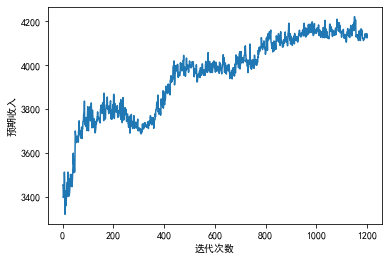

变异系数: 0.328452


In [465]:
import numpy as np
import random
import matplotlib.pyplot as plt


def get_rand():
    select = [x for x in range(10)]
    random.shuffle(select)
    return select


# time = np.array([[82, 16, 66, 71, 44, 28, 76, 85, 36, 8],
#                  [91, 98, 4, 4, 39, 68, 26, 26, 84, 6],
#                  [13, 96, 85, 28, 77, 66, 51, 82, 59, 54],
#                  [92, 49, 94, 5, 80, 17, 70, 25, 55, 78],
#                  [64, 81, 68, 10, 19, 12, 90, 93, 92, 94],
#                  [10, 15, 76, 83, 49, 50, 96, 35, 29, 13],
#                  [28, 43, 75, 70, 45, 96, 55, 20, 76, 57],
#                  [55, 92, 40, 32, 65, 35, 14, 26, 76, 47],
#                  [96, 80, 66, 96, 71, 59, 15, 62, 39, 2],
#                  [97, 96, 18, 4, 76, 23, 26, 48, 57, 34]])
'''种群数量'''
magnit = 100
'''公司数量'''
pop = len(risk)
'''初始化群体'''
# print(pop) pop=10
rang = np.zeros((magnit, pop), float)
rang1 = np.zeros((magnit, pop), float)
# print(rang)
# print(type(rang[1][1]))

##################################################################################################################
### 随机分配形成祖先群落

#### 生成贷款利率祖先群落
for i in range(magnit):
    select = []
    for j in range(pop):
        select.append(random.uniform(0.04, 0.08))
    rang[i, :] = select

#### 生成贷款额度祖先群落
for i in range(magnit):
    select = []
    for j in range(pop):
        select.append(random.uniform(10, 100))
    rang1[i, :] = select
# print(rang1.shape)
# print(rang1)
#####################################################################################################################
# ### 计算
# def cal_time(rang, time, pop):
#     sum_time_pop = []
#     for choice in rang:
#         single_array_sum_time = 0
#         for i in range(pop):
#             cut = choice[i]
#             single_array_sum_time += time[cut][i]
#         sum_time_pop.append(single_array_sum_time)
#     sum_time_pop = np.array(sum_time_pop).reshape(-1, 1)
#     num = sum_time_pop.shape[0]
#     return sum_time_pop, num

# def cal_money(rang, risk, pop):
#     sum_riskmoney_pop = []
#     for num, choice in enumerate(rang):
#         single_array_sum_money = 0  # 某行贷款额度策略、某行贷款利率策略下预计利率
#         for i in range(pop):
#             lend_rate = choice[i]  # 对第一家公司借款利率
#             lend_money = rang1[num][i] # 对第一家公司借款额度
#             single_array_sum_money += (lend_rate+1)*lend_money*(1-2*risk[i])
#         sum_riskmoney_pop.append(single_array_sum_money)
#     sum_riskmoney_pop = np.array(sum_riskmoney_pop).reshape(-1, 1)
#     num = sum_riskmoney_pop.shape[0]
#     return sum_riskmoney_pop, num   # 输出对98个公司匹配的每一组额度、利率下的预期利润

# a = cal_money(rang, risk, pop)
# a[0]

# print(rang)
# len(rang[1])
# print(risk)
# print(pop)
############################################################################################################################

count = 0
bestpop = []
while count < 1200:  ##迭代次数

    #     '''计算每一种分配的总时间'''
    #     sum_time_pop = []
    #     for choice in rang:
    #         single_array_sum_time = 0
    #         for i in range(pop):
    #             cut = choice[i]
    #             single_array_sum_time += time[cut][i]
    #         sum_time_pop.append(single_array_sum_time)
    #     sum_time_pop = np.array(sum_time_pop).reshape(-1, 1)
    #     num = sum_time_pop.shape[0]
    #     # print(sum_time_pop)

    sum_riskmoney_pop = []
    for num, choice in enumerate(rang):
        single_array_sum_money = 0  # 某行贷款额度策略、某行贷款利率策略下预计利率
        for i in range(pop):
            lend_rate = choice[i]  # 对第一家公司借款利率
            lend_money = rang1[num][i] # 对第一家公司借款额度
            single_array_sum_money += (lend_rate+1)*lend_money*(1-2*risk[i])
        sum_riskmoney_pop.append(single_array_sum_money)
    sum_riskmoney_pop = np.array(sum_riskmoney_pop).reshape(-1, 1)
    num = sum_riskmoney_pop.shape[0]

    #     '''排序'''
    #     index = np.argsort(sum_time_pop, 0)  ### 返回从小到大排序的索引值
    #     sum_time_pop = sum_time_pop[index].reshape(num, 1)[0:magnit, :]
    #     rang = rang[index].reshape(num, pop)[0:magnit, :]

    '''排序'''
    index = np.argsort(sum_riskmoney_pop, 0)  ### 返回从小到大排序的索引值
    sum_riskmoney_pop = sum_riskmoney_pop[index].reshape(num, 1)[0:magnit, :]
    rang = rang[index].reshape(num, pop)[0:magnit, :]
    rang1 = rang1[index].reshape(num, pop)[0:magnit, :]
    
    prechoose_rate = rang.copy()
    prechoose_money = rang1.copy()
    
#  x   risk = risk[index].reshape(num, pop)[0:magnit, :]
#     print(sum_riskmoney_pop)
#     break
#     rang
    # len(rang[1])
    # print(rang)
    # print(len(rang[0]))
    # print(len(rang))
    # print(pop)
    ########################################################################################################
    #     '''计算适值和适应度'''
    #     fit = sum_riskmoney_pop[:]  # 适值
    #     fitplus = np.cumsum(fit).reshape(-1, 1)  # 适值向下叠加
    #     # print(fitplus[magnit-1, :])
    #     fitlevelplus = fitplus[:] / fitplus[magnit - 1, :]  # 适应度向下叠加
    #     fitlevelplus = np.insert(fitlevelplus, 0, np.array([0]), 0)  # 在第一行添加0
    #     # print(fitlevelplus)
    #     # a = (np.shape(fitlevelplus))[0]

    '''计算适值和适应度'''
    fit = sum_riskmoney_pop[:]  # 适值
    fitplus = np.cumsum(fit).reshape(-1, 1)  # 适值向下叠加
    # print(fitplus[magnit-1, :])
    fitlevelplus = fitplus[:] / fitplus[magnit - 1, :]  # 适应度向下叠加
    fitlevelplus = np.insert(fitlevelplus, 0, np.array([0]), 0)  # 在第一行添加0
    # print(fitlevelplus)
    # a = (np.shape(fitlevelplus))[0]

    ###########################################################################################################
    #     '''选择'''
    #     newchoose = []
    #     new_sum_time = []
    #     for _ in range(magnit):
    #         rand = random.random()
    #         for row in range(magnit):
    #             if rand > fitlevelplus[row, :] and rand < fitlevelplus[row + 1, :]:
    #                 newchoose.append(rang[row, :])
    #                 new_sum_time.append(sum_time_pop[row, :])
    #                 continue
    #     newchoose = np.array(newchoose)
    #     prechoose = newchoose.copy()
    #     new_sum_time = np.array(new_sum_time)
    #     # print(newchoose)
    #     # print((np.shape(newchoose))[0])
    #     # print(new_sum_time)

    '''选择'''
    newchoose_rate = []
    newchoose_money = []
    new_sum_money = []
    for _ in range(magnit):
        rand = random.random()
        for row in range(magnit):
            if rand > fitlevelplus[row, :] and rand < fitlevelplus[row + 1, :]:
                newchoose_rate.append(rang[row, :])
                newchoose_money.append(rang1[row, :])
                new_sum_money.append(sum_riskmoney_pop[row, :])
                continue

#     for _ in range(magnit):
#             row = random.randint(50, 99)
#             newchoose_rate.append(rang[row, :])
#             newchoose_money.append(rang1[row, :])
#             new_sum_money.append(sum_riskmoney_pop[row, :])
#             continue

        
    newchoose_rate = np.array(newchoose_rate)
    newchoose_money = np.array(newchoose_money)

    prechoose_rate1 = newchoose_rate.copy()
    prechoose_money1 = newchoose_money.copy() ## 选择后性状良好的个体
    new_sum_money = np.array(new_sum_money)
    # print(newchoose)
    # print((np.shape(newchoose))[0])
    # print(new_sum_time)

    ##################################################################################################################

    #     '''交叉'''
    #     pc = 0.8
    #     for row in range(0, (np.shape(newchoose))[0], 2):
    #         if pc > random.random():
    #             gen_1 = newchoose[row, :].copy()
    #             gen_2 = newchoose[row + 1, :].copy()
    #             select = [x for x in range(10)]
    #             random.shuffle(select)
    #             r1 = select[0]
    #             r2 = select[1]
    #             r1, r2 = min(r1, r2), max(r1, r2)
    #             cr1, cr2 = gen_1[r1:r2 + 1].copy(), gen_2[r1:r2 + 1].copy()
    #             # print(r1, r2, cr1, cr2)
    #             for site in range(r2 - r1 + 1):
    #                 s1 = np.where(gen_1 == cr2[site])
    #                 gen_1[s1] = (gen_1[r1:r2 + 1])[site].copy()
    #                 a = gen_1
    #             for site in range(r2 - r1 + 1):
    #                 s2 = np.where(gen_2 == cr1[site])
    #                 gen_2[s2] = (gen_2[r1:r2 + 1])[site].copy()
    #                 b = gen_2
    #             gen_1[r1:r2 + 1] = cr2.copy()
    #             gen_2[r1:r2 + 1] = cr1.copy()
    #             newchoose[row, :] = gen_1.copy()
    #             newchoose[row + 1, :] = gen_2.copy()
    #################################################################################################################

    '''交叉'''
    pc = 0.9
    for row in range(0, (np.shape(newchoose_rate))[0], 2):
        if pc > random.random():
            gen_1 = newchoose_rate[row, :].copy()  # copy 第row行的分配方案（对各企业的贷款利率决策）
            gen_2 = newchoose_rate[row + 1, :].copy()  # copy 第row+1行的分配方案（对各企业的贷款利率决策）
            select = [x for x in range(98)] # 对几个公司进行分配
            random.shuffle(select)  ## 形成一个新的决策
            r1 = select[0]
            r2 = select[1]
            r1, r2 = min(r1, r2), max(r1, r2) ## 使得r1为r1、r2中小的那一个
            cr1, cr2 = gen_1[r1:r2 + 1].copy(), gen_2[r1:r2 + 1].copy()
            # print(r1, r2, cr1, cr2)
            gen_1[r1:r2 + 1] = cr2.copy()
            gen_2[r1:r2 + 1] = cr1.copy()
            newchoose_rate[row, :] = gen_1.copy()
            newchoose_rate[row + 1, :] = gen_2.copy()

            gen_1 = newchoose_money[row, :].copy()  # copy 第row行的分配方案（对各企业的贷款决策）
            gen_2 = newchoose_money[row + 1, :].copy()  # copy 第row+1行的分配方案（对各企业的贷款决策）
            select = [x for x in range(98)] # 对几个公司进行分配
            random.shuffle(select)  ## 形成一个新的决策
            r1 = select[0]
            r2 = select[1]
            r1, r2 = min(r1, r2), max(r1, r2) ## 使得r1为r1、r2中小的那一个
            cr1, cr2 = gen_1[r1:r2 + 1].copy(), gen_2[r1:r2 + 1].copy()
            # print(r1, r2, cr1, cr2)
            gen_1[r1:r2 + 1] = cr2.copy()
            gen_2[r1:r2 + 1] = cr1.copy()
            newchoose_money[row, :] = gen_1.copy()
            newchoose_money[row + 1, :] = gen_2.copy()

    ########################################################################################################################

    #     '''变异'''
    #     pm = 0.1
    #     for row in range(0, (np.shape(newchoose))[0]):
    #         if pm > random.random():
    #             select = [x for x in range(10)]
    #             random.shuffle(select)
    #             r1 = select[0]
    #             r2 = select[1]
    #             gen = newchoose[row, :]
    #             gen[r1], gen[r2] = gen[r2], gen[r1]
    #             newchoose[row, :] = gen.copy()
    #             # print(r1,r2,gen[r1],gen[r2])
    #     # print(newchoose,'--------')
    #     # print(prechoose)
    #     rang = np.append(prechoose, newchoose, 0)
    #     bestpop.append(sum_time_pop[0, :])
    #     count += 1
    #     # print(rang.shape)
    # bestpop = np.array(bestpop)
    # # print(bestpop)
    # print(sum_time_pop[0, :])
    # print(rang[0, :])

    '''变异'''
    pm = 0.05
    for row in range(0, (np.shape(newchoose_rate))[0]):
        if pm > random.random():
            select = [x for x in range(98)] ## 选一行变量进行变异
            random.shuffle(select)
            r1 = select[0]
            r2 = select[1]
            gen = newchoose_rate[row, :]  ## 提取一行分配方案(利率)
            gen[r1], gen[r2] = gen[r2], gen[r1]  ## 选一行分配方案中的两个交换位置
            newchoose_rate[row, :] = gen.copy()
            # print(r1,r2,gen[r1],gen[r2])

            select = [x for x in range(98)] ## 选一行变量进行变异
            random.shuffle(select)
            r1 = select[0]
            r2 = select[1]
            gen = newchoose_money[row, :]  ## 提取一行分配方案(金额)
            gen[r1], gen[r2] = gen[r2], gen[r1]  ## 选一行分配方案中的两个交换位置
            newchoose_money[row, :] = gen.copy()

    # print(newchoose,'--------')
    # print(prechoose)
    
    rang1 = newchoose_money
    rang =  newchoose_rate
    
#     rang = np.append(prechoose_rate1[47:98], newchoose_rate[0:49], 0)
#     print(len(rang))
#     rang1 = np.append(prechoose_money1[47:98], newchoose_money[0:49], 0)
#     rang = np.append(prechoose_rate, newchoose_rate, 0)
#     rang1 = np.append(prechoose_money, newchoose_money, 0)
    bestpop.append(sum_riskmoney_pop[-1, :])
    count += 1
    
# print(rang.shape)
bestpop = np.array(bestpop)
# print(bestpop)
# print(sum_riskmoney_pop[0, :])

print(sum_riskmoney_pop[-1, :])
print(rang[0, :])
print(rang1[0, :])
# print('变异系数'+std([1, 2, 3]))

############################################################################################################################

x = [a for a in range(1,1201)]
y = bestpop
plt.plot(x,y)
plt.xlabel('迭代次数')
plt.ylabel('预期收入')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

print('变异系数: %f' %(np.std(rang1)/np.mean(rang1)))


In [474]:
len(prechoose_rate1[47:98])
len(prechoose_rate1[0:49])
bestpop[-1]

array([4138.34771388])

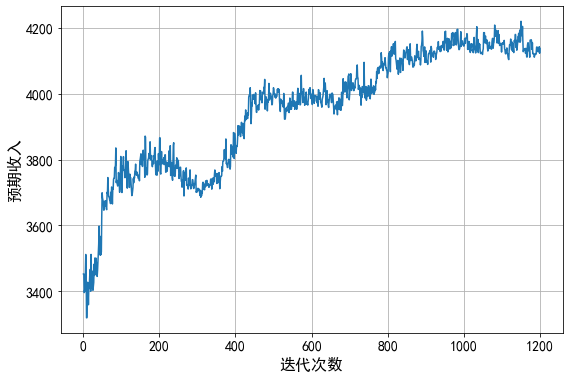

In [468]:
fig, ax = plt.subplots(figsize=(9, 6))
x = [a for a in range(1,1201)]
y = bestpop
plt.plot(x,y)
plt.xlabel('迭代次数', size = 16)
plt.ylabel('预期收入', size = 16)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xticks(size = 14)
plt.yticks(size = 14)

ax.grid(True)
plt.savefig(r"D:\c_\大三下\建模——水\bighmk\gene.jpg")
plt.show()

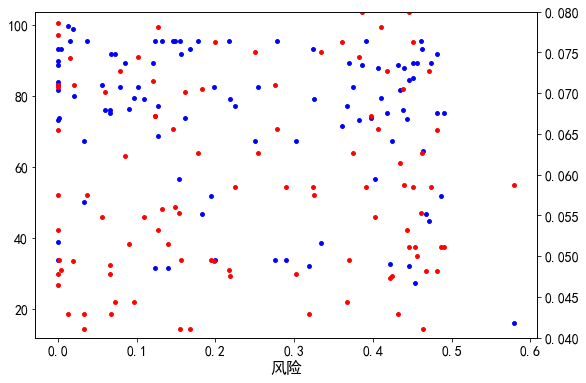

In [458]:

fig, ax = plt.subplots(figsize=(9, 6))

# ax.scatter(prechoose_rate[-1, :], prechoose_money[-1, :], s=15, c='gray', label = 'A') 
ax.scatter(risk, prechoose_money[-1, :], s=15, c='blue', label = 'A') 

# ax.scatter(rang[0, :], rang1[0, :], s=15, c='gray', label = 'A') 


plt.xlabel('风险', size = 16)
plt.ylabel('', size = 16)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xticks(size = 14)
plt.yticks(size = 14)

ax2 = ax.twinx() # 共享x轴
ax2.scatter(risk, prechoose_rate[-1, :], s=15, c='red') 
ax2.set_ylim(0.04, 0.08) # 设置第2个y轴的范围
plt.xticks(size = 14)
plt.yticks(size = 14)

# ax.grid(axis = 'x')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# plt.savefig(r"D:\c_\大三下\建模——水\bighmk\gene.jpg")
plt.show()




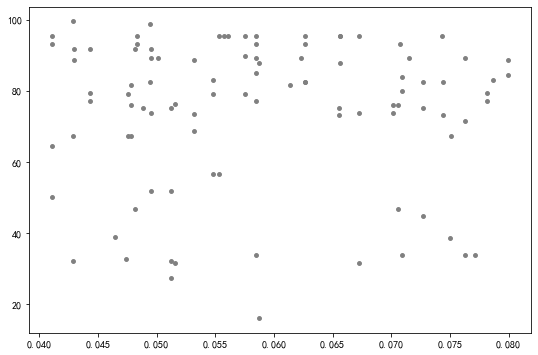

In [459]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(prechoose_rate[-1, :], prechoose_money[-1, :], s=15, c='gray', label = 'A') 
plt.show()

In [442]:
prechoose_rate[-1, :]
# len(rang)

array([0.06828193, 0.07145805, 0.04191916, 0.06003766, 0.06745314,
       0.05690049, 0.05686619, 0.05307267, 0.07639556, 0.0620804 ,
       0.04866958, 0.05085501, 0.0471445 , 0.07639556, 0.05458766,
       0.07152539, 0.07582969, 0.05458766, 0.0620804 , 0.06999355,
       0.07078325, 0.07639556, 0.06828193, 0.0620804 , 0.06828193,
       0.06745314, 0.04827967, 0.06828193, 0.06739151, 0.05379482,
       0.07500647, 0.04622969, 0.06999355, 0.05178732, 0.06003766,
       0.05307267, 0.0579175 , 0.06003766, 0.06999355, 0.07078325,
       0.04994867, 0.04543157, 0.0599166 , 0.0795875 , 0.05698166,
       0.05861732, 0.06455146, 0.05291161, 0.04866958, 0.06716034,
       0.05698166, 0.05379482, 0.05686619, 0.05085501, 0.06999355,
       0.05861732, 0.04854593, 0.07145805, 0.0747222 , 0.05673925,
       0.0471445 , 0.05379482, 0.06745314, 0.07639556, 0.04994867,
       0.07152539, 0.07639556, 0.05673925, 0.06999355, 0.0795875 ,
       0.05673925, 0.05861732, 0.04866958, 0.06999355, 0.04647

In [441]:
prechoose_money[-1, :]

array([49.93038264, 87.87957445, 75.94130795, 75.36127736, 75.94130795,
       99.4381922 , 56.16047993, 95.05557099, 77.29219251, 95.05557099,
       97.9926091 , 75.94130795, 93.62117887, 97.9926091 , 97.9926091 ,
       99.4381922 , 99.05738552, 99.4381922 , 98.53549886, 87.87957445,
       75.94130795, 82.9546669 , 58.07018809, 99.4381922 , 99.09627667,
       87.87957445, 73.30311589, 97.9926091 , 75.71492287, 95.05557099,
       72.11030939, 77.36783123, 75.94130795, 97.9926091 , 92.28947495,
       82.9546669 , 99.4381922 , 99.05738552, 95.05557099, 87.87957445,
       87.87957445, 82.9546669 , 75.71492287, 97.9926091 , 75.94130795,
       87.87957445, 75.71492287, 56.16047993, 95.05557099, 77.36783123,
       99.09627667, 93.62117887, 97.9926091 , 95.05557099, 77.36783123,
       58.07018809, 75.71492287, 23.2176507 , 82.9546669 , 88.60734898,
       11.71858257, 99.4381922 , 61.65628586, 99.4381922 , 75.71492287,
       99.05738552, 77.36783123, 75.94130795, 99.4381922 , 73.30

In [394]:
fig, ax = plt.subplots(figsize=(9, 6))
x = [a for a in range(1,1101)]
y = bestpop
plt.plot(x,y)
plt.xlabel('迭代次数', size = 16)
plt.ylabel('预期收入', size = 16)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xticks(size = 14)
plt.yticks(size = 14)

ax.grid(True)
plt.savefig(r"D:\c_\大三下\建模——水\bighmk\gene.jpg")
plt.show()

array([1.70161571e-04, 1.32385260e-07, 3.22551533e-08, 2.16763598e-01,
       1.58053256e-02, 4.45576327e-01, 2.73478712e-05, 7.01011751e-07,
       6.64486647e-07, 1.46026844e-01, 1.26379560e-02, 1.82540633e-01,
       3.27848027e-02, 1.95723641e-02, 1.25061773e-04, 1.78020299e-01,
       3.98207452e-01, 4.10539239e-01, 2.11177879e-04, 3.65231752e-02,
       3.64504545e-03, 3.17102878e-04, 1.71601188e-03, 2.77996359e-01,
       8.48923429e-02, 1.26699030e-01, 5.98074020e-02, 6.59752372e-02,
       2.10359003e-02, 1.01953978e-01, 7.25112997e-02, 3.30966468e-02,
       6.76566417e-02, 1.40425611e-01, 9.63247971e-02, 6.61420873e-02,
       2.18003068e-01, 1.48668155e-01, 1.56375182e-01, 1.32814608e-01,
       1.68381674e-01, 1.94313306e-01, 1.23821938e-01, 5.59176303e-02,
       1.26826402e-01, 3.69837680e-01, 1.09555595e-01, 1.61600912e-01,
       1.97743261e-01, 1.21061866e-01, 1.98949453e-01, 1.23533173e-01,
       1.55272537e-01, 9.03877305e-02, 1.54379381e-01, 2.24876647e-01,
      

In [473]:
res = lend_company1
res['贷款额度'] = prechoose_money[-1, :]
res['贷款利率'] = prechoose_rate[-1, :]

res.to_excel(r'D:\c_\大三下\建模——水\bighmk\决策.xlsx')
res

,评级,proba,贷款额度,贷款利率
企业代号,,,,
E1,4,1.701616e-04,91.991190,0.075707
E2,4,1.323853e-07,87.034605,0.060708
E3,2,3.225515e-08,91.959097,0.056408
E4,2,2.167636e-01,92.468030,0.048233
E5,3,1.580533e-02,86.843427,0.068145
...,...,...,...,...
E98,3,4.619318e-01,53.215946,0.071948
E104,2,4.533271e-01,54.639377,0.078974
E105,2,4.734014e-01,24.563617,0.076271


In [365]:
rang

array([[0.07428053, 0.07269507, 0.07269507, ..., 0.04329052, 0.04021346,
        0.07269507],
       [0.07428053, 0.07269507, 0.07269507, ..., 0.04329052, 0.04021346,
        0.07269507],
       [0.07428053, 0.0797208 , 0.07269507, ..., 0.04329052, 0.04021346,
        0.07269507],
       ...,
       [0.07428053, 0.07269507, 0.04833489, ..., 0.04329052, 0.07999734,
        0.0421689 ],
       [0.07428053, 0.07269507, 0.04833489, ..., 0.04329052, 0.04021346,
        0.07269507],
       [0.07428053, 0.07269507, 0.04833489, ..., 0.04329052, 0.04021346,
        0.07269507]])

# 问题2

In [62]:
data2_buy = pd.read_excel("附件2：302家无信贷记录企业的相关数据.xlsx", sheet_name = '进项发票信息')
data2_sell = pd.read_excel("附件2：302家无信贷记录企业的相关数据.xlsx", sheet_name = '销项发票信息')

In [63]:
data2_buy

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E124,18891676,2017-09-01 00:00:00,C00014,338.46,57.54,396.0,有效发票
1,E124,18691267,2017-09-01 00:00:00,C00480,230.10,6.90,237.0,有效发票
2,E124,12995412,2017-09-01 00:00:00,C23675,223.30,6.70,230.0,有效发票
3,E124,6378193,2017-09-01 11:11:03,C00333,90090.09,9909.91,100000.0,有效发票
4,E124,6378194,2017-09-01 11:12:01,C00333,90090.09,9909.91,100000.0,有效发票
...,...,...,...,...,...,...,...,...
395170,E425,72101375,2019-12-30 00:00:00,C23112,663.11,19.89,683.0,有效发票
395171,E425,20253285,2020-01-05 00:00:00,C01937,45.41,4.09,49.5,有效发票
395172,E425,20253315,2020-01-05 00:00:00,C01937,110.14,1.16,111.3,有效发票
395173,E425,52449404,2020-01-06 00:00:00,C15032,73.22,6.58,79.8,有效发票


In [64]:
data2_sell

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E124,15212483,2017-09-01 11:58:43,D00585,839350.55,92328.56,931679.11,有效发票
1,E124,15212484,2017-09-01 11:59:20,D00585,900900.90,99099.10,1000000.00,有效发票
2,E124,15212485,2017-09-01 11:59:51,D00585,900900.90,99099.10,1000000.00,有效发票
3,E124,15212486,2017-09-01 12:00:45,D00585,697365.74,76710.23,774075.97,有效发票
4,E124,6089615,2017-09-05 10:58:38,D00108,726216.22,79883.78,806100.00,有效发票
...,...,...,...,...,...,...,...,...
330830,E425,21803468,2018-04-03 00:00:00,D21446,9000.00,270.00,9270.00,有效发票
330831,E425,21803469,2018-04-03 00:00:00,D21446,5155.34,154.66,5310.00,有效发票
330832,E425,21803470,2019-06-11 00:00:00,D02126,4854.37,145.63,5000.00,作废发票
330833,E425,21803471,2019-06-11 00:00:00,D02126,4854.37,145.63,5000.00,作废发票


In [324]:
## 删除重复发票
data2_buy_merge = pd.merge(data2_buy, data2_buy.value_counts('发票号码').reset_index(), on = '发票号码')
data2_buy_merge_drop = data2_buy_merge[data2_buy_merge[0]==1]
data2_buy_merge_drop

# data2_sell_merge = pd.merge(data2_sell, data2_sell.value_counts('发票号码').reset_index(), on = '发票号码')
# data2_sell_merge_drop = data2_sell_merge[data2_sell_merge[0]==1]
# data2_sell_merge_drop

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态,0
34,E124,10300327,2017-09-04 15:27:54,C01377,80668.82,13713.70,94382.52,有效发票,1
67,E124,27284045,2017-09-06 14:23:30,C01253,382.91,65.09,448.00,有效发票,1
176,E124,1500333,2017-09-11 17:54:01,C00254,3759.83,639.17,4399.00,有效发票,1
213,E124,33165877,2017-09-12 13:46:28,C00725,1718.62,292.16,2010.78,有效发票,1
308,E124,4094712,2017-09-16 09:23:11,C01034,18085.47,3074.53,21160.00,作废发票,1
...,...,...,...,...,...,...,...,...,...
395170,E425,72101375,2019-12-30 00:00:00,C23112,663.11,19.89,683.00,有效发票,1
395171,E425,20253285,2020-01-05 00:00:00,C01937,45.41,4.09,49.50,有效发票,1
395172,E425,20253315,2020-01-05 00:00:00,C01937,110.14,1.16,111.30,有效发票,1
395173,E425,52449404,2020-01-06 00:00:00,C15032,73.22,6.58,79.80,有效发票,1


In [66]:
## 删除异常值
# 提取有效/正值发票数据再作异常值检验——进项
data2_buy_merge_drop1 = data2_buy_merge_drop[(data2_buy_merge_drop['发票状态'] =='有效发票')& (data2_buy_merge_drop['价税合计'] >= 0)]
data2_buy_merge_drop1
mean1 = data2_buy_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data2_buy_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data2_buy_merge_drop_outlier = data2_buy_merge_drop1[(data2_buy_merge_drop1['价税合计']<=topnum2) & (data2_buy_merge_drop1['价税合计']>=bottomnum2)]
data2_buy_merge_drop_outlier



,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态,0
67,E124,27284045,2017-09-06 14:23:30,C01253,382.91,65.09,448.00,有效发票,1
176,E124,1500333,2017-09-11 17:54:01,C00254,3759.83,639.17,4399.00,有效发票,1
213,E124,33165877,2017-09-12 13:46:28,C00725,1718.62,292.16,2010.78,有效发票,1
781,E124,8508380,2017-10-15 17:03:15,C00775,5127.35,871.65,5999.00,有效发票,1
866,E124,12912240,2017-10-17 13:49:27,C00725,1795.95,305.31,2101.26,有效发票,1
...,...,...,...,...,...,...,...,...,...
395170,E425,72101375,2019-12-30 00:00:00,C23112,663.11,19.89,683.00,有效发票,1
395171,E425,20253285,2020-01-05 00:00:00,C01937,45.41,4.09,49.50,有效发票,1
395172,E425,20253315,2020-01-05 00:00:00,C01937,110.14,1.16,111.30,有效发票,1
395173,E425,52449404,2020-01-06 00:00:00,C15032,73.22,6.58,79.80,有效发票,1


In [67]:
# 提取有效/正值发票数据再作异常值检验——销项
data2_sell_merge_drop1 = data2_sell_merge_drop[(data2_sell_merge_drop['发票状态'] =='有效发票')& (data2_sell_merge_drop['价税合计'] >= 0)]
data2_sell_merge_drop1
mean1 = data2_sell_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data2_sell_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data2_sell_merge_drop_outlier = data2_sell_merge_drop1[(data2_sell_merge_drop1['价税合计']<=topnum2) & (data2_sell_merge_drop1['价税合计']>=bottomnum2)]
data2_sell_merge_drop_outlier

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,0
2611,E125,6518259,2017-01-16,D15442,90082.62,2702.48,92785.10,有效发票,1
2630,E125,5436209,2017-01-18,D12475,87031.89,2610.96,89642.85,有效发票,1
2638,E125,2643824,2017-01-20,D15109,69237.18,7616.09,76853.27,有效发票,1
2664,E125,2643838,2017-05-12,D15442,39336.37,4327.00,43663.37,有效发票,1
2667,E125,5436225,2017-05-24,D17956,67961.17,2038.83,70000.00,有效发票,1
...,...,...,...,...,...,...,...,...,...
330828,E425,21803466,2018-04-03,D21446,9000.00,270.00,9270.00,有效发票,1
330829,E425,21803467,2018-04-03,D21446,9000.00,270.00,9270.00,有效发票,1
330830,E425,21803468,2018-04-03,D21446,9000.00,270.00,9270.00,有效发票,1
330831,E425,21803469,2018-04-03,D21446,5155.34,154.66,5310.00,有效发票,1


In [ ]:
data2_sell_merge_drop_outlier
data2_buy_merge_drop_outlier

In [68]:
data2_buy_merge_drop_rest = data2_buy_merge_drop[(data2_buy_merge_drop['发票状态'] == '作废发票') | (data2_buy_merge_drop['价税合计'] <0)]#作废发票+负数发票数据
data2_buy_new = pd.concat([data2_buy_merge_drop_outlier, data2_buy_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data2_buy_new

data2_sell_merge_drop_rest = data2_sell_merge_drop[(data2_sell_merge_drop['发票状态'] == '作废发票') | (data2_sell_merge_drop['价税合计'] <0)]#作废发票+负数发票数据
data2_sell_new = pd.concat([data2_sell_merge_drop_outlier, data2_sell_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data2_sell_new

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,0
2611,E125,6518259,2017-01-16,D15442,90082.62,2702.48,92785.10,有效发票,1
2630,E125,5436209,2017-01-18,D12475,87031.89,2610.96,89642.85,有效发票,1
2638,E125,2643824,2017-01-20,D15109,69237.18,7616.09,76853.27,有效发票,1
2664,E125,2643838,2017-05-12,D15442,39336.37,4327.00,43663.37,有效发票,1
2667,E125,5436225,2017-05-24,D17956,67961.17,2038.83,70000.00,有效发票,1
...,...,...,...,...,...,...,...,...,...
330820,E425,21803458,2018-03-20,D21446,9623.30,288.70,9912.00,作废发票,1
330821,E425,21803459,2018-03-20,D21446,9623.30,288.70,9912.00,作废发票,1
330822,E425,21803460,2018-03-20,D21446,9623.30,288.70,9912.00,作废发票,1
330832,E425,21803470,2019-06-11,D02126,4854.37,145.63,5000.00,作废发票,1


In [69]:
## 作废发票总数
def count_values(x):
    count = 0
    for i in x:
        if i =="作废发票":
            count = count+1
    return count

add1 = data2_buy_new.groupby("企业代号", as_index=False).agg({"发票状态":count_values})
add1.columns = ['企业代号', '进项作废发票数']
add1_2 = data2_buy_merge_drop_outlier.groupby("企业代号").agg({'价税合计':'sum', '税额':'sum', "企业代号":'count'})
add1_2.columns = ['进项价税合计', '进项缴税', '进项交易数']
add1_2 = add1_2.reset_index()

add_buy = pd.merge(add1, add1_2, on = '企业代号')
add_buy
# add1_2
# data2_buy_new

,企业代号,进项作废发票数,进项价税合计,进项缴税,进项交易数
0,E124,44,787861.03,69259.92,149
1,E125,352,6044915.50,523169.37,1282
2,E126,17,899494.44,59883.88,179
3,E127,26,1124376.59,66331.01,1412
4,E128,88,4024301.30,213972.89,3029
...,...,...,...,...,...
296,E421,0,32170.00,1776.19,19
297,E422,0,960.00,70.61,3
298,E423,0,79131.70,9470.18,20
299,E424,0,135052.94,7580.69,22


In [70]:
add1 = data2_sell_new.groupby("企业代号", as_index=False).agg({"发票状态":count_values})
add1.columns = ['企业代号', '销项作废发票数']
add1_2 = data2_sell_merge_drop_outlier.groupby("企业代号").agg({'价税合计':'sum', '税额':'sum', "企业代号":'count'})
add1_2.columns = ['销项项价税合计', '销项缴税', '销项交易数']
add1_2 = add1_2.reset_index()

add_sell = pd.merge(add1, add1_2, on = '企业代号')
add_sell

,企业代号,销项作废发票数,销项项价税合计,销项缴税,销项交易数
0,E125,20,3.503731e+06,283657.54,29
1,E126,242,4.507141e+07,1585190.73,525
2,E127,122,3.404197e+08,9926868.54,3416
3,E128,94,9.366534e+07,3550624.14,960
4,E129,626,3.739136e+08,49444604.76,4991
...,...,...,...,...,...
291,E421,1,2.530718e+05,7371.07,28
292,E422,3,2.785661e+04,838.30,27
293,E423,1,7.497000e+04,2183.60,6
294,E424,6,8.045359e+04,2343.29,35


In [78]:
sum_sell_buy = pd.merge(add_buy, add_sell, on = '企业代号')
sum_sell_buy['利润'] = sum_sell_buy['销项项价税合计']-sum_sell_buy['进项价税合计']
sum_sell_buy

,企业代号,进项作废发票数,进项价税合计,进项缴税,进项交易数,销项作废发票数,销项项价税合计,销项缴税,销项交易数,利润
0,E125,352,6044915.50,523169.37,1282,20,3.503731e+06,283657.54,29,-2.541184e+06
1,E126,17,899494.44,59883.88,179,242,4.507141e+07,1585190.73,525,4.417192e+07
2,E127,26,1124376.59,66331.01,1412,122,3.404197e+08,9926868.54,3416,3.392953e+08
3,E128,88,4024301.30,213972.89,3029,94,9.366534e+07,3550624.14,960,8.964104e+07
4,E129,390,10749303.70,918796.14,5249,626,3.739136e+08,49444604.76,4991,3.631643e+08
...,...,...,...,...,...,...,...,...,...,...
291,E421,0,32170.00,1776.19,19,1,2.530718e+05,7371.07,28,2.209018e+05
292,E422,0,960.00,70.61,3,3,2.785661e+04,838.30,27,2.689661e+04
293,E423,0,79131.70,9470.18,20,1,7.497000e+04,2183.60,6,-4.161700e+03
294,E424,0,135052.94,7580.69,22,6,8.045359e+04,2343.29,35,-5.459935e+04


In [330]:
data2_buy = pd.read_excel("附件1：123家有信贷记录企业的相关数据.xlsx", sheet_name = "进项发票信息")
data2_sell = pd.read_excel("附件1：123家有信贷记录企业的相关数据.xlsx", sheet_name = "销项发票信息")

data2_buy_merge = pd.merge(data2_buy, data2_buy.value_counts('发票号码').reset_index(), on = '发票号码')
data2_buy_merge_drop = data2_buy_merge[data2_buy_merge[0]==1]
data2_buy_merge_drop

data2_sell_merge = pd.merge(data2_sell, data2_sell.value_counts('发票号码').reset_index(), on = '发票号码')
data2_sell_merge_drop = data2_sell_merge[data2_sell_merge[0]==1]
data2_sell_merge_drop

data2_buy_merge_drop1 = data2_buy_merge_drop[(data2_buy_merge_drop['发票状态'] =='有效发票')& (data2_buy_merge_drop['价税合计'] >= 0)]
data2_buy_merge_drop1
mean1 = data2_buy_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data2_buy_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data2_buy_merge_drop_outlier = data2_buy_merge_drop1[(data2_buy_merge_drop1['价税合计']<=topnum2) & (data2_buy_merge_drop1['价税合计']>=bottomnum2)]
data2_buy_merge_drop_outlier

data2_sell_merge_drop1 = data2_sell_merge_drop[(data2_sell_merge_drop['发票状态'] =='有效发票')& (data2_sell_merge_drop['价税合计'] >= 0)]
data2_sell_merge_drop1
mean1 = data2_sell_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data2_sell_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data2_sell_merge_drop_outlier = data2_sell_merge_drop1[(data2_sell_merge_drop1['价税合计']<=topnum2) & (data2_sell_merge_drop1['价税合计']>=bottomnum2)]
data2_sell_merge_drop_outlier

data2_buy_merge_drop_rest = data2_buy_merge_drop[(data2_buy_merge_drop['发票状态'] == '作废发票') | (data2_buy_merge_drop['价税合计'] <0)]#作废发票+负数发票数据
data2_buy_new = pd.concat([data2_buy_merge_drop_outlier, data2_buy_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data2_buy_new

data2_sell_merge_drop_rest = data2_sell_merge_drop[(data2_sell_merge_drop['发票状态'] == '作废发票') | (data2_sell_merge_drop['价税合计'] <0)]#作废发票+负数发票数据
data2_sell_new = pd.concat([data2_sell_merge_drop_outlier, data2_sell_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data2_sell_new

def count_values(x):
    count = 0
    for i in x:
        if i =="作废发票":
            count = count+1
    return count

add1 = data2_buy_new.groupby("企业代号", as_index=False).agg({"发票状态":count_values})
add1.columns = ['企业代号', '进项作废发票数']
add1_2 = data2_buy_merge_drop_outlier.groupby("企业代号").agg({'价税合计':['sum', 'std', 'median'], '税额':'sum', "企业代号":'count'})
add1_2.columns = ['进项价税合计', '进项价税合计标准差', '进项价税合计中位数', '进项缴税', '进项交易数']
add1_2 = add1_2.reset_index()

add_buy = pd.merge(add1, add1_2, on = '企业代号')
add_buy

add1 = data2_sell_new.groupby("企业代号", as_index=False).agg({"发票状态":count_values})
add1.columns = ['企业代号', '销项作废发票数']
add1_2 = data2_sell_merge_drop_outlier.groupby("企业代号").agg({'价税合计':['sum', 'std', 'median'] , '税额':'sum', "企业代号":'count'})
add1_2.columns = ['销项价税合计','销项价税合计标准差', '销项价税合计中位数', '销项缴税', '销项交易数']
add1_2 = add1_2.reset_index()

add_sell = pd.merge(add1, add1_2, on = '企业代号')
add_sell

sum_sell_buy1 = pd.merge(add_buy, add_sell, on = '企业代号')

train = pd.read_excel("附件1：123家有信贷记录企业的相关数据.xlsx", sheet_name = "企业信息")
sum_sell_buy1

,企业代号,进项作废发票数,进项价税合计,进项价税合计标准差,进项价税合计中位数,进项缴税,进项交易数,销项作废发票数,销项价税合计,销项价税合计标准差,销项价税合计中位数,销项缴税,销项交易数
0,E1,191,3593298.49,3338.235948,390.000,277319.45,2082,224,2.160112e+08,68363.605214,86960.00,28076022.69,2367
1,E10,232,4632471.73,2259.598690,375.000,226105.73,3792,52,1.410278e+07,63447.770983,158792.19,448184.45,96
2,E100,0,23323.02,580.382791,217.500,2254.22,58,1,8.199213e+05,12609.939159,7180.03,23881.23,83
3,E101,0,12693.00,2280.734913,243.000,1674.85,15,31,3.923780e+05,11205.873027,11074.00,51832.42,32
4,E102,20,2365688.99,5241.077974,920.000,304202.69,661,26,4.703337e+05,3992.279283,1107.25,62902.43,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,E95,0,1138.00,9.000000,280.000,64.42,4,49,2.380080e+06,3139.133819,1200.00,69323.19,864
118,E96,0,9043.96,1872.268733,325.000,924.49,10,2,1.481350e+06,25362.967864,93175.00,43146.11,18
119,E97,0,19880.00,1472.484673,3000.000,1125.30,9,9,1.012353e+06,3646.492125,2810.00,29486.06,251
120,E98,1,111279.98,3139.569416,933.600,7341.51,48,20,1.537773e+06,17298.481127,7000.00,42788.80,127


In [103]:
sum_sell_buy

,企业代号,进项作废发票数,进项价税合计,进项缴税,进项交易数,销项作废发票数,销项项价税合计,销项缴税,销项交易数,利润
0,E125,352,6044915.50,523169.37,1282,20,3.503731e+06,283657.54,29,-2.541184e+06
1,E126,17,899494.44,59883.88,179,242,4.507141e+07,1585190.73,525,4.417192e+07
2,E127,26,1124376.59,66331.01,1412,122,3.404197e+08,9926868.54,3416,3.392953e+08
3,E128,88,4024301.30,213972.89,3029,94,9.366534e+07,3550624.14,960,8.964104e+07
4,E129,390,10749303.70,918796.14,5249,626,3.739136e+08,49444604.76,4991,3.631643e+08
...,...,...,...,...,...,...,...,...,...,...
291,E421,0,32170.00,1776.19,19,1,2.530718e+05,7371.07,28,2.209018e+05
292,E422,0,960.00,70.61,3,3,2.785661e+04,838.30,27,2.689661e+04
293,E423,0,79131.70,9470.18,20,1,7.497000e+04,2183.60,6,-4.161700e+03
294,E424,0,135052.94,7580.69,22,6,8.045359e+04,2343.29,35,-5.459935e+04


In [121]:
ike = train_data.groupby("信誉评级").agg({ '作废发票率':'mean', '销项交易数':['mean', 'median']})
ike
# ike.to_excel(r'D:\c_\大三下\建模——水\bighmk\信誉评级.xlsx')

作废发票率        销项交易数        
          mean         mean  median
信誉评级                               
A     0.063696  2121.884615  1309.0
B     0.072303   545.210526   460.5
C     0.083258  1259.117647   247.0
D     0.148531   134.541667    38.5

In [331]:
def trans(x):
    if x=='A':
        return 4
    elif x=='B':
        return 3
    elif x=='C':
        return 2
    elif x=='D':
        return 1

train_data = pd.merge(train, sum_sell_buy1, on = '企业代号')
train_data['利润'] = train_data['销项价税合计']-train_data['进项价税合计']
train_data['评级'] = train_data['信誉评级'].apply(trans)
train_data['资金周转率'] = train_data['销项价税合计']/train_data['进项价税合计']
train_data['单均利润'] = train_data['利润']/train_data['销项交易数']
train_data['交易总数'] = train_data['销项交易数']+train_data['进项交易数']
train_data['作废发票率'] = (train_data['销项作废发票数']+train_data['进项作废发票数'])/(train_data['销项交易数']+train_data['进项交易数']+train_data['销项作废发票数']+train_data['进项作废发票数'])
train_data['税收占利润比例'] = (train_data['进项缴税']+train_data['销项缴税'])/train_data['利润']

train_data
# train_data.to_excel(r'D:\c_\大三下\建模——水\bighmk\训练集.xlsx',index = False)

ike = train_data.groupby("信誉评级").agg({ '作废发票率':'mean', '进项价税合计中位数':'mean', '销项价税合计中位数':'mean'})
ike

# ike.to_excel(r'D:\c_\大三下\建模——水\bighmk\信誉评级.xlsx')

,作废发票率,进项价税合计中位数,销项价税合计中位数
信誉评级,,,
A,0.063696,1616.295385,49017.596923
B,0.072303,1370.698684,57688.887500
C,0.083258,874.769559,51776.543971
D,0.148531,786.772083,20637.878542


In [333]:
train_data
train_data.to_excel(r"D:\c_\大三下\建模——水\bighmk\附件一特征.xlsx")

In [185]:
ike['标准化作废率'] = (ike['作废发票率']-min(ike['作废发票率']))/(max(ike['作废发票率'])-min(ike['作废发票率']))
ike['标准化进项价税合计中位数'] = (ike['进项价税合计中位数']-min(ike['进项价税合计中位数']))/(max(ike['进项价税合计中位数'])-min(ike['进项价税合计中位数']))
ike

,作废发票率,进项价税合计中位数,销项价税合计中位数,标准化作废率,标准化进项价税合计中位数
信誉评级,,,,,
A,0.063696,1616.295385,49017.596923,0.000000,1.000000
B,0.072303,1370.698684,57688.887500,0.101455,0.703930
C,0.083258,874.769559,51776.543971,0.230592,0.106082
D,0.148531,786.772083,20637.878542,1.000000,0.000000


In [321]:
ike

,作废发票率,进项价税合计中位数,销项价税合计中位数,标准化作废率,标准化进项价税合计中位数
信誉评级,,,,,
A,0.063696,1616.295385,49017.596923,0.000000,1.000000
B,0.072303,1370.698684,57688.887500,0.101455,0.703930
C,0.083258,874.769559,51776.543971,0.230592,0.106082
D,0.148531,786.772083,20637.878542,1.000000,0.000000


In [130]:
data2_buy = pd.read_excel("附件2：302家无信贷记录企业的相关数据.xlsx", sheet_name = '进项发票信息')
data2_sell = pd.read_excel("附件2：302家无信贷记录企业的相关数据.xlsx", sheet_name = '销项发票信息')

data2_buy_merge = pd.merge(data2_buy, data2_buy.value_counts('发票号码').reset_index(), on = '发票号码')
data2_buy_merge_drop = data2_buy_merge[data2_buy_merge[0]==1]
data2_buy_merge_drop

data2_sell_merge = pd.merge(data2_sell, data2_sell.value_counts('发票号码').reset_index(), on = '发票号码')
data2_sell_merge_drop = data2_sell_merge[data2_sell_merge[0]==1]
data2_sell_merge_drop

data2_buy_merge_drop1 = data2_buy_merge_drop[(data2_buy_merge_drop['发票状态'] =='有效发票')& (data2_buy_merge_drop['价税合计'] >= 0)]
data2_buy_merge_drop1
mean1 = data2_buy_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data2_buy_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data2_buy_merge_drop_outlier = data2_buy_merge_drop1[(data2_buy_merge_drop1['价税合计']<=topnum2) & (data2_buy_merge_drop1['价税合计']>=bottomnum2)]
data2_buy_merge_drop_outlier

data2_sell_merge_drop1 = data2_sell_merge_drop[(data2_sell_merge_drop['发票状态'] =='有效发票')& (data2_sell_merge_drop['价税合计'] >= 0)]
data2_sell_merge_drop1
mean1 = data2_sell_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data2_sell_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data2_sell_merge_drop_outlier = data2_sell_merge_drop1[(data2_sell_merge_drop1['价税合计']<=topnum2) & (data2_sell_merge_drop1['价税合计']>=bottomnum2)]
data2_sell_merge_drop_outlier

data2_buy_merge_drop_rest = data2_buy_merge_drop[(data2_buy_merge_drop['发票状态'] == '作废发票') | (data2_buy_merge_drop['价税合计'] <0)]#作废发票+负数发票数据
data2_buy_new = pd.concat([data2_buy_merge_drop_outlier, data2_buy_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data2_buy_new

data2_sell_merge_drop_rest = data2_sell_merge_drop[(data2_sell_merge_drop['发票状态'] == '作废发票') | (data2_sell_merge_drop['价税合计'] <0)]#作废发票+负数发票数据
data2_sell_new = pd.concat([data2_sell_merge_drop_outlier, data2_sell_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data2_sell_new

def count_values(x):
    count = 0
    for i in x:
        if i =="作废发票":
            count = count+1
    return count

add1 = data2_buy_new.groupby("企业代号", as_index=False).agg({"发票状态":count_values})
add1.columns = ['企业代号', '进项作废发票数']
add1_2 = data2_buy_merge_drop_outlier.groupby("企业代号").agg({'价税合计':['sum', 'std', 'median'], '税额':'sum', "企业代号":'count'})
add1_2.columns = ['进项价税合计', '进项价税合计标准差', '进项价税合计中位数', '进项缴税', '进项交易数']
add1_2 = add1_2.reset_index()

add_buy = pd.merge(add1, add1_2, on = '企业代号')
add_buy

add1 = data2_sell_new.groupby("企业代号", as_index=False).agg({"发票状态":count_values})
add1.columns = ['企业代号', '销项作废发票数']
add1_2 = data2_sell_merge_drop_outlier.groupby("企业代号").agg({'价税合计':['sum', 'std', 'median'] , '税额':'sum', "企业代号":'count'})
add1_2.columns = ['销项价税合计','销项价税合计标准差', '销项价税合计中位数', '销项缴税', '销项交易数']
add1_2 = add1_2.reset_index()

add_sell = pd.merge(add1, add1_2, on = '企业代号')
add_sell

sum_sell_buy2 = pd.merge(add_buy, add_sell, on = '企业代号')


sum_sell_buy2



,企业代号,进项作废发票数,进项价税合计,进项价税合计标准差,进项价税合计中位数,进项缴税,进项交易数,销项作废发票数,销项价税合计,销项价税合计标准差,销项价税合计中位数,销项缴税,销项交易数
0,E125,352,6044915.50,5677.092570,1150.00,523169.37,1282,20,3.503731e+06,79561.106287,92381.80,283657.54,29
1,E126,17,899494.44,6500.110993,1095.00,59883.88,179,242,4.507141e+07,67847.116509,67117.13,1585190.73,525
2,E127,26,1124376.59,1700.813517,310.00,66331.01,1412,122,3.404197e+08,15978.223991,102900.00,9926868.54,3416
3,E128,88,4024301.30,2993.891129,300.00,213972.89,3029,94,9.366534e+07,16671.611886,99990.00,3550624.14,960
4,E129,390,10749303.70,3990.938977,330.00,918796.14,5249,626,3.739136e+08,42464.069098,96930.00,49444604.76,4991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,E421,0,32170.00,1432.100449,1000.00,1776.19,19,1,2.530718e+05,1615.600066,10064.00,7371.07,28
292,E422,0,960.00,144.222051,280.00,70.61,3,3,2.785661e+04,1598.463732,497.00,838.30,27
293,E423,0,79131.70,4033.322845,1500.00,9470.18,20,1,7.497000e+04,10586.621274,8700.00,2183.60,6
294,E424,0,135052.94,7813.145861,1180.00,7580.69,22,6,8.045359e+04,3738.960973,306.00,2343.29,35


In [139]:
def trans(x):
    if x=='A':
        return 4
    elif x=='B':
        return 3
    elif x=='C':
        return 2
    elif x=='D':
        return 1

train_data = sum_sell_buy2
train_data['利润'] = train_data['销项价税合计']-train_data['进项价税合计']

train_data['资金周转率'] = train_data['销项价税合计']/train_data['进项价税合计']
train_data['单均利润'] = train_data['利润']/train_data['销项交易数']
train_data['交易总数'] = train_data['销项交易数']+train_data['进项交易数']
train_data['作废发票率'] = (train_data['销项作废发票数']+train_data['进项作废发票数'])/(train_data['销项交易数']+train_data['进项交易数']+train_data['销项作废发票数']+train_data['进项作废发票数'])
train_data['税收占利润比例'] = (train_data['进项缴税']+train_data['销项缴税'])/train_data['利润']

train_data
pre_data = train_data[["企业代号", "作废发票率", "进项价税合计中位数"]]
pre_data                    

,企业代号,作废发票率,进项价税合计中位数
0,E125,0.221034,1150.00
1,E126,0.268951,1095.00
2,E127,0.029743,310.00
3,E128,0.043635,300.00
4,E129,0.090263,330.00
...,...,...,...
291,E421,0.020833,1000.00
292,E422,0.090909,280.00
293,E423,0.037037,1500.00
294,E424,0.095238,1180.00


In [186]:
pre_data   
pre_data['标准化作废率'] = (pre_data['作废发票率']-min(pre_data['作废发票率']))/(max(pre_data['作废发票率'])-min(pre_data['作废发票率']))
pre_data['标准化进项价税合计中位数'] = (pre_data['进项价税合计中位数']-min(pre_data['进项价税合计中位数']))/(max(pre_data['进项价税合计中位数'])-min(pre_data['进项价税合计中位数']))
pre_data

,企业代号,作废发票率,进项价税合计中位数,res,标准化作废率,标准化进项价税合计中位数
0,E125,0.221034,1150.00,3,0.434938,0.085981
1,E126,0.268951,1095.00,2,0.529227,0.081583
2,E127,0.029743,310.00,1,0.058526,0.018803
3,E128,0.043635,300.00,1,0.085862,0.018004
4,E129,0.090263,330.00,1,0.177614,0.020403
...,...,...,...,...,...,...
291,E421,0.020833,1000.00,2,0.040995,0.073985
292,E422,0.090909,280.00,1,0.178886,0.016404
293,E423,0.037037,1500.00,4,0.072879,0.113972
294,E424,0.095238,1180.00,3,0.187404,0.088380


## 预测信誉等级

In [192]:
# 信誉评级	A	B	C	D
# 作废发票率均值	0.063696231	0.072303145	0.08325846	0.148531039
# 进项价税合计中位数均值	1616.295385	1370.698684	874.769559	786.772083

# 作废发票率	进项价税合计中位数	销项价税合计中位数	标准化作废率	标准化进项价税合计中位数
# 信誉评级					
# A	0.063696	1616.295385	49017.596923	0.000000	1.000000
# B	0.072303	1370.698684	57688.887500	0.101455	0.703930
# C	0.083258	874.769559	51776.543971	0.230592	0.106082
# D	0.148531	786.772083	20637.878542	1.000000	0.000000

# def predict_grade(void, mid):
#     a = np.sqrt((void-0.063696231)**2 + ((mid-1616.295385))**2)
#     b = np.sqrt((void-0.072303145)**2 + ((mid-1370.698684))**2)
#     c = np.sqrt((void-0.08325846)**2 + ((mid-874.769559))**2)
#     d = np.sqrt((void-0.148531039)**2 + ((mid-786.772083))**2)
#     if min([a, b, c, d]) == a:
#         return 4
#     elif min([a, b, c, d]) == b:
#         return 3
#     elif min([a, b, c, d]) == c:
#         return 2
#     elif min([a, b, c, d]) == d:
#         return 1

def predict_grade(void, mid):
    a = np.sqrt((void-0)**2 + ((mid-1.000000))**2)
    b = np.sqrt((void-0.101455)**2 + ((mid-0.703930))**2)
    c = np.sqrt((void-0.230592)**2 + ((mid-0.106082))**2)
    d = np.sqrt((void-1.000000)**2 + ((mid-0.000000))**2)
    if min([a, b, c, d]) == a:
        return 4
    elif min([a, b, c, d]) == b:
        return 3
    elif min([a, b, c, d]) == c:
        return 2
    elif min([a, b, c, d]) == d:
        return 1
    
def predict_grade(void, mid):
    a = np.sqrt((void-0)**2 )
    b = np.sqrt((void-0.101455)**2 )
    c = np.sqrt((void-0.230592)**2 )
    d = np.sqrt((void-1.000000)**2 )
    if min([a, b, c, d]) == a:
        return 4
    elif min([a, b, c, d]) == b:
        return 3
    elif min([a, b, c, d]) == c:
        return 2
    elif min([a, b, c, d]) == d:
        return 1

# res = pre_data[['作废发票率', '进项价税合计中位数']].apply(predict_grade)

pre_data['res'] = 0
for i in range(len(pre_data)):
    pre_data['res'][i] = predict_grade(pre_data['标准化作废率'][i], pre_data['标准化进项价税合计中位数'][i])

D:\kcdown\Anaconda\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [201]:
aa = pre_data.groupby('res').agg({'企业代号':'count'})
aa
# pre_data.to_excel(r"D:\c_\大三下\建模——水\bighmk\预测结果1.xlsx", sheet_name = 'Sheet1')
# aa.to_excel(r"D:\c_\大三下\建模——水\bighmk\预测结果.xlsx", sheet_name = 'Sheet2')
pre_data

,企业代号,作废发票率,进项价税合计中位数,res,标准化作废率,标准化进项价税合计中位数
0,E125,0.221034,1150.00,2,0.434938,0.085981
1,E126,0.268951,1095.00,2,0.529227,0.081583
2,E127,0.029743,310.00,3,0.058526,0.018803
3,E128,0.043635,300.00,3,0.085862,0.018004
4,E129,0.090263,330.00,2,0.177614,0.020403
...,...,...,...,...,...,...
291,E421,0.020833,1000.00,4,0.040995,0.073985
292,E422,0.090909,280.00,2,0.178886,0.016404
293,E423,0.037037,1500.00,3,0.072879,0.113972
294,E424,0.095238,1180.00,2,0.187404,0.088380


## 违约概率计算

In [202]:
data2_buy = pd.read_excel("附件2：302家无信贷记录企业的相关数据.xlsx", sheet_name = '进项发票信息')
data2_sell = pd.read_excel("附件2：302家无信贷记录企业的相关数据.xlsx", sheet_name = '销项发票信息')

data2_buy_merge = pd.merge(data2_buy, data2_buy.value_counts('发票号码').reset_index(), on = '发票号码')
data2_buy_merge_drop = data2_buy_merge[data2_buy_merge[0]==1]
data2_buy_merge_drop

data2_sell_merge = pd.merge(data2_sell, data2_sell.value_counts('发票号码').reset_index(), on = '发票号码')
data2_sell_merge_drop = data2_sell_merge[data2_sell_merge[0]==1]
data2_sell_merge_drop

data2_buy_merge_drop1 = data2_buy_merge_drop[(data2_buy_merge_drop['发票状态'] =='有效发票')& (data2_buy_merge_drop['价税合计'] >= 0)]
data2_buy_merge_drop1
mean1 = data2_buy_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data2_buy_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data2_buy_merge_drop_outlier = data2_buy_merge_drop1[(data2_buy_merge_drop1['价税合计']<=topnum2) & (data2_buy_merge_drop1['价税合计']>=bottomnum2)]
data2_buy_merge_drop_outlier

data2_sell_merge_drop1 = data2_sell_merge_drop[(data2_sell_merge_drop['发票状态'] =='有效发票')& (data2_sell_merge_drop['价税合计'] >= 0)]
data2_sell_merge_drop1
mean1 = data2_sell_merge_drop1['价税合计'].quantile(q = 0.25)
mean2 = data2_sell_merge_drop1['价税合计'].quantile(q = 0.75)
mean3 = mean2 - mean1
topnum2 = mean2 + 1.5*mean3
bottomnum2 = mean2 - 1.5*mean3
data2_sell_merge_drop_outlier = data2_sell_merge_drop1[(data2_sell_merge_drop1['价税合计']<=topnum2) & (data2_sell_merge_drop1['价税合计']>=bottomnum2)]
data2_sell_merge_drop_outlier

data2_buy_merge_drop_rest = data2_buy_merge_drop[(data2_buy_merge_drop['发票状态'] == '作废发票') | (data2_buy_merge_drop['价税合计'] <0)]#作废发票+负数发票数据
data2_buy_new = pd.concat([data2_buy_merge_drop_outlier, data2_buy_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data2_buy_new

data2_sell_merge_drop_rest = data2_sell_merge_drop[(data2_sell_merge_drop['发票状态'] == '作废发票') | (data2_sell_merge_drop['价税合计'] <0)]#作废发票+负数发票数据
data2_sell_new = pd.concat([data2_sell_merge_drop_outlier, data2_sell_merge_drop_rest]) #作废、负数、删掉异常值后的正数发票
data2_sell_new



,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,0
2611,E125,6518259,2017-01-16,D15442,90082.62,2702.48,92785.10,有效发票,1
2630,E125,5436209,2017-01-18,D12475,87031.89,2610.96,89642.85,有效发票,1
2638,E125,2643824,2017-01-20,D15109,69237.18,7616.09,76853.27,有效发票,1
2664,E125,2643838,2017-05-12,D15442,39336.37,4327.00,43663.37,有效发票,1
2667,E125,5436225,2017-05-24,D17956,67961.17,2038.83,70000.00,有效发票,1
...,...,...,...,...,...,...,...,...,...
330820,E425,21803458,2018-03-20,D21446,9623.30,288.70,9912.00,作废发票,1
330821,E425,21803459,2018-03-20,D21446,9623.30,288.70,9912.00,作废发票,1
330822,E425,21803460,2018-03-20,D21446,9623.30,288.70,9912.00,作废发票,1
330832,E425,21803470,2019-06-11,D02126,4854.37,145.63,5000.00,作废发票,1


In [212]:
def count_values(x):
    count = 0
    for i in x:
        if i =="作废发票":
            count = count+1
    return count

add1 = data2_buy_new.groupby("企业代号").agg({"发票状态":count_values, '企业代号':'count'})
add1.columns = ['进项作废发票数', '进项发票总数']
add1 = add1.reset_index()
add1

add1_2 = data2_buy_merge_drop_outlier.groupby("企业代号").agg({'价税合计':['sum', 'std', 'median'], '税额':'sum', "企业代号":'count'})
add1_2.columns = ['进项价税合计', '进项价税合计标准差', '进项价税合计中位数', '进项缴税', '进项交易数']
add1_2 = add1_2.reset_index()

add_buy = pd.merge(add1, add1_2, on = '企业代号')
add_buy

add1 = data2_sell_new.groupby("企业代号").agg({"发票状态":count_values, '企业代号':'count'})
add1.columns = ['销项作废发票数', '销项发票总数']
add1 = add1.reset_index()

add1_2 = data2_sell_merge_drop_outlier.groupby("企业代号").agg({'价税合计':['sum', 'std', 'median'] , '税额':'sum', "企业代号":'count'})
add1_2.columns = ['销项价税合计','销项价税合计标准差', '销项价税合计中位数', '销项缴税', '销项交易数']
add1_2 = add1_2.reset_index()

add_sell = pd.merge(add1, add1_2, on = '企业代号')
add_sell

sum_sell_buy3 = pd.merge(add_buy, add_sell, on = '企业代号')


sum_sell_buy3


,企业代号,进项作废发票数,进项发票总数,进项价税合计,进项价税合计标准差,进项价税合计中位数,进项缴税,进项交易数,销项作废发票数,销项发票总数,销项价税合计,销项价税合计标准差,销项价税合计中位数,销项缴税,销项交易数
0,E125,352,1699,6044915.50,5677.092570,1150.00,523169.37,1282,20,50,3.503731e+06,79561.106287,92381.80,283657.54,29
1,E126,17,199,899494.44,6500.110993,1095.00,59883.88,179,242,798,4.507141e+07,67847.116509,67117.13,1585190.73,525
2,E127,26,1440,1124376.59,1700.813517,310.00,66331.01,1412,122,3542,3.404197e+08,15978.223991,102900.00,9926868.54,3416
3,E128,88,3132,4024301.30,2993.891129,300.00,213972.89,3029,94,1054,9.366534e+07,16671.611886,99990.00,3550624.14,960
4,E129,390,5668,10749303.70,3990.938977,330.00,918796.14,5249,626,5702,3.739136e+08,42464.069098,96930.00,49444604.76,4991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,E421,0,19,32170.00,1432.100449,1000.00,1776.19,19,1,29,2.530718e+05,1615.600066,10064.00,7371.07,28
292,E422,0,3,960.00,144.222051,280.00,70.61,3,3,30,2.785661e+04,1598.463732,497.00,838.30,27
293,E423,0,21,79131.70,4033.322845,1500.00,9470.18,20,1,7,7.497000e+04,10586.621274,8700.00,2183.60,6
294,E424,0,22,135052.94,7813.145861,1180.00,7580.69,22,6,43,8.045359e+04,3738.960973,306.00,2343.29,35


In [326]:
sum_sell_buy3.to_excel(r'D:\c_\大三下\建模——水\bighmk\sum_sell_buy_Q2.xlsx')

In [213]:
sum_sell_buy3['平均作废率'] = 0.5*((sum_sell_buy3['进项作废发票数']/sum_sell_buy3['进项交易数'])+(sum_sell_buy3['销项作废发票数']/sum_sell_buy3['销项交易数']))
sum_sell_buy3['交易总数'] = sum_sell_buy3['进项交易数']+sum_sell_buy3['销项交易数']
sum_sell_buy3['净利润'] = sum_sell_buy3['销项价税合计']-sum_sell_buy3['进项价税合计']
sum_sell_buy3['单笔净利润'] = sum_sell_buy3['净利润']/sum_sell_buy3['交易总数']

In [215]:
add__1 = sum_sell_buy3[['企业代号', '平均作废率', '交易总数', '净利润', '单笔净利润', '进项价税合计中位数']]
add__2 = pre_data[['企业代号', 'res']]

In [225]:
final_data_for_pridict = pd.merge(add__2, add__1, on = '企业代号')
final_data_for_pridict.columns = ['企业代号', '信誉状况', '平均作废率', '交易总数', '净利润', '单笔净利润', '进项价税中位数']
final_data_for_pridict
final_data_for_pridict.to_excel(r"D:\c_\大三下\建模——水\bighmk\data_for_predict.xlsx")

In [226]:
final_data_for_pridict

,企业代号,信誉状况,平均作废率,交易总数,净利润,单笔净利润,进项价税中位数
0,E125,2,0.482113,1311,-2.541184e+06,-1938.355683,1150.00
1,E126,2,0.277962,704,4.417192e+07,62744.204986,1095.00
2,E127,3,0.027064,4828,3.392953e+08,70276.583592,310.00
3,E128,3,0.063485,3989,8.964104e+07,22472.057939,300.00
4,E129,2,0.099863,10240,3.631643e+08,35465.266584,330.00
...,...,...,...,...,...,...,...
291,E421,4,0.017857,47,2.209018e+05,4700.038936,1000.00
292,E422,2,0.055556,30,2.689661e+04,896.553667,280.00
293,E423,3,0.083333,26,-4.161700e+03,-160.065385,1500.00
294,E424,2,0.085714,57,-5.459935e+04,-957.883333,1180.00


In [140]:
# 指标	说明
# 进项价税中位数x1	
# 净利润x2	总销售金额-总购买金额
# 单笔净利润x3	单笔平均销售金额-单笔平均总购买金额
# 交易总数x4	购买交易量+销售交易量
# 信誉状况x5	A:4;B:3;C:2;D:1;
# 平均作废率x6	(进项交易作废率+销项交易作废率)/2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 遗传算法分配

In [232]:
need_data = pd.read_excel(r"D:\c_\大三下\建模——水\bighmk\data_for_predict.xlsx", sheet_name = 'Sheet1')
need_data = need_data[need_data['信誉状况']!=1]
need_data

,企业代号,信誉状况,平均作废率,交易总数,净利润,单笔净利润,进项价税中位数,g(x),违约概率
0,E125,2,0.482113,1311,-2.541184e+06,-1938.355683,1150.00,0.098134,0.524514
1,E126,2,0.277962,704,4.417192e+07,62744.204986,1095.00,-2.232362,0.096882
2,E127,3,0.027064,4828,3.392953e+08,70276.583592,310.00,-13.152752,0.000002
3,E128,3,0.063485,3989,8.964104e+07,22472.057939,300.00,-3.527974,0.028527
4,E129,2,0.099863,10240,3.631643e+08,35465.266584,330.00,-13.723998,0.000001
...,...,...,...,...,...,...,...,...,...
291,E421,4,0.017857,47,2.209018e+05,4700.038936,1000.00,-0.059262,0.485189
292,E422,2,0.055556,30,2.689661e+04,896.553667,280.00,-0.011381,0.497155
293,E423,3,0.083333,26,-4.161700e+03,-160.065385,1500.00,-0.007271,0.498182
294,E424,2,0.085714,57,-5.459935e+04,-957.883333,1180.00,0.003940,0.500985


In [234]:
risk = need_data['违约概率'].values
len(risk)

291

In [279]:
rang1 = np.zeros((magnit, pop), float)
# for i in range(100):
#     select = []
#     stop = 0
#     a = [0] * 291
#     while stop==0:
#         total = 10000
#         for j in range(291):
#             if total<=100 and total>=10:
#                 num = random.uniform(10, total)
#             elif total>100:
#                 num = random.uniform(10, 100)
#             elif total<10:
#                 break
#             total -= num
#             a[j] += num
#         stop = 1
#     rang1[i, :] = a
    
for i in range(100):
    stop = 0
    a = [0] * 291
    while stop==0:
        total = 10000
        for j in range(291):
            if total<=100 and total>=10:
                num = random.uniform(10, total)
            elif total>100:
                num = random.uniform(10, 100)
            elif total<10:
                num = total
            total -= num
            a[j] += num
        stop = 1
        random.shuffle(a)
sum(a)

10000.0

In [294]:
rang1.shape
pop = len(risk)
pop
rang = np.zeros((magnit, pop), float)
rang.shape

(100, 291)

[5370.67192602]
[0.0577133  0.07239518 0.07682337 0.04791768 0.06072581 0.06102522
 0.05196797 0.07239518 0.06369321 0.0763117  0.04598201 0.0508621
 0.06072581 0.05342735 0.0577133  0.064314   0.07682337 0.04791768
 0.06102522 0.07682337 0.06072581 0.0763117  0.05342735 0.04116823
 0.06478768 0.0763117  0.0763117  0.07239518 0.04895241 0.05935903
 0.05935903 0.04791768 0.06492614 0.05824275 0.0508621  0.06207766
 0.04068508 0.0763117  0.0577133  0.0763117  0.07239518 0.06822514
 0.05342735 0.07682337 0.07682337 0.06207766 0.07524197 0.05342735
 0.04791768 0.064314   0.06544997 0.07682337 0.06369321 0.06072581
 0.06822514 0.04116823 0.06369321 0.07682337 0.0577133  0.05935903
 0.07682337 0.07682337 0.04598201 0.05196797 0.07682337 0.0763117
 0.05824275 0.06478768 0.05342735 0.06072581 0.05196797 0.06822514
 0.06544997 0.05249762 0.06478768 0.06072581 0.07682337 0.04598201
 0.06369321 0.06478768 0.07682337 0.07682337 0.06072581 0.04791768
 0.05196797 0.04598201 0.04791768 0.06544997 0.0

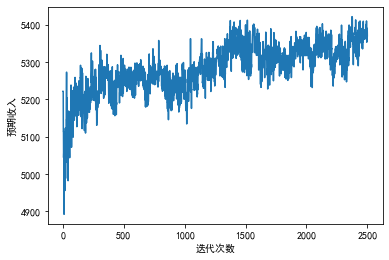

变异系数: 0.969910


array([[10.81992202, 34.66325226, 75.11689185, ...,  0.        ,
        38.73668161, 26.36636833],
       [10.81992202, 34.66325226, 63.97290237, ...,  0.        ,
        38.73668161, 26.36636833],
       [10.81992202, 34.66325226, 63.97290237, ...,  0.        ,
        38.73668161, 26.36636833],
       ...,
       [10.81992202, 34.66325226, 63.97290237, ...,  0.        ,
        38.73668161, 26.36636833],
       [10.81992202, 34.66325226, 63.97290237, ...,  0.        ,
        38.73668161, 26.36636833],
       [10.81992202, 34.66325226, 63.97290237, ...,  0.        ,
        38.73668161, 26.36636833]])

In [301]:
import numpy as np
import random
import matplotlib.pyplot as plt

def get_rand():
    select = [x for x in range(10)]
    random.shuffle(select)
    return select


# time = np.array([[82, 16, 66, 71, 44, 28, 76, 85, 36, 8],
#                  [91, 98, 4, 4, 39, 68, 26, 26, 84, 6],
#                  [13, 96, 85, 28, 77, 66, 51, 82, 59, 54],
#                  [92, 49, 94, 5, 80, 17, 70, 25, 55, 78],
#                  [64, 81, 68, 10, 19, 12, 90, 93, 92, 94],
#                  [10, 15, 76, 83, 49, 50, 96, 35, 29, 13],
#                  [28, 43, 75, 70, 45, 96, 55, 20, 76, 57],
#                  [55, 92, 40, 32, 65, 35, 14, 26, 76, 47],
#                  [96, 80, 66, 96, 71, 59, 15, 62, 39, 2],
#                  [97, 96, 18, 4, 76, 23, 26, 48, 57, 34]])
'''种群数量'''
magnit = 100
'''公司数量'''
pop = len(risk)
'''初始化群体'''
# print(pop) pop=10
rang = np.zeros((magnit, pop), float)
rang1 = np.zeros((magnit, pop), float)
# print(rang)
# print(type(rang[1][1]))

##################################################################################################################
### 随机分配形成祖先群落

#### 生成贷款利率祖先群落
for i in range(magnit):
    select = []
    for j in range(pop):
        select.append(random.uniform(0.04, 0.08))
    rang[i, :] = select

#### 生成贷款额度祖先群落
# for i in range(magnit):
#     select = []
#     for j in range(pop):
#         select.append(random.uniform(10, 100))
#     rang1[i, :] = select
    
    
# 创建一个长度为291，元素都为0的列表

for i in range(magnit):
    stop = 0
    a = [0] * 291
    while stop==0:
        total = 10000
        for j in range(291):
            if total<=100 and total>=10:
                num = random.uniform(10, total)
            elif total>100:
                num = random.uniform(10, 100)
            elif total<10:
                num = total
            total -= num
            a[j] += num
        stop = 1
        random.shuffle(a)
    rang1[i, :] = a
    
# print(rang1.shape)
# print(rang1)
#####################################################################################################################
# ### 计算
# def cal_time(rang, time, pop):
#     sum_time_pop = []
#     for choice in rang:
#         single_array_sum_time = 0
#         for i in range(pop):
#             cut = choice[i]
#             single_array_sum_time += time[cut][i]
#         sum_time_pop.append(single_array_sum_time)
#     sum_time_pop = np.array(sum_time_pop).reshape(-1, 1)
#     num = sum_time_pop.shape[0]
#     return sum_time_pop, num

# def cal_money(rang, risk, pop):
#     sum_riskmoney_pop = []
#     for num, choice in enumerate(rang):
#         single_array_sum_money = 0  # 某行贷款额度策略、某行贷款利率策略下预计利率
#         for i in range(pop):
#             lend_rate = choice[i]  # 对第一家公司借款利率
#             lend_money = rang1[num][i] # 对第一家公司借款额度
#             single_array_sum_money += (lend_rate+1)*lend_money*(1-2*risk[i])
#         sum_riskmoney_pop.append(single_array_sum_money)
#     sum_riskmoney_pop = np.array(sum_riskmoney_pop).reshape(-1, 1)
#     num = sum_riskmoney_pop.shape[0]
#     return sum_riskmoney_pop, num   # 输出对98个公司匹配的每一组额度、利率下的预期利润

# a = cal_money(rang, risk, pop)
# a[0]

# print(rang)
# len(rang[1])
# print(risk)
# print(pop)
############################################################################################################################

count = 0
bestpop = []
while count < 2500:  ##迭代次数

    #     '''计算每一种分配的总时间'''
    #     sum_time_pop = []
    #     for choice in rang:
    #         single_array_sum_time = 0
    #         for i in range(pop):
    #             cut = choice[i]
    #             single_array_sum_time += time[cut][i]
    #         sum_time_pop.append(single_array_sum_time)
    #     sum_time_pop = np.array(sum_time_pop).reshape(-1, 1)
    #     num = sum_time_pop.shape[0]
    #     # print(sum_time_pop)

    sum_riskmoney_pop = []
    for num, choice in enumerate(rang):
        single_array_sum_money = 0  # 某行贷款额度策略、某行贷款利率策略下预计利率
        for i in range(pop):
            lend_rate = choice[i]  # 对第一家公司借款利率
            lend_money = rang1[num][i] # 对第一家公司借款额度
            single_array_sum_money += (lend_rate+1)*lend_money*(1-2*risk[i])
        sum_riskmoney_pop.append(single_array_sum_money)
    sum_riskmoney_pop = np.array(sum_riskmoney_pop).reshape(-1, 1)
    num = sum_riskmoney_pop.shape[0]

    #     '''排序'''
    #     index = np.argsort(sum_time_pop, 0)  ### 返回从小到大排序的索引值
    #     sum_time_pop = sum_time_pop[index].reshape(num, 1)[0:magnit, :]
    #     rang = rang[index].reshape(num, pop)[0:magnit, :]

    '''排序'''
    index = np.argsort(sum_riskmoney_pop, 0)  ### 返回从小到大排序的索引值
    sum_riskmoney_pop = sum_riskmoney_pop[index].reshape(num, 1)[0:magnit, :]
    rang = rang[index].reshape(num, pop)[0:magnit, :]
    rang1 = rang1[index].reshape(num, pop)[0:magnit, :]
    
    prechoose_rate = rang.copy()
    prechoose_money = rang1.copy()
    
#  x   risk = risk[index].reshape(num, pop)[0:magnit, :]
#     print(sum_riskmoney_pop)
#     break
#     rang
    # len(rang[1])
    # print(rang)
    # print(len(rang[0]))
    # print(len(rang))
    # print(pop)
    ########################################################################################################
    #     '''计算适值和适应度'''
    #     fit = sum_riskmoney_pop[:]  # 适值
    #     fitplus = np.cumsum(fit).reshape(-1, 1)  # 适值向下叠加
    #     # print(fitplus[magnit-1, :])
    #     fitlevelplus = fitplus[:] / fitplus[magnit - 1, :]  # 适应度向下叠加
    #     fitlevelplus = np.insert(fitlevelplus, 0, np.array([0]), 0)  # 在第一行添加0
    #     # print(fitlevelplus)
    #     # a = (np.shape(fitlevelplus))[0]

    '''计算适值和适应度'''
    fit = sum_riskmoney_pop[:]  # 适值
    fitplus = np.cumsum(fit).reshape(-1, 1)  # 适值向下叠加
    # print(fitplus[magnit-1, :])
    fitlevelplus = fitplus[:] / fitplus[magnit - 1, :]  # 适应度向下叠加
    fitlevelplus = np.insert(fitlevelplus, 0, np.array([0]), 0)  # 在第一行添加0
    # print(fitlevelplus)
    # a = (np.shape(fitlevelplus))[0]

    ###########################################################################################################
    #     '''选择'''
    #     newchoose = []
    #     new_sum_time = []
    #     for _ in range(magnit):
    #         rand = random.random()
    #         for row in range(magnit):
    #             if rand > fitlevelplus[row, :] and rand < fitlevelplus[row + 1, :]:
    #                 newchoose.append(rang[row, :])
    #                 new_sum_time.append(sum_time_pop[row, :])
    #                 continue
    #     newchoose = np.array(newchoose)
    #     prechoose = newchoose.copy()
    #     new_sum_time = np.array(new_sum_time)
    #     # print(newchoose)
    #     # print((np.shape(newchoose))[0])
    #     # print(new_sum_time)

    '''选择'''
    newchoose_rate = []
    newchoose_money = []
    new_sum_money = []
    for _ in range(magnit):
        rand = random.random()
        for row in range(magnit):
            if rand > fitlevelplus[row, :] and rand < fitlevelplus[row + 1, :]:
                newchoose_rate.append(rang[row, :])
                newchoose_money.append(rang1[row, :])
                new_sum_money.append(sum_riskmoney_pop[row, :])
                continue

#     for _ in range(magnit):
#             row = random.randint(50, 99)
#             newchoose_rate.append(rang[row, :])
#             newchoose_money.append(rang1[row, :])
#             new_sum_money.append(sum_riskmoney_pop[row, :])
#             continue

        
    newchoose_rate = np.array(newchoose_rate)
    newchoose_money = np.array(newchoose_money)

    prechoose_rate1 = newchoose_rate.copy()
    prechoose_money1 = newchoose_money.copy() ## 选择后性状良好的个体
    new_sum_money = np.array(new_sum_money)
    # print(newchoose)
    # print((np.shape(newchoose))[0])
    # print(new_sum_time)

    ##################################################################################################################

    #     '''交叉'''
    #     pc = 0.8
    #     for row in range(0, (np.shape(newchoose))[0], 2):
    #         if pc > random.random():
    #             gen_1 = newchoose[row, :].copy()
    #             gen_2 = newchoose[row + 1, :].copy()
    #             select = [x for x in range(10)]
    #             random.shuffle(select)
    #             r1 = select[0]
    #             r2 = select[1]
    #             r1, r2 = min(r1, r2), max(r1, r2)
    #             cr1, cr2 = gen_1[r1:r2 + 1].copy(), gen_2[r1:r2 + 1].copy()
    #             # print(r1, r2, cr1, cr2)
    #             for site in range(r2 - r1 + 1):
    #                 s1 = np.where(gen_1 == cr2[site])
    #                 gen_1[s1] = (gen_1[r1:r2 + 1])[site].copy()
    #                 a = gen_1
    #             for site in range(r2 - r1 + 1):
    #                 s2 = np.where(gen_2 == cr1[site])
    #                 gen_2[s2] = (gen_2[r1:r2 + 1])[site].copy()
    #                 b = gen_2
    #             gen_1[r1:r2 + 1] = cr2.copy()
    #             gen_2[r1:r2 + 1] = cr1.copy()
    #             newchoose[row, :] = gen_1.copy()
    #             newchoose[row + 1, :] = gen_2.copy()
    #################################################################################################################

    '''交叉'''
    pc = 0.9
    for row in range(0, (np.shape(newchoose_rate))[0], 2):
        if pc > random.random():
            gen_1 = newchoose_rate[row, :].copy()  # copy 第row行的分配方案（对各企业的贷款利率决策）
            gen_2 = newchoose_rate[row + 1, :].copy()  # copy 第row+1行的分配方案（对各企业的贷款利率决策）
            select = [x for x in range(98)] # 对几个公司进行分配
            random.shuffle(select)  ## 形成一个新的决策
            r1 = select[0]
            r2 = select[1]
            r1, r2 = min(r1, r2), max(r1, r2) ## 使得r1为r1、r2中小的那一个
            cr1, cr2 = gen_1[r1:r2 + 1].copy(), gen_2[r1:r2 + 1].copy()
            # print(r1, r2, cr1, cr2)
            gen_1[r1:r2 + 1] = cr2.copy()
            gen_2[r1:r2 + 1] = cr1.copy()
            newchoose_rate[row, :] = gen_1.copy()
            newchoose_rate[row + 1, :] = gen_2.copy()

            gen_1 = newchoose_money[row, :].copy()  # copy 第row行的分配方案（对各企业的贷款决策）
            gen_2 = newchoose_money[row + 1, :].copy()  # copy 第row+1行的分配方案（对各企业的贷款决策）
            select = [x for x in range(98)] # 对几个公司进行分配
            random.shuffle(select)  ## 形成一个新的决策
            r1 = select[0]
            r2 = select[1]
            r1, r2 = min(r1, r2), max(r1, r2) ## 使得r1为r1、r2中小的那一个
            cr1, cr2 = gen_1[r1:r2 + 1].copy(), gen_2[r1:r2 + 1].copy()
            # print(r1, r2, cr1, cr2)
            gen_1[r1:r2 + 1] = cr2.copy()
            gen_2[r1:r2 + 1] = cr1.copy()
            newchoose_money[row, :] = gen_1.copy()
            newchoose_money[row + 1, :] = gen_2.copy()

    ########################################################################################################################

    #     '''变异'''
    #     pm = 0.1
    #     for row in range(0, (np.shape(newchoose))[0]):
    #         if pm > random.random():
    #             select = [x for x in range(10)]
    #             random.shuffle(select)
    #             r1 = select[0]
    #             r2 = select[1]
    #             gen = newchoose[row, :]
    #             gen[r1], gen[r2] = gen[r2], gen[r1]
    #             newchoose[row, :] = gen.copy()
    #             # print(r1,r2,gen[r1],gen[r2])
    #     # print(newchoose,'--------')
    #     # print(prechoose)
    #     rang = np.append(prechoose, newchoose, 0)
    #     bestpop.append(sum_time_pop[0, :])
    #     count += 1
    #     # print(rang.shape)
    # bestpop = np.array(bestpop)
    # # print(bestpop)
    # print(sum_time_pop[0, :])
    # print(rang[0, :])

    '''变异'''
    pm = 0.05
    for row in range(0, (np.shape(newchoose_rate))[0]):
        if pm > random.random():
            select = [x for x in range(98)] ## 选一行变量进行变异
            random.shuffle(select)
            r1 = select[0]
            r2 = select[1]
            gen = newchoose_rate[row, :]  ## 提取一行分配方案(利率)
            gen[r1], gen[r2] = gen[r2], gen[r1]  ## 选一行分配方案中的两个交换位置
            newchoose_rate[row, :] = gen.copy()
            # print(r1,r2,gen[r1],gen[r2])

            select = [x for x in range(98)] ## 选一行变量进行变异
            random.shuffle(select)
            r1 = select[0]
            r2 = select[1]
            gen = newchoose_money[row, :]  ## 提取一行分配方案(金额)
            gen[r1], gen[r2] = gen[r2], gen[r1]  ## 选一行分配方案中的两个交换位置
            newchoose_money[row, :] = gen.copy()

    # print(newchoose,'--------')
    # print(prechoose)
    
    
    save_newchoose_money = []
    save_newchoose_rate  = []
    for i, j in enumerate(newchoose_money):
        if sum(j)<=10000:
            save_newchoose_money.append(j)
            save_newchoose_rate.append(newchoose_rate[i])
    
    rang1 = np.append(save_newchoose_money, prechoose_money1[0: 100-len(save_newchoose_money)], 0)
    rang =  np.append(save_newchoose_rate, prechoose_rate1[0: 100-len(save_newchoose_rate)], 0)
#     print(len(rang1))
#     rang = np.append(prechoose_rate1[47:98], newchoose_rate[0:49], 0)
#     print(len(rang))
#     rang1 = np.append(prechoose_money1[47:98], newchoose_money[0:49], 0)
#     rang = np.append(prechoose_rate, newchoose_rate, 0)
#     rang1 = np.append(prechoose_money, newchoose_money, 0)
    bestpop.append(sum_riskmoney_pop[-1, :])
    count += 1
    
# print(rang.shape)
bestpop = np.array(bestpop)
# print(bestpop)
# print(sum_riskmoney_pop[0, :])

print(sum_riskmoney_pop[-1, :])
print(rang[0, :])
print(rang1[0, :])
# print('变异系数'+std([1, 2, 3]))

############################################################################################################################

x = [a for a in range(1,2501)]
y = bestpop
plt.plot(x,y)
plt.xlabel('迭代次数')
plt.ylabel('预期收入')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

print('变异系数: %f' %(np.std(rang1)/np.mean(rang1)))
rang1

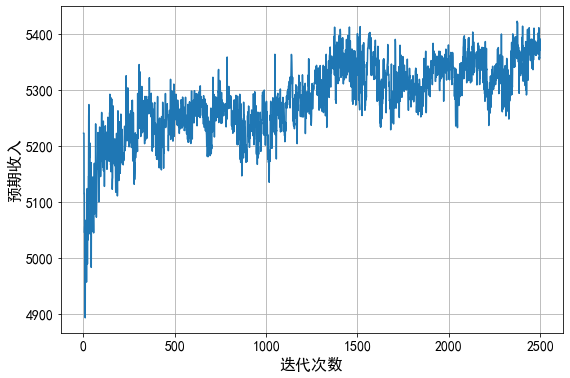

In [308]:
fig, ax = plt.subplots(figsize=(9, 6))
x = [a for a in range(1,2501)]
y = bestpop
plt.plot(x,y)
plt.xlabel('迭代次数', size = 16)
plt.ylabel('预期收入', size = 16)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xticks(size = 14)
plt.yticks(size = 14)

ax.grid(True)
plt.savefig(r"D:\c_\大三下\建模——水\bighmk\模型二遗传算法.jpg")
plt.show()

In [317]:
prechoose_money[-1, :]
prechoose_rate[-1, :]
# risk

q2_decision = pd.DataFrame() 
q2_decision['贷款金额'] = prechoose_money[-1, :]
q2_decision['贷款利率'] = prechoose_rate[-1, :]
q2_decision['违约概率'] = risk
q2_decision

,贷款金额,贷款利率,违约概率
0,10.819922,0.057713,0.524514
1,34.663252,0.072395,0.096882
2,63.972902,0.076823,0.000002
3,0.000000,0.047918,0.028527
4,0.000000,0.060726,0.000001
...,...,...,...
286,30.147320,0.044900,0.485189
287,86.102039,0.077812,0.497155
288,0.000000,0.046342,0.498182
289,38.736682,0.049449,0.500985


In [319]:
q2_decision1 = pd.merge(need_data, q2_decision, on = '违约概率')
q2_decision1.to_excel(r"D:\c_\大三下\建模——水\bighmk\decision2.xlsx")

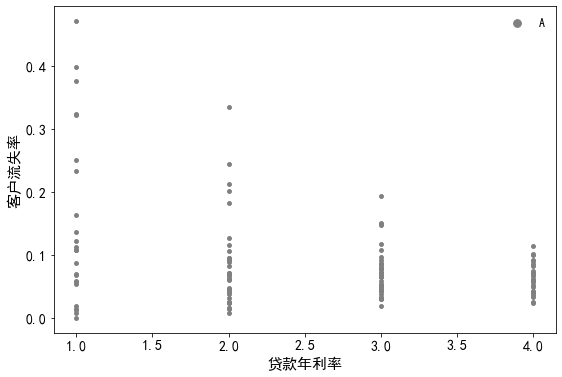

In [323]:
pic = pd.read_excel(r"D:\c_\大三下\建模——水\bighmk\训练集.xlsx")
pic

fig, ax = plt.subplots(figsize=(9, 6))

ax.scatter(pic['评级'], pic['作废发票率'], s=15, c='gray', label = 'A') # 调整大小和颜色
# ax.scatter(dat['贷款年利率'], dat['B'], s=15, c='black', label = 'B')
# ax.scatter(dat['贷款年利率'], dat['C'], s=15, c='blue', label = 'C')
ax.set_xlabel('贷款年利率', fontsize = 15)  
ax.set_ylabel('客户流失率', fontsize = 15) 
ax.set_title(label = '', size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14)
# ax.axhline(y=0.5, c='red', ls='-', lw=2, zorder=0, alpha = 0.5)   #水平线
# ax.grid(axis = 'y',linestyle = '--', color =  '#909090')
ax.legend(fontsize = 12, frameon = False, markerscale=2)
# plt.savefig(r"D:\c_\大三下\建模——水\bighmk\scatter.jpg")
plt.show()

## 问题三

In [2]:
## 附件2
## 企业预测信用评级数据
import pandas as pd
res = pd.read_excel(r"D:\c_\大三下\建模——水\bighmk\预测结果1.xlsx", sheet_name = 'Sheet2')
res

d1 = pd.read_excel(r"D:\c_\大三下\建模——水\bighmk\sum_sell_buy_Q2.xlsx", sheet_name = 'Sheet2')
d1

t1 = pd.merge(d1, res, on = '企业代号')
t1

,企业代号,进项价税合计中位数,平均作废率,交易总数,净利润,单笔净利润,预测信用评级
0,E125,1150.00,0.482113,1311,-2.541184e+06,-1938.355683,2
1,E126,1095.00,0.277962,704,4.417192e+07,62744.204986,2
2,E127,310.00,0.027064,4828,3.392953e+08,70276.583592,3
3,E128,300.00,0.063485,3989,8.964104e+07,22472.057939,3
4,E129,330.00,0.099863,10240,3.631643e+08,35465.266584,2
...,...,...,...,...,...,...,...
291,E421,1000.00,0.017857,47,2.209018e+05,4700.038936,4
292,E422,280.00,0.055556,30,2.689661e+04,896.553667,2
293,E423,1500.00,0.083333,26,-4.161700e+03,-160.065385,3
294,E424,1180.00,0.085714,57,-5.459935e+04,-957.883333,2


In [ ]:
t3

In [3]:
t2 = pd.read_excel(r"D:\c_\大三下\建模——水\bighmk\附件2：302家无信贷记录企业的相关数据.xlsx", sheet_name = '企业信息')
t3 = pd.read_excel(r"D:\c_\大三下\建模——水\bighmk\附件2：302家无信贷记录企业的相关数据.xlsx", sheet_name = 'Sheet2')  

t2

,企业代号,企业名称,恢复能力,风险增加比率
0,E124,个体经营E124,1.000,0.068
1,E125,个体经营E125,1.000,0.068
2,E126,个体经营E126,1.000,0.068
3,E127,个体经营E127,1.000,0.068
4,E128,个体经营E128,1.000,0.068
...,...,...,...,...
297,E421,***保温材料有限公司,NaN,NaN
298,E422,***童装店,NaN,NaN
299,E423,***通风设备有限公司,NaN,NaN
300,E424,***贸易有限公司,1.047,0.178


In [4]:
te = t2[t2['恢复能力'].isna()==True]
te = te.drop(columns = ['恢复能力', '风险增加比率'])
te
te1 = t2[t2['恢复能力'].isna()==False]
te1

,企业代号,企业名称,恢复能力,风险增加比率
0,E124,个体经营E124,1.000,0.068
1,E125,个体经营E125,1.000,0.068
2,E126,个体经营E126,1.000,0.068
3,E127,个体经营E127,1.000,0.068
4,E128,个体经营E128,1.000,0.068
...,...,...,...,...
288,E412,***汽车贸易有限公司,1.047,0.178
289,E413,***石材工艺品有限公司,0.541,0.175
293,E417,***园林景观工程有限公司,0.541,0.175
300,E424,***贸易有限公司,1.047,0.178


In [365]:
t3

,企业名称,恢复能力,风险增加比率
0,***办公用品经营部,1.047,0.178
1,***包装材料有限公司,1.447,0.052
2,***保温材料有限公司,1.447,0.052
3,***不锈钢材料有限公司,1.447,0.052
4,***餐饮文化服务有限公司,-0.518,0.353
...,...,...,...
155,***质量检验测试站,2.000,-0.132
156,***智能科技有限公司,2.000,-0.132
157,***装饰工程设计有限公司,0.000,0.096
158,***自动化科技有限公司,2.000,-0.132


In [5]:
# t3
ttt = pd.merge(te, t3, on = '企业名称')
# t4 = t4.drop(columns = ['恢复能力_x','风险增加比率_x'])
# t4.columns = ['企业代号', '企业名称', '恢复能力', '风险增加比率']
ttt = ttt.drop_duplicates(keep = 'first')
ttt
te2 = pd.concat([ttt, te1])
te2

,企业代号,企业名称,恢复能力,风险增加比率
0,E134,***工程咨询有限公司,0.000,0.096
1,E136,***机械有限责任公司,1.447,0.052
2,E141,***食品有限公司,1.447,0.052
4,E181,***食品有限公司,1.447,0.052
6,E142,***运业有限公司,1.059,0.140
...,...,...,...,...
288,E412,***汽车贸易有限公司,1.047,0.178
289,E413,***石材工艺品有限公司,0.541,0.175
293,E417,***园林景观工程有限公司,0.541,0.175
300,E424,***贸易有限公司,1.047,0.178


In [6]:
ttt

,企业代号,企业名称,恢复能力,风险增加比率
0,E134,***工程咨询有限公司,0.000,0.096
1,E136,***机械有限责任公司,1.447,0.052
2,E141,***食品有限公司,1.447,0.052
4,E181,***食品有限公司,1.447,0.052
6,E142,***运业有限公司,1.059,0.140
...,...,...,...,...
341,E418,***营销策划有限公司,0.000,0.096
342,E420,***康药房,1.047,0.178
343,E421,***保温材料有限公司,1.447,0.052
344,E422,***童装店,1.000,0.068


In [8]:
appen2 = pd.merge(te2, t1, on = '企业代号')
appen2
appen2.to_excel(r"D:\c_\大三下\建模——水\bighmk\附件二恢复能力风险增加比率.xlsx")

In [392]:
## 附件1
## 企业特征值数据
feat_train= pd.read_excel(r"D:\c_\大三下\建模——水\bighmk\附件一特征_1.xlsx", sheet_name = 'Sheet2')
feat_train

,企业代号,企业名称,风险增加比率,恢复能力,违约,进项价税合计中位数,销项交易数,利润,评级,单均利润,交易总数,作废发票率
0,E85,***安防科技有限公司,-0.132,2.000,0,218.0,247,2555416.87,3,10345.817287,470,0.090909
1,E40,***财税咨询服务有限公司,0.096,2.000,0,234.0,758,34385079.07,2,45362.901148,3758,0.041327
2,E106,***财务管理有限公司,0.096,2.000,0,285.0,134,573882.46,3,4282.704925,168,0.086957
3,E36,***超硬材料有限公司,0.178,1.047,1,2400.0,1396,35027503.97,1,25091.335222,2653,0.067487
4,E120,***陈列广告有限公司,-0.132,2.000,1,200.0,9,176947.08,1,19660.786667,44,0.323077
...,...,...,...,...,...,...,...,...,...,...,...,...
117,E115,***装饰工程有限公司,0.178,1.047,1,280.0,4,56640.00,1,14160.000000,6,0.250000
118,E6,***装饰设计工程有限公司,0.175,0.541,0,2000.0,368,-13691860.30,4,-37206.142120,8877,0.069302
119,E14,个体经营E14,0.068,1.000,0,700.0,2813,95730615.14,2,34031.502005,8006,0.088570
120,E45,个体经营E45,0.068,1.000,1,400.0,298,28325411.67,3,95051.717013,640,0.041916


In [403]:
target = feat_train['违约'].values
feature1 = feat_train.drop(columns = ['企业代号', '企业名称', '风险增加比率', '违约', '销项交易数'])

In [404]:
feature1

,恢复能力,进项价税合计中位数,利润,评级,单均利润,交易总数,作废发票率
0,2.000,218.0,2555416.87,3,10345.817287,470,0.090909
1,2.000,234.0,34385079.07,2,45362.901148,3758,0.041327
2,2.000,285.0,573882.46,3,4282.704925,168,0.086957
3,1.047,2400.0,35027503.97,1,25091.335222,2653,0.067487
4,2.000,200.0,176947.08,1,19660.786667,44,0.323077
...,...,...,...,...,...,...,...
117,1.047,280.0,56640.00,1,14160.000000,6,0.250000
118,0.541,2000.0,-13691860.30,4,-37206.142120,8877,0.069302
119,1.000,700.0,95730615.14,2,34031.502005,8006,0.088570
120,1.000,400.0,28325411.67,3,95051.717013,640,0.041916


In [408]:
## 逻辑斯蒂回归

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature1, target, test_size = 0.2, random_state = 1234)
from sklearn.linear_model import LogisticRegression
## 定义逻辑回归模型
clf = LogisticRegression(max_iter=2000)
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)
## 查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)
## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)
## 在训练集和测试集上分布利用训练好的模型进行预测

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics
print('The accuracy of the Logistic Regression for Traning Set is: %d%%' % (metrics.accuracy_score(y_train,train_predict)*100))
print('The accuracy of the Logistic Regression for Test Set is: %d%%' % (metrics.accuracy_score(y_test,test_predict)*100))

the weight of Logistic Regression: [[-3.18030396e-07 -4.13575139e-04 -3.60378982e-08 -1.55775359e-06
   7.90835684e-07 -5.22733335e-04  2.33020745e-08]]
the intercept(w0) of Logistic Regression: [-2.05145208e-07]
The accuracy of the Logistic Regression for Traning Set is: 79%
The accuracy of the Logistic Regression for Test Set is: 72%


In [433]:
# clf.predict_proba(feature1)

featuress = appen2[['恢复能力', '进项价税合计中位数', '净利润', '预测信用评级', '单笔净利润','交易总数', '平均作废率']]
appen2['违约概率'] = pd.DataFrame(clf.predict_proba(featuress))[1]

appen2['概率_突发事件发生后'] = appen2['违约概率']*(1+appen2['风险增加比率'])

appen2_output = appen2[['企业代号', '违约概率', '概率_突发事件发生后']]
# appen2_output.to_excel(r"D:\c_\大三下\建模——水\bighmk\Q3附件二输出概率.xlsx")
appen2

appen2_1 = appen2[appen2['预测信用评级']!=1]
appen2_1

,企业代号,企业名称,恢复能力,风险增加比率,进项价税合计中位数,平均作废率,交易总数,净利润,单笔净利润,预测信用评级,违约概率,概率_突发事件发生后
0,E134,***工程咨询有限公司,0.000,0.096,245.00,0.051589,4393,1.312500e+08,29877.070059,3,0.000821,0.000900
1,E136,***机械有限责任公司,1.447,0.052,289.00,0.069401,1304,1.348715e+08,103429.041411,3,0.003759,0.003954
2,E141,***食品有限公司,1.447,0.052,5369.50,0.063566,5194,1.590094e+08,30614.058885,3,0.000024,0.000025
3,E181,***食品有限公司,1.447,0.052,300.00,0.052775,3314,8.144141e+07,24574.959215,3,0.008393,0.008829
4,E142,***运业有限公司,1.059,0.140,3592.00,0.066301,1760,1.023153e+08,58133.702625,3,0.002360,0.002690
...,...,...,...,...,...,...,...,...,...,...,...,...
291,E412,***汽车贸易有限公司,1.047,0.178,337.00,0.061868,220,2.612206e+05,1187.366545,3,0.434662,0.512032
292,E413,***石材工艺品有限公司,0.541,0.175,229.90,0.106061,94,2.685344e+05,2856.749043,3,0.462162,0.543041
293,E417,***园林景观工程有限公司,0.541,0.175,250.00,0.004032,130,1.146015e+05,881.550308,4,0.456414,0.536286
294,E424,***贸易有限公司,1.047,0.178,1180.00,0.085714,57,-5.459935e+04,-957.883333,2,0.373646,0.440155


In [437]:
risk = appen2_1['概率_突发事件发生后'].values
risk

array([8.99926252e-04, 3.95436745e-03, 2.51347442e-05, 8.82917350e-03,
       2.69012712e-03, 4.78823415e-03, 2.77359636e-03, 2.29949649e-01,
       2.14337709e-01, 9.40179089e-03, 7.33636320e-03, 1.69444503e-02,
       5.19426453e-03, 1.75680110e-01, 1.76939142e-01, 4.41551825e-01,
       7.13517893e-04, 5.98350950e-05, 9.99742701e-02, 4.13072367e-01,
       4.63589040e-01, 1.97848789e-04, 1.58279146e-03, 1.87225082e-03,
       1.91836969e-02, 5.45277191e-02, 1.38424331e-02, 1.65891741e-01,
       3.11195234e-01, 2.82852804e-01, 3.56370791e-01, 3.64669755e-01,
       4.05373852e-01, 2.82386898e-01, 3.08443757e-02, 3.32128600e-03,
       1.33236094e-02, 1.34275707e-03, 2.58898502e-03, 1.55819587e-05,
       2.49828999e-03, 4.83911686e-01, 4.85899821e-01, 4.50298466e-01,
       3.79808472e-04, 8.74480419e-04, 2.28464606e-01, 5.00279482e-02,
       3.14445289e-02, 2.93049172e-02, 1.56969693e-02, 7.33057502e-03,
       9.97966155e-03, 1.84713879e-04, 1.69486302e-03, 1.47603134e-02,
      

[7169.60115858]
[0.05229314 0.07008516 0.05145291 0.04241147 0.07729921 0.06050971
 0.04642367 0.04892475 0.0735811  0.04054705 0.04642367 0.07729921
 0.06035564 0.05145291 0.04892475 0.05229314 0.04457925 0.07729921
 0.07507049 0.06998375 0.05724152 0.04457925 0.07729921 0.06705684
 0.07729921 0.06998375 0.05145291 0.07507049 0.07507049 0.06998375
 0.07729921 0.04892475 0.06705684 0.07729921 0.05724152 0.04457925
 0.07729921 0.05724152 0.04642367 0.07239643 0.07940751 0.07507049
 0.04054705 0.05410112 0.07008516 0.07507049 0.05231452 0.04320113
 0.06035564 0.07239643 0.06035564 0.07812296 0.05229314 0.05231452
 0.07460827 0.05229314 0.05145291 0.07507049 0.07940751 0.0735811
 0.05724152 0.07940751 0.07729921 0.05229314 0.05145291 0.04241147
 0.07940751 0.07729921 0.06035564 0.05229314 0.07507049 0.05229314
 0.04054705 0.07729921 0.07365205 0.05145291 0.04457925 0.04457925
 0.04646408 0.05724152 0.04642367 0.05876049 0.07940751 0.06035564
 0.07729921 0.04642367 0.07008516 0.05229314 0.

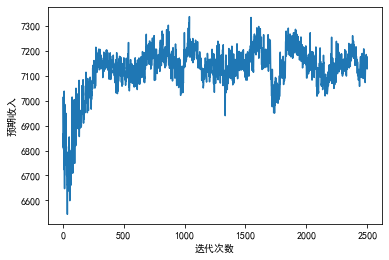

变异系数: 1.019521


array([[74.98183142,  0.        , 94.42719791, ...,  0.        ,
        32.06782265,  0.        ],
       [20.58587558,  0.        , 94.42719791, ...,  0.        ,
        32.06782265,  0.        ],
       [74.98183142,  0.        , 94.42719791, ...,  0.        ,
        32.06782265,  0.        ],
       ...,
       [74.98183142,  0.        , 94.42719791, ...,  0.        ,
        32.06782265,  0.        ],
       [74.98183142,  0.        , 94.42719791, ...,  0.        ,
        32.06782265,  0.        ],
       [74.98183142,  0.        , 94.42719791, ...,  0.        ,
        32.06782265,  0.        ]])

In [438]:
import numpy as np
import random
import matplotlib.pyplot as plt

def get_rand():
    select = [x for x in range(10)]
    random.shuffle(select)
    return select


# time = np.array([[82, 16, 66, 71, 44, 28, 76, 85, 36, 8],
#                  [91, 98, 4, 4, 39, 68, 26, 26, 84, 6],
#                  [13, 96, 85, 28, 77, 66, 51, 82, 59, 54],
#                  [92, 49, 94, 5, 80, 17, 70, 25, 55, 78],
#                  [64, 81, 68, 10, 19, 12, 90, 93, 92, 94],
#                  [10, 15, 76, 83, 49, 50, 96, 35, 29, 13],
#                  [28, 43, 75, 70, 45, 96, 55, 20, 76, 57],
#                  [55, 92, 40, 32, 65, 35, 14, 26, 76, 47],
#                  [96, 80, 66, 96, 71, 59, 15, 62, 39, 2],
#                  [97, 96, 18, 4, 76, 23, 26, 48, 57, 34]])
'''种群数量'''
magnit = 100
'''公司数量'''
pop = len(risk)
'''初始化群体'''
# print(pop) pop=10
rang = np.zeros((magnit, pop), float)
rang1 = np.zeros((magnit, pop), float)
# print(rang)
# print(type(rang[1][1]))

##################################################################################################################
### 随机分配形成祖先群落

#### 生成贷款利率祖先群落
for i in range(magnit):
    select = []
    for j in range(pop):
        select.append(random.uniform(0.04, 0.08))
    rang[i, :] = select

#### 生成贷款额度祖先群落
# for i in range(magnit):
#     select = []
#     for j in range(pop):
#         select.append(random.uniform(10, 100))
#     rang1[i, :] = select
    
    
# 创建一个长度为291，元素都为0的列表

for i in range(magnit):
    stop = 0
    a = [0] * 291
    while stop==0:
        total = 10000
        for j in range(291):
            if total<=100 and total>=10:
                num = random.uniform(10, total)
            elif total>100:
                num = random.uniform(10, 100)
            elif total<10:
                num = total
            total -= num
            a[j] += num
        stop = 1
        random.shuffle(a)
    rang1[i, :] = a
    
# print(rang1.shape)
# print(rang1)
#####################################################################################################################
# ### 计算
# def cal_time(rang, time, pop):
#     sum_time_pop = []
#     for choice in rang:
#         single_array_sum_time = 0
#         for i in range(pop):
#             cut = choice[i]
#             single_array_sum_time += time[cut][i]
#         sum_time_pop.append(single_array_sum_time)
#     sum_time_pop = np.array(sum_time_pop).reshape(-1, 1)
#     num = sum_time_pop.shape[0]
#     return sum_time_pop, num

# def cal_money(rang, risk, pop):
#     sum_riskmoney_pop = []
#     for num, choice in enumerate(rang):
#         single_array_sum_money = 0  # 某行贷款额度策略、某行贷款利率策略下预计利率
#         for i in range(pop):
#             lend_rate = choice[i]  # 对第一家公司借款利率
#             lend_money = rang1[num][i] # 对第一家公司借款额度
#             single_array_sum_money += (lend_rate+1)*lend_money*(1-2*risk[i])
#         sum_riskmoney_pop.append(single_array_sum_money)
#     sum_riskmoney_pop = np.array(sum_riskmoney_pop).reshape(-1, 1)
#     num = sum_riskmoney_pop.shape[0]
#     return sum_riskmoney_pop, num   # 输出对98个公司匹配的每一组额度、利率下的预期利润

# a = cal_money(rang, risk, pop)
# a[0]

# print(rang)
# len(rang[1])
# print(risk)
# print(pop)
############################################################################################################################

count = 0
bestpop = []
while count < 2500:  ##迭代次数

    #     '''计算每一种分配的总时间'''
    #     sum_time_pop = []
    #     for choice in rang:
    #         single_array_sum_time = 0
    #         for i in range(pop):
    #             cut = choice[i]
    #             single_array_sum_time += time[cut][i]
    #         sum_time_pop.append(single_array_sum_time)
    #     sum_time_pop = np.array(sum_time_pop).reshape(-1, 1)
    #     num = sum_time_pop.shape[0]
    #     # print(sum_time_pop)

    sum_riskmoney_pop = []
    for num, choice in enumerate(rang):
        single_array_sum_money = 0  # 某行贷款额度策略、某行贷款利率策略下预计利率
        for i in range(pop):
            lend_rate = choice[i]  # 对第一家公司借款利率
            lend_money = rang1[num][i] # 对第一家公司借款额度
            single_array_sum_money += (lend_rate+1)*lend_money*(1-2*risk[i])
        sum_riskmoney_pop.append(single_array_sum_money)
    sum_riskmoney_pop = np.array(sum_riskmoney_pop).reshape(-1, 1)
    num = sum_riskmoney_pop.shape[0]

    #     '''排序'''
    #     index = np.argsort(sum_time_pop, 0)  ### 返回从小到大排序的索引值
    #     sum_time_pop = sum_time_pop[index].reshape(num, 1)[0:magnit, :]
    #     rang = rang[index].reshape(num, pop)[0:magnit, :]

    '''排序'''
    index = np.argsort(sum_riskmoney_pop, 0)  ### 返回从小到大排序的索引值
    sum_riskmoney_pop = sum_riskmoney_pop[index].reshape(num, 1)[0:magnit, :]
    rang = rang[index].reshape(num, pop)[0:magnit, :]
    rang1 = rang1[index].reshape(num, pop)[0:magnit, :]
    
    prechoose_rate = rang.copy()
    prechoose_money = rang1.copy()
    
#  x   risk = risk[index].reshape(num, pop)[0:magnit, :]
#     print(sum_riskmoney_pop)
#     break
#     rang
    # len(rang[1])
    # print(rang)
    # print(len(rang[0]))
    # print(len(rang))
    # print(pop)
    ########################################################################################################
    #     '''计算适值和适应度'''
    #     fit = sum_riskmoney_pop[:]  # 适值
    #     fitplus = np.cumsum(fit).reshape(-1, 1)  # 适值向下叠加
    #     # print(fitplus[magnit-1, :])
    #     fitlevelplus = fitplus[:] / fitplus[magnit - 1, :]  # 适应度向下叠加
    #     fitlevelplus = np.insert(fitlevelplus, 0, np.array([0]), 0)  # 在第一行添加0
    #     # print(fitlevelplus)
    #     # a = (np.shape(fitlevelplus))[0]

    '''计算适值和适应度'''
    fit = sum_riskmoney_pop[:]  # 适值
    fitplus = np.cumsum(fit).reshape(-1, 1)  # 适值向下叠加
    # print(fitplus[magnit-1, :])
    fitlevelplus = fitplus[:] / fitplus[magnit - 1, :]  # 适应度向下叠加
    fitlevelplus = np.insert(fitlevelplus, 0, np.array([0]), 0)  # 在第一行添加0
    # print(fitlevelplus)
    # a = (np.shape(fitlevelplus))[0]

    ###########################################################################################################
    #     '''选择'''
    #     newchoose = []
    #     new_sum_time = []
    #     for _ in range(magnit):
    #         rand = random.random()
    #         for row in range(magnit):
    #             if rand > fitlevelplus[row, :] and rand < fitlevelplus[row + 1, :]:
    #                 newchoose.append(rang[row, :])
    #                 new_sum_time.append(sum_time_pop[row, :])
    #                 continue
    #     newchoose = np.array(newchoose)
    #     prechoose = newchoose.copy()
    #     new_sum_time = np.array(new_sum_time)
    #     # print(newchoose)
    #     # print((np.shape(newchoose))[0])
    #     # print(new_sum_time)

    '''选择'''
    newchoose_rate = []
    newchoose_money = []
    new_sum_money = []
    for _ in range(magnit):
        rand = random.random()
        for row in range(magnit):
            if rand > fitlevelplus[row, :] and rand < fitlevelplus[row + 1, :]:
                newchoose_rate.append(rang[row, :])
                newchoose_money.append(rang1[row, :])
                new_sum_money.append(sum_riskmoney_pop[row, :])
                continue

#     for _ in range(magnit):
#             row = random.randint(50, 99)
#             newchoose_rate.append(rang[row, :])
#             newchoose_money.append(rang1[row, :])
#             new_sum_money.append(sum_riskmoney_pop[row, :])
#             continue

        
    newchoose_rate = np.array(newchoose_rate)
    newchoose_money = np.array(newchoose_money)

    prechoose_rate1 = newchoose_rate.copy()
    prechoose_money1 = newchoose_money.copy() ## 选择后性状良好的个体
    new_sum_money = np.array(new_sum_money)
    # print(newchoose)
    # print((np.shape(newchoose))[0])
    # print(new_sum_time)

    ##################################################################################################################

    #     '''交叉'''
    #     pc = 0.8
    #     for row in range(0, (np.shape(newchoose))[0], 2):
    #         if pc > random.random():
    #             gen_1 = newchoose[row, :].copy()
    #             gen_2 = newchoose[row + 1, :].copy()
    #             select = [x for x in range(10)]
    #             random.shuffle(select)
    #             r1 = select[0]
    #             r2 = select[1]
    #             r1, r2 = min(r1, r2), max(r1, r2)
    #             cr1, cr2 = gen_1[r1:r2 + 1].copy(), gen_2[r1:r2 + 1].copy()
    #             # print(r1, r2, cr1, cr2)
    #             for site in range(r2 - r1 + 1):
    #                 s1 = np.where(gen_1 == cr2[site])
    #                 gen_1[s1] = (gen_1[r1:r2 + 1])[site].copy()
    #                 a = gen_1
    #             for site in range(r2 - r1 + 1):
    #                 s2 = np.where(gen_2 == cr1[site])
    #                 gen_2[s2] = (gen_2[r1:r2 + 1])[site].copy()
    #                 b = gen_2
    #             gen_1[r1:r2 + 1] = cr2.copy()
    #             gen_2[r1:r2 + 1] = cr1.copy()
    #             newchoose[row, :] = gen_1.copy()
    #             newchoose[row + 1, :] = gen_2.copy()
    #################################################################################################################

    '''交叉'''
    pc = 0.9
    for row in range(0, (np.shape(newchoose_rate))[0], 2):
        if pc > random.random():
            gen_1 = newchoose_rate[row, :].copy()  # copy 第row行的分配方案（对各企业的贷款利率决策）
            gen_2 = newchoose_rate[row + 1, :].copy()  # copy 第row+1行的分配方案（对各企业的贷款利率决策）
            select = [x for x in range(98)] # 对几个公司进行分配
            random.shuffle(select)  ## 形成一个新的决策
            r1 = select[0]
            r2 = select[1]
            r1, r2 = min(r1, r2), max(r1, r2) ## 使得r1为r1、r2中小的那一个
            cr1, cr2 = gen_1[r1:r2 + 1].copy(), gen_2[r1:r2 + 1].copy()
            # print(r1, r2, cr1, cr2)
            gen_1[r1:r2 + 1] = cr2.copy()
            gen_2[r1:r2 + 1] = cr1.copy()
            newchoose_rate[row, :] = gen_1.copy()
            newchoose_rate[row + 1, :] = gen_2.copy()

            gen_1 = newchoose_money[row, :].copy()  # copy 第row行的分配方案（对各企业的贷款决策）
            gen_2 = newchoose_money[row + 1, :].copy()  # copy 第row+1行的分配方案（对各企业的贷款决策）
            select = [x for x in range(98)] # 对几个公司进行分配
            random.shuffle(select)  ## 形成一个新的决策
            r1 = select[0]
            r2 = select[1]
            r1, r2 = min(r1, r2), max(r1, r2) ## 使得r1为r1、r2中小的那一个
            cr1, cr2 = gen_1[r1:r2 + 1].copy(), gen_2[r1:r2 + 1].copy()
            # print(r1, r2, cr1, cr2)
            gen_1[r1:r2 + 1] = cr2.copy()
            gen_2[r1:r2 + 1] = cr1.copy()
            newchoose_money[row, :] = gen_1.copy()
            newchoose_money[row + 1, :] = gen_2.copy()

    ########################################################################################################################

    #     '''变异'''
    #     pm = 0.1
    #     for row in range(0, (np.shape(newchoose))[0]):
    #         if pm > random.random():
    #             select = [x for x in range(10)]
    #             random.shuffle(select)
    #             r1 = select[0]
    #             r2 = select[1]
    #             gen = newchoose[row, :]
    #             gen[r1], gen[r2] = gen[r2], gen[r1]
    #             newchoose[row, :] = gen.copy()
    #             # print(r1,r2,gen[r1],gen[r2])
    #     # print(newchoose,'--------')
    #     # print(prechoose)
    #     rang = np.append(prechoose, newchoose, 0)
    #     bestpop.append(sum_time_pop[0, :])
    #     count += 1
    #     # print(rang.shape)
    # bestpop = np.array(bestpop)
    # # print(bestpop)
    # print(sum_time_pop[0, :])
    # print(rang[0, :])

    '''变异'''
    pm = 0.05
    for row in range(0, (np.shape(newchoose_rate))[0]):
        if pm > random.random():
            select = [x for x in range(98)] ## 选一行变量进行变异
            random.shuffle(select)
            r1 = select[0]
            r2 = select[1]
            gen = newchoose_rate[row, :]  ## 提取一行分配方案(利率)
            gen[r1], gen[r2] = gen[r2], gen[r1]  ## 选一行分配方案中的两个交换位置
            newchoose_rate[row, :] = gen.copy()
            # print(r1,r2,gen[r1],gen[r2])

            select = [x for x in range(98)] ## 选一行变量进行变异
            random.shuffle(select)
            r1 = select[0]
            r2 = select[1]
            gen = newchoose_money[row, :]  ## 提取一行分配方案(金额)
            gen[r1], gen[r2] = gen[r2], gen[r1]  ## 选一行分配方案中的两个交换位置
            newchoose_money[row, :] = gen.copy()

    # print(newchoose,'--------')
    # print(prechoose)
    
    
    save_newchoose_money = []
    save_newchoose_rate  = []
    for i, j in enumerate(newchoose_money):
        if sum(j)<=10000:
            save_newchoose_money.append(j)
            save_newchoose_rate.append(newchoose_rate[i])
    
    rang1 = np.append(save_newchoose_money, prechoose_money1[0: 100-len(save_newchoose_money)], 0)
    rang =  np.append(save_newchoose_rate, prechoose_rate1[0: 100-len(save_newchoose_rate)], 0)
#     print(len(rang1))
#     rang = np.append(prechoose_rate1[47:98], newchoose_rate[0:49], 0)
#     print(len(rang))
#     rang1 = np.append(prechoose_money1[47:98], newchoose_money[0:49], 0)
#     rang = np.append(prechoose_rate, newchoose_rate, 0)
#     rang1 = np.append(prechoose_money, newchoose_money, 0)
    bestpop.append(sum_riskmoney_pop[-1, :])
    count += 1
    
# print(rang.shape)
bestpop = np.array(bestpop)
# print(bestpop)
# print(sum_riskmoney_pop[0, :])

print(sum_riskmoney_pop[-1, :])
print(rang[0, :])
print(rang1[0, :])
# print('变异系数'+std([1, 2, 3]))

############################################################################################################################

x = [a for a in range(1,2501)]
y = bestpop
plt.plot(x,y)
plt.xlabel('迭代次数')
plt.ylabel('预期收入')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

print('变异系数: %f' %(np.std(rang1)/np.mean(rang1)))
rang1

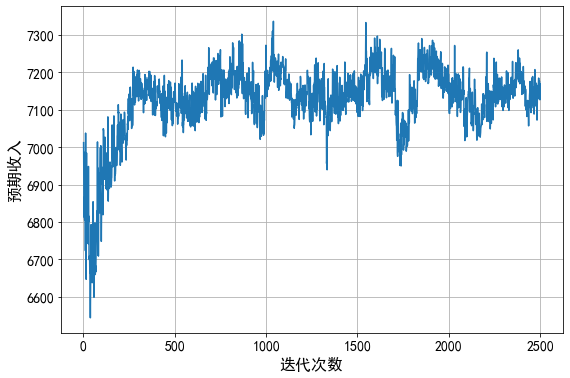

In [440]:
fig, ax = plt.subplots(figsize=(9, 6))
x = [a for a in range(1,2501)]
y = bestpop
plt.plot(x,y)
plt.xlabel('迭代次数', size = 16)
plt.ylabel('预期收入', size = 16)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xticks(size = 14)
plt.yticks(size = 14)

ax.grid(True)
plt.savefig(r"D:\c_\大三下\建模——水\bighmk\Q3遗传算法.jpg")
plt.show()

In [448]:
final_res = appen2_1[['企业代号', '企业名称']]
prechoose_rate[-1, :]
final_res['贷款利率'] = prechoose_rate[-1, :]
final_res['贷款额度'] = prechoose_money[-1, :]
final_res
sum(prechoose_money[-1, :])

D:\kcdown\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\kcdown\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


9987.95297630191

In [450]:
final_res.to_excel(r"D:\c_\大三下\建模——水\bighmk\问题三决策.xlsx")